In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:03, 192.99it/s]
100%|██████████| 720/720 [00:09<00:00, 74.67it/s]
8280it [00:00, 228150.47it/s]
7920it [00:00, 202473.94it/s]
700it [00:03, 199.43it/s]
100%|██████████| 700/700 [00:08<00:00, 78.65it/s]
8280it [00:00, 195570.58it/s]
7920it [00:00, 63825.89it/s]
720it [00:01, 685.81it/s]
100%|██████████| 720/720 [00:09<00:00, 75.71it/s]
8280it [00:00, 211815.45it/s]
720it [00:03, 183.29it/s]
100%|██████████| 720/720 [00:09<00:00, 74.57it/s]
8280it [00:00, 193884.79it/s]
700it [00:03, 207.70it/s]
100%|██████████| 700/700 [00:08<00:00, 86.17it/s]
8280it [00:00, 219758.26it/s]
509it [00:01, 261.39it/s]
100%|██████████| 509/509 [00:03<00:00, 155.27it/s]
3664it [00:00, 222269.42it/s]
700it [00:03, 189.75it/s]
100%|██████████| 700/700 [00:08<00:00, 88.37it/s]
8280it [00:00, 185305.46it/s]
700it [00:01, 689.38it/s]
100%|██████████| 700/700 [00:08<00:00, 77.87it/s]
8280it [00:00, 225856.58it/s]
710it [00:05, 131.65it/s]
100%|██████████| 710/710 [00:09<00:00, 77.56it/s]
8280it [00:00, 2

In [8]:
len(data_train), len(data_val), len(data_test)

(16560, 15840, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.16997


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.082366


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.062206
Epoch 2...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.07899


100%|██████████| 495/495 [01:15<00:00,  6.73it/s]


Mean val loss: 0.054412


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.077471


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.056699
EarlyStopping counter: 1 out of 10
Epoch 4...


 26%|██▋       | 137/518 [01:02<02:53,  2.20it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.041293
EarlyStopping counter: 2 out of 10
Epoch 11...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.070455


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.046748
EarlyStopping counter: 3 out of 10
Epoch 12...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.069601


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.046647
EarlyStopping counter: 4 out of 10
Epoch 13...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.069142


 89%|████████▉ | 441/495 [01:08<00:08,  6.72it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.038581
EarlyStopping counter: 4 out of 10
Epoch 20...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.068294


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.035697
EarlyStopping counter: 5 out of 10
Epoch 21...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.068087


100%|██████████| 495/495 [01:16<00:00,  6.85it/s]


Mean val loss: 0.033339


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 22...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.0675


 31%|███▏      | 155/495 [00:25<00:51,  6.56it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.066065


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.031644
EarlyStopping counter: 2 out of 10
Epoch 30...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.06539


100%|██████████| 495/495 [01:16<00:00,  6.81it/s]


Mean val loss: 0.030443


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 31...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.065544


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.03555
EarlyStopping counter: 1 out of 10
Epoch 32...


 39%|███▉      | 201/518 [01:30<02:24,  2.19it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.030723
EarlyStopping counter: 2 out of 10
Epoch 40...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.064373


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.031004
EarlyStopping counter: 3 out of 10
Epoch 41...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.064353


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.030094
EarlyStopping counter: 4 out of 10
Epoch 42...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.064127


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.030546
EarlyStopping counter: 5 out of 10
Epoch 43...


 98%|█████████▊| 509/518 [01:47<00:01,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.03147
EarlyStopping counter: 1 out of 10
Epoch 52...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.06322


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.02968
EarlyStopping counter: 2 out of 10
Epoch 53...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.063256


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.029698
EarlyStopping counter: 3 out of 10
Epoch 54...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.063485


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.028766
EarlyStopping counter: 4 out of 10
Epoch 55...


 94%|█████████▍| 486/518 [01:43<00:06,  4.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.06273


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.02861
EarlyStopping counter: 1 out of 10
Epoch 65...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.062341


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.028466
EarlyStopping counter: 1 out of 10
Epoch 78...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.061364


100%|██████████| 495/495 [00:38<00:00, 13.96it/s]


Mean val loss: 0.027648


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 79...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.06174


100%|██████████| 495/495 [00:38<00:00, 12.73it/s]


Mean val loss: 0.027725


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 80...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.061471
Epoch    80: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.030253
EarlyStopping counter: 1 out of 10
Epoch 81...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060762


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.028204
EarlyStopping counter: 2 out of 10
Epoch 82...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060818


100%|██████████| 495/495 [00:38<00:00, 13.86it/s]


Mean val loss: 0.027694


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 83...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.06066


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.028001
EarlyStopping counter: 1 out of 10
Epoch 84...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060679


100%|██████████| 495/495 [00:38<00:00, 13.82it/s]


Mean val loss: 0.027542


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 85...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060542


100%|██████████| 495/495 [00:38<00:00, 13.78it/s]


Mean val loss: 0.02732


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 86...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060773


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027461
EarlyStopping counter: 1 out of 10
Epoch 87...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060426


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027434
EarlyStopping counter: 2 out of 10
Epoch 88...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060367


100%|██████████| 495/495 [00:38<00:00, 13.88it/s]


Mean val loss: 0.027263


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 89...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060017


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.02769
EarlyStopping counter: 1 out of 10
Epoch 90...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060335


100%|██████████| 495/495 [00:38<00:00, 13.95it/s]


Mean val loss: 0.027271


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 91...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059946


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027383
EarlyStopping counter: 1 out of 10
Epoch 92...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060086


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027515
EarlyStopping counter: 2 out of 10
Epoch 93...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059852


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027728
EarlyStopping counter: 3 out of 10
Epoch 94...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060132


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027523
EarlyStopping counter: 4 out of 10
Epoch 95...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060324


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027521
EarlyStopping counter: 5 out of 10
Epoch 96...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060125


100%|██████████| 495/495 [00:38<00:00, 13.72it/s]


Mean val loss: 0.027188


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 97...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060023


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.02824
EarlyStopping counter: 1 out of 10
Epoch 98...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060204


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027468
EarlyStopping counter: 2 out of 10
Epoch 99...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.060122
Epoch    99: reducing learning rate of group 0 to 2.5000e-05.


100%|██████████| 495/495 [00:38<00:00, 13.76it/s]


Mean val loss: 0.027216


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 100...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059159


100%|██████████| 495/495 [00:38<00:00, 13.92it/s]


Mean val loss: 0.027117


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 101...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059639


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027222
EarlyStopping counter: 1 out of 10
Epoch 102...


 62%|██████▏   | 320/518 [01:08<00:41,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 495/495 [00:38<00:00, 12.70it/s]


Mean val loss: 0.02696


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 111...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059454


100%|██████████| 495/495 [00:39<00:00, 12.67it/s]


Mean val loss: 0.026948


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 112...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059657
Epoch   112: reducing learning rate of group 0 to 6.2500e-06.


100%|██████████| 495/495 [00:38<00:00, 13.81it/s]


Mean val loss: 0.026923


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 113...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059254


100%|██████████| 495/495 [00:38<00:00, 13.94it/s]


Mean val loss: 0.026901


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 114...


 97%|█████████▋| 503/518 [01:47<00:03,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058805


100%|██████████| 495/495 [00:38<00:00, 13.71it/s]


Mean val loss: 0.026871


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 120...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.05899


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.027146
EarlyStopping counter: 1 out of 10
Epoch 121...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058954


100%|██████████| 495/495 [00:38<00:00, 14.09it/s]


Mean val loss: 0.026913


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 122...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059089


100%|██████████| 495/495 [00:38<00:00, 13.60it/s]


Mean val loss: 0.026873


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 123...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059418


100%|██████████| 495/495 [00:38<00:00, 13.61it/s]


Mean val loss: 0.026893


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 124...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058984


100%|██████████| 495/495 [00:38<00:00, 12.71it/s]


Mean val loss: 0.026877


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 125...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059138
Epoch   125: reducing learning rate of group 0 to 3.1250e-06.


100%|██████████| 495/495 [00:38<00:00, 13.70it/s]


Mean val loss: 0.026892


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 126...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059548


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.026998
EarlyStopping counter: 1 out of 10
Epoch 127...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.05908


100%|██████████| 495/495 [00:38<00:00, 13.92it/s]


Mean val loss: 0.026904


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 128...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058659


100%|██████████| 495/495 [00:38<00:00, 13.75it/s]


Mean val loss: 0.026848


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 129...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058848


100%|██████████| 495/495 [00:38<00:00, 13.79it/s]


Mean val loss: 0.026846


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 130...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059027


100%|██████████| 495/495 [00:38<00:00, 13.84it/s]


Mean val loss: 0.026866


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 131...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058845


100%|██████████| 495/495 [00:38<00:00, 13.95it/s]


Mean val loss: 0.026951


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 132...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059029


100%|██████████| 495/495 [00:38<00:00, 13.72it/s]


Mean val loss: 0.026845


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 133...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059061


100%|██████████| 495/495 [00:38<00:00, 13.87it/s]


Mean val loss: 0.026854


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 134...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058672
Epoch   134: reducing learning rate of group 0 to 1.5625e-06.


100%|██████████| 495/495 [00:38<00:00, 13.93it/s]


Mean val loss: 0.026862


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 135...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058767


100%|██████████| 495/495 [00:38<00:00, 13.90it/s]


Mean val loss: 0.026864


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 136...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059066


100%|██████████| 495/495 [00:38<00:00, 13.89it/s]


Mean val loss: 0.026852


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 137...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059059


100%|██████████| 495/495 [00:38<00:00, 13.77it/s]


Mean val loss: 0.026924


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 138...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059286


100%|██████████| 495/495 [00:38<00:00, 13.78it/s]


Mean val loss: 0.026833


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 139...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.05894


100%|██████████| 495/495 [00:38<00:00, 13.85it/s]


Mean val loss: 0.026889


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 140...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059056
Epoch   140: reducing learning rate of group 0 to 1.0000e-06.


100%|██████████| 495/495 [00:38<00:00, 13.75it/s]


Mean val loss: 0.026839


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 141...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058892


100%|██████████| 495/495 [00:38<00:00, 13.73it/s]


Mean val loss: 0.026902


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 142...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058905


100%|██████████| 495/495 [00:38<00:00, 13.88it/s]


Mean val loss: 0.026839


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 143...


100%|██████████| 495/495 [00:38<00:00, 13.91it/s]


Mean val loss: 0.026849


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 144...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059189


100%|██████████| 495/495 [00:38<00:00, 13.75it/s]


Mean val loss: 0.026842


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 145...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058887


100%|██████████| 495/495 [00:38<00:00, 13.86it/s]


Mean val loss: 0.026869


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 146...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058863


100%|██████████| 495/495 [00:38<00:00, 13.79it/s]


Mean val loss: 0.026839


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 147...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.05853


 17%|█▋        | 86/495 [00:08<00:29, 13.74it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058888


100%|██████████| 495/495 [00:38<00:00, 13.76it/s]


Mean val loss: 0.026842


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 159...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059198


100%|██████████| 495/495 [00:38<00:00, 14.01it/s]


Mean val loss: 0.026826


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 160...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058998


100%|██████████| 495/495 [00:38<00:00, 13.84it/s]


Mean val loss: 0.026852


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 161...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059057


100%|██████████| 495/495 [00:38<00:00, 13.94it/s]


Mean val loss: 0.026842


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 162...


 62%|██████▏   | 323/518 [01:09<00:40,  4.76it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059138


100%|██████████| 495/495 [00:38<00:00, 13.94it/s]


Mean val loss: 0.026857


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 173...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058908


100%|██████████| 495/495 [00:38<00:00, 13.86it/s]


Mean val loss: 0.026828


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 174...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058879


100%|██████████| 495/495 [00:38<00:00, 13.87it/s]


Mean val loss: 0.026822


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 175...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.05876


100%|██████████| 495/495 [00:38<00:00, 13.84it/s]


Mean val loss: 0.026839


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 176...


 77%|███████▋  | 401/518 [01:25<00:25,  4.64it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 495/495 [00:38<00:00, 13.83it/s]


Mean val loss: 0.026855


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058443


100%|██████████| 495/495 [00:38<00:00, 13.93it/s]


Mean val loss: 0.026826


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 188...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058848


100%|██████████| 495/495 [00:38<00:00, 14.09it/s]


Mean val loss: 0.026819


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 189...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059003


100%|██████████| 495/495 [00:38<00:00, 14.04it/s]


Mean val loss: 0.026809


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 190...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.059166


 21%|██        | 103/495 [00:09<00:28, 13.58it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 259/259 [02:35<00:00,  1.83it/s]


## Dump experiment results

In [15]:
import pickle
import json

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [ ]:
model_conf

In [20]:
# import torch
# model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [17]:
from itertools import chain

In [18]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [19]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

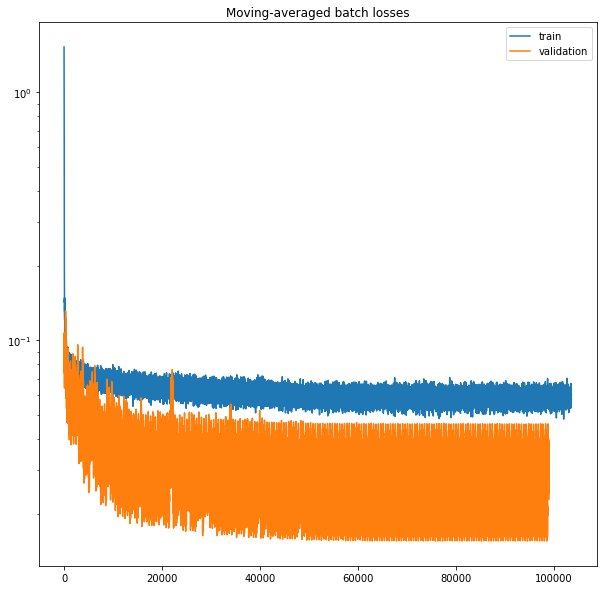

In [20]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [21]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

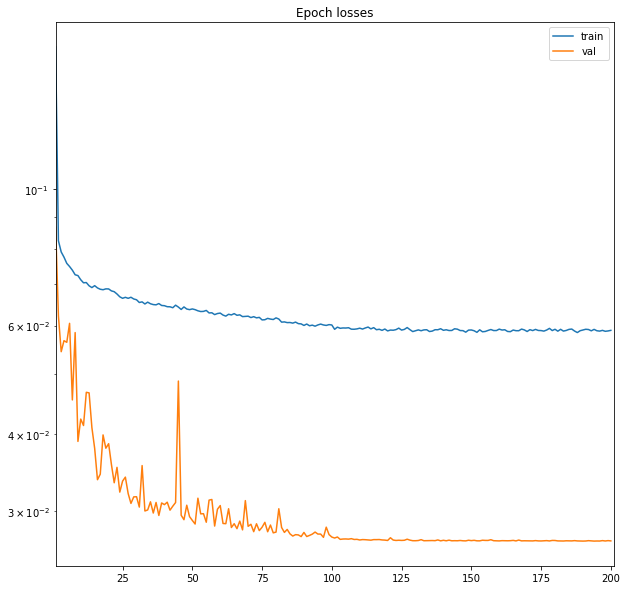

In [22]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [23]:
import os

In [24]:
import torch

In [25]:
from visualization_utils import output_to_binary, plot_sample

In [26]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

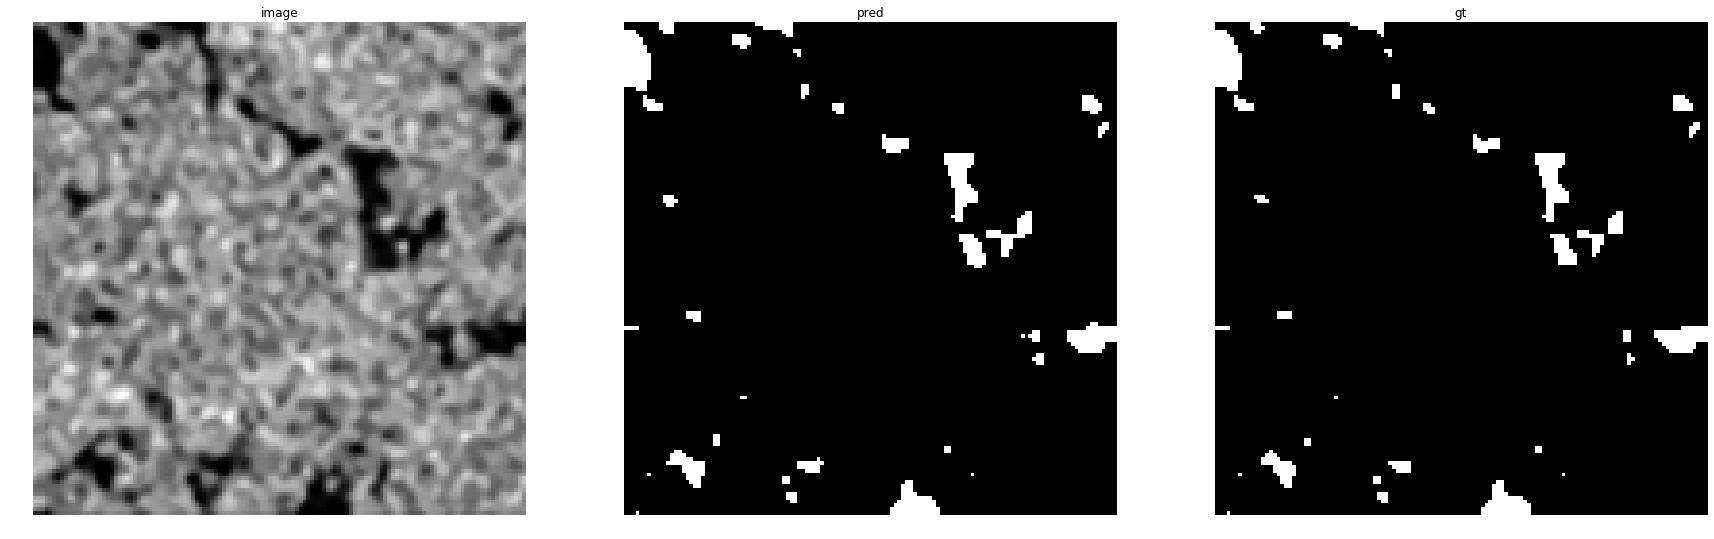

accuracy    : 0.99676513671875
precision   : 0.9272997032640949
recall      : 0.9936406995230525
f1          : 0.9593246354566385
pr_auc      : 0.9964858490733209
iou         : 0.9218289085545722


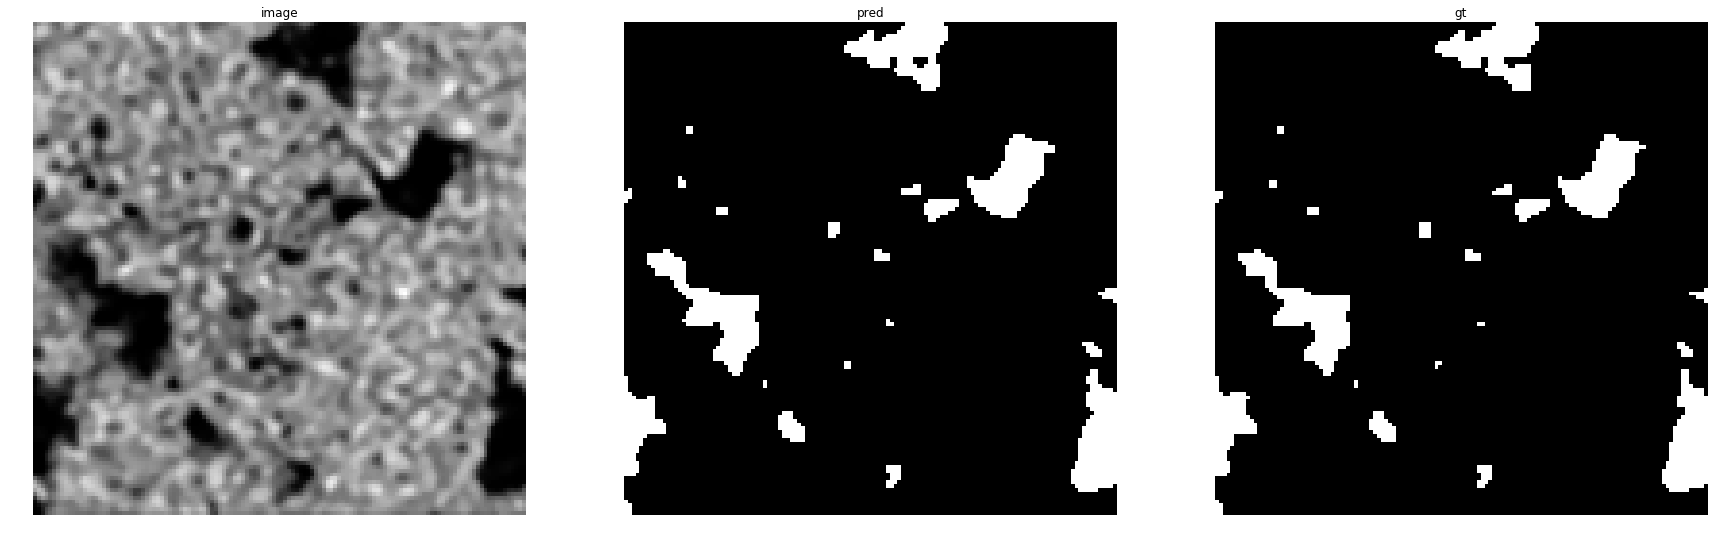

accuracy    : 0.99658203125
precision   : 0.9719298245614035
recall      : 0.9885795860099929
f1          : 0.9801840056617126
pr_auc      : 0.9985096628082631
iou         : 0.9611380985426787


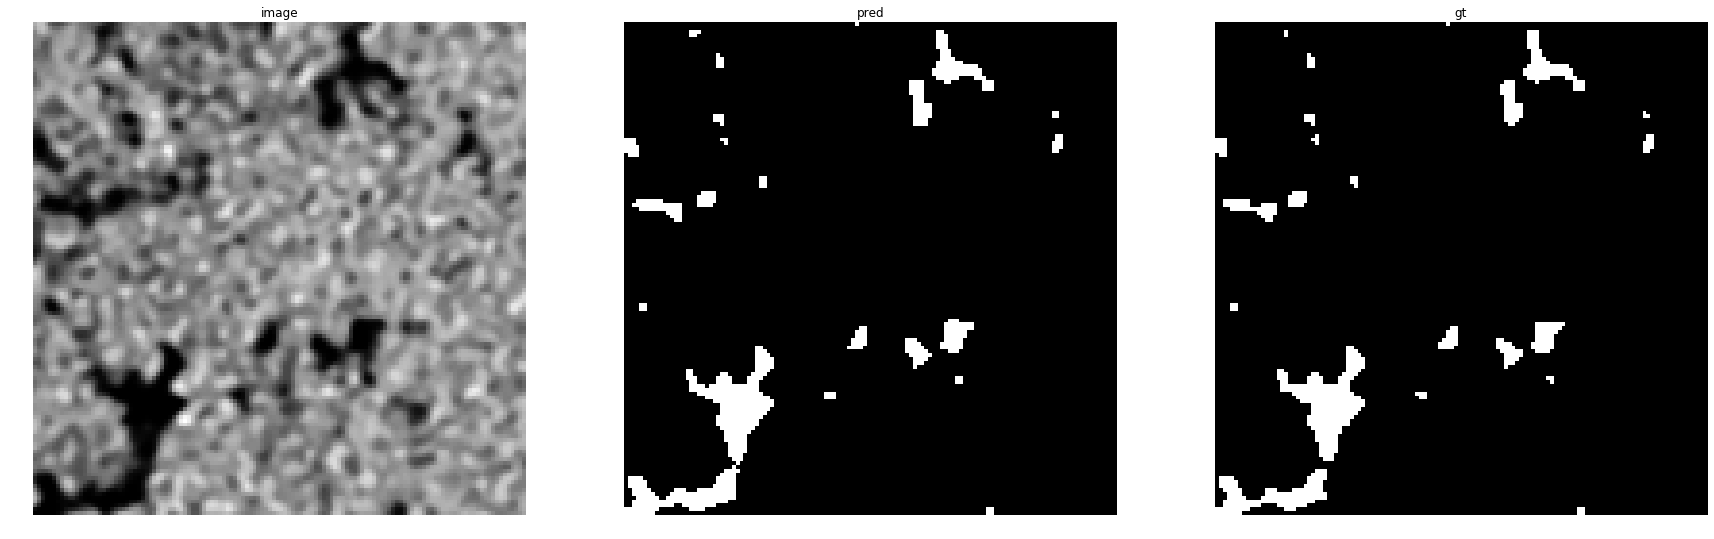

accuracy    : 0.99639892578125
precision   : 0.9424019607843137
recall      : 0.9846350832266325
f1          : 0.9630557294927989
pr_auc      : 0.9969354155175574
iou         : 0.928743961352657


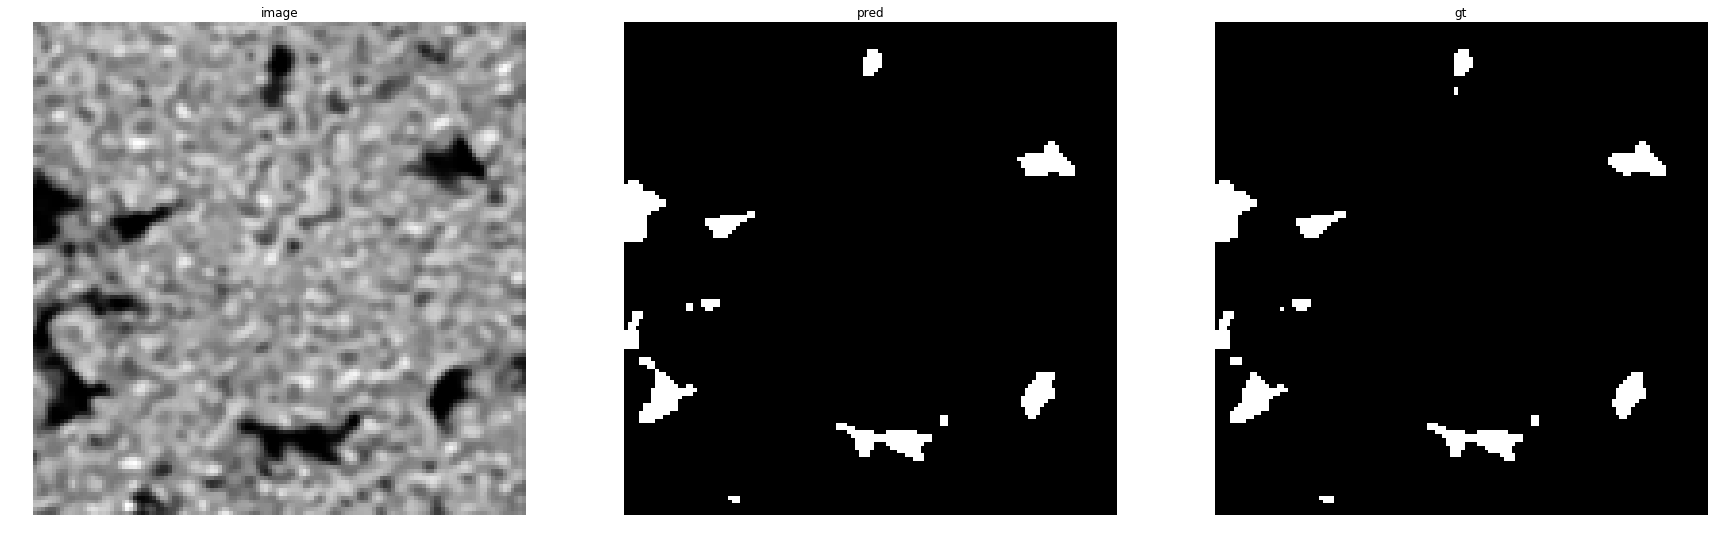

accuracy    : 0.997802734375
precision   : 0.9608482871125612
recall      : 0.9800332778702163
f1          : 0.970345963756178
pr_auc      : 0.9967631744531675
iou         : 0.9424


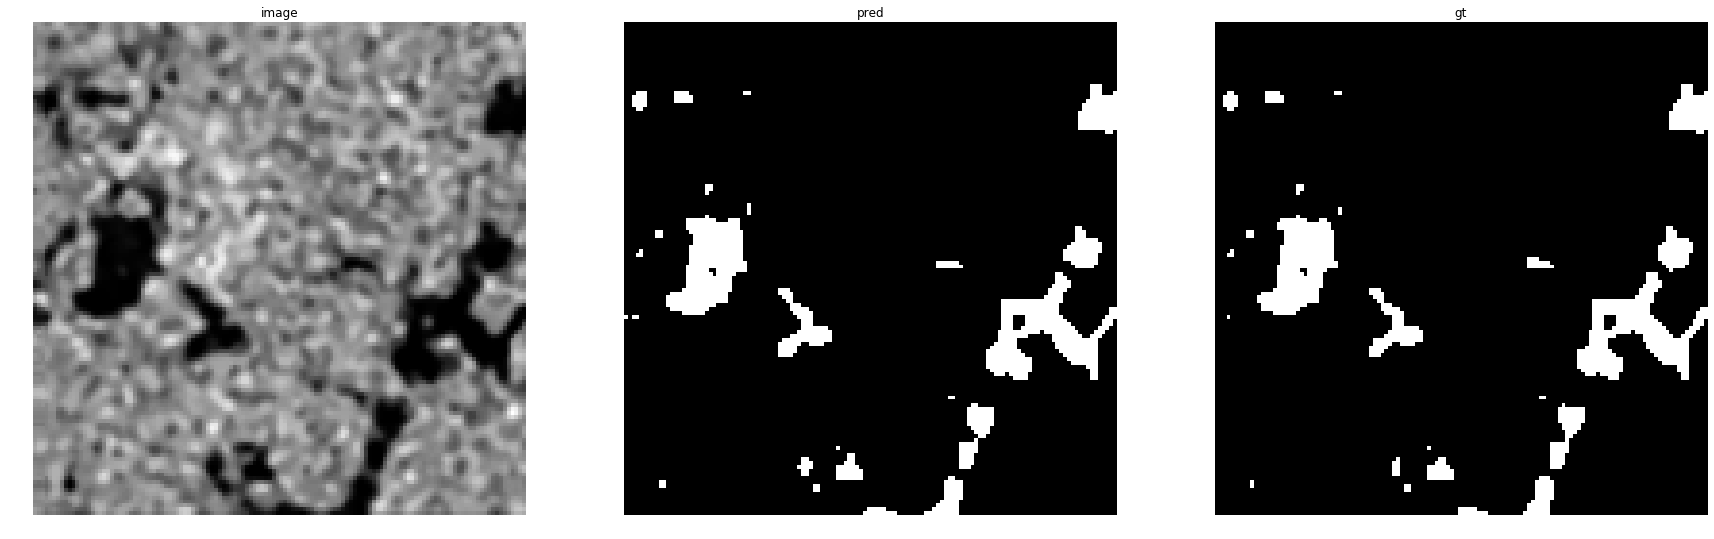

accuracy    : 0.99688720703125
precision   : 0.9662379421221865
recall      : 0.9925681255161024
f1          : 0.979226069246436
pr_auc      : 0.9984787163451918
iou         : 0.9592976855546688


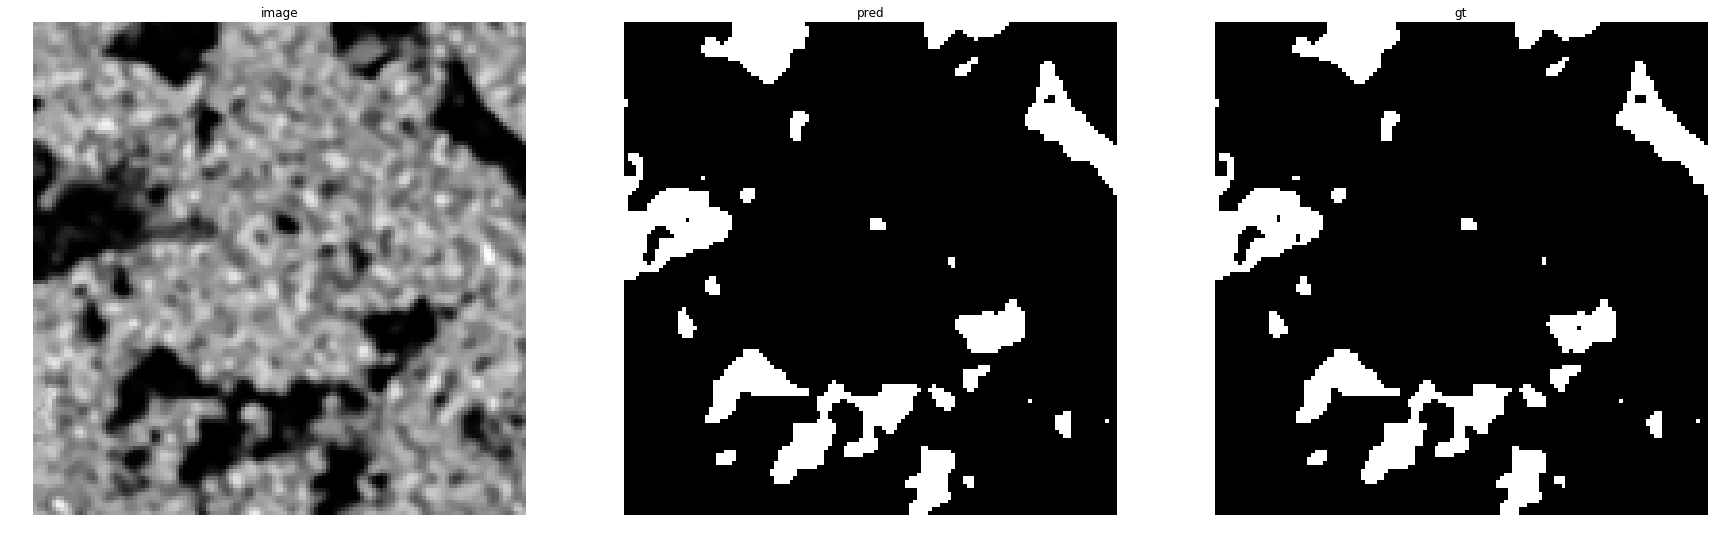

accuracy    : 0.99407958984375
precision   : 0.9683318465655665
recall      : 0.9881656804733728
f1          : 0.9781482315836901
pr_auc      : 0.9985973536595749
iou         : 0.9572310405643739


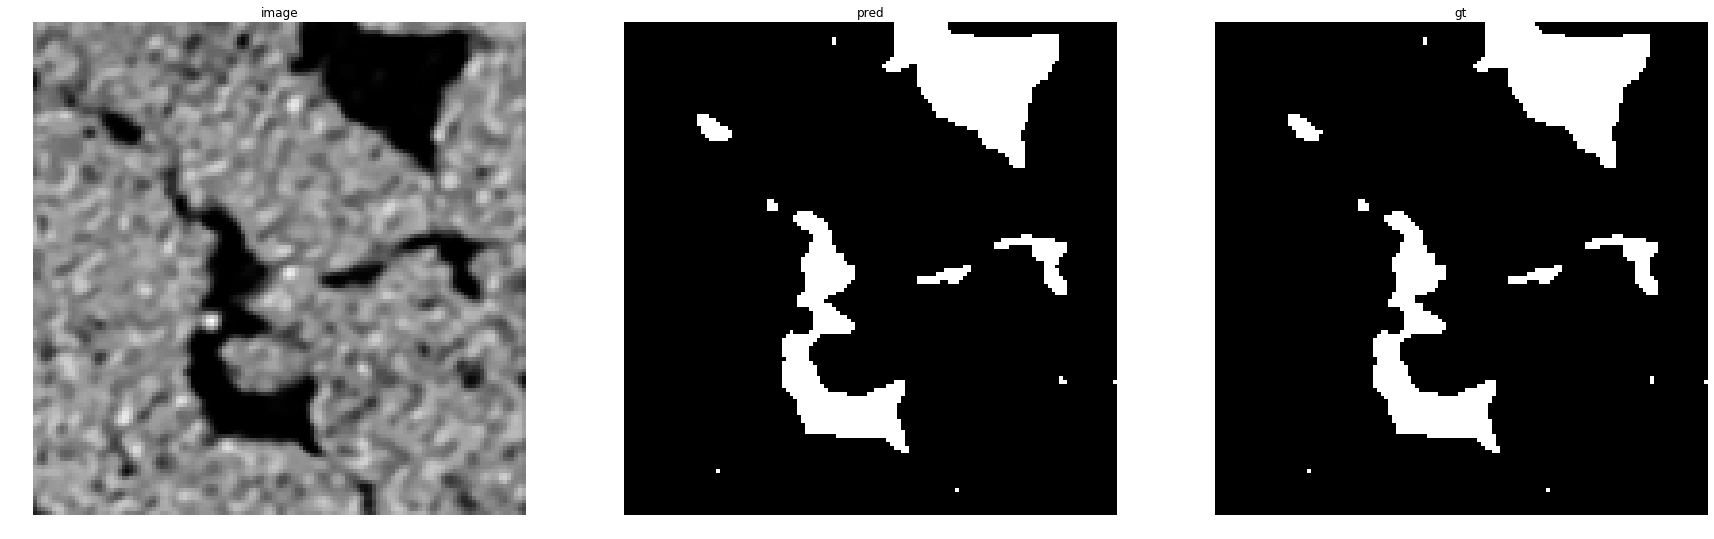

accuracy    : 0.99798583984375
precision   : 0.9862068965517241
recall      : 0.9962486602357985
f1          : 0.9912023460410557
pr_auc      : 0.9996934485223162
iou         : 0.9825581395348837


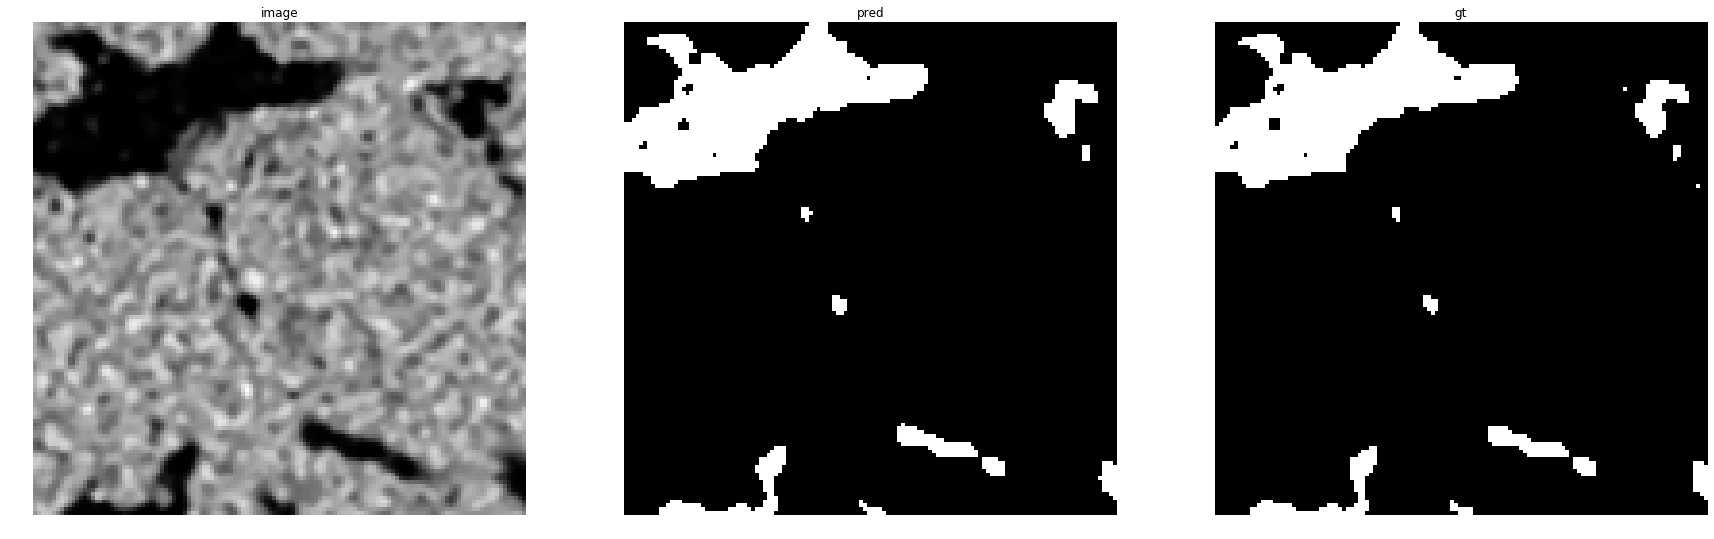

accuracy    : 0.9970703125
precision   : 0.9781312127236581
recall      : 0.9979716024340771
f1          : 0.9879518072289158
pr_auc      : 0.9996538353549864
iou         : 0.9761904761904762


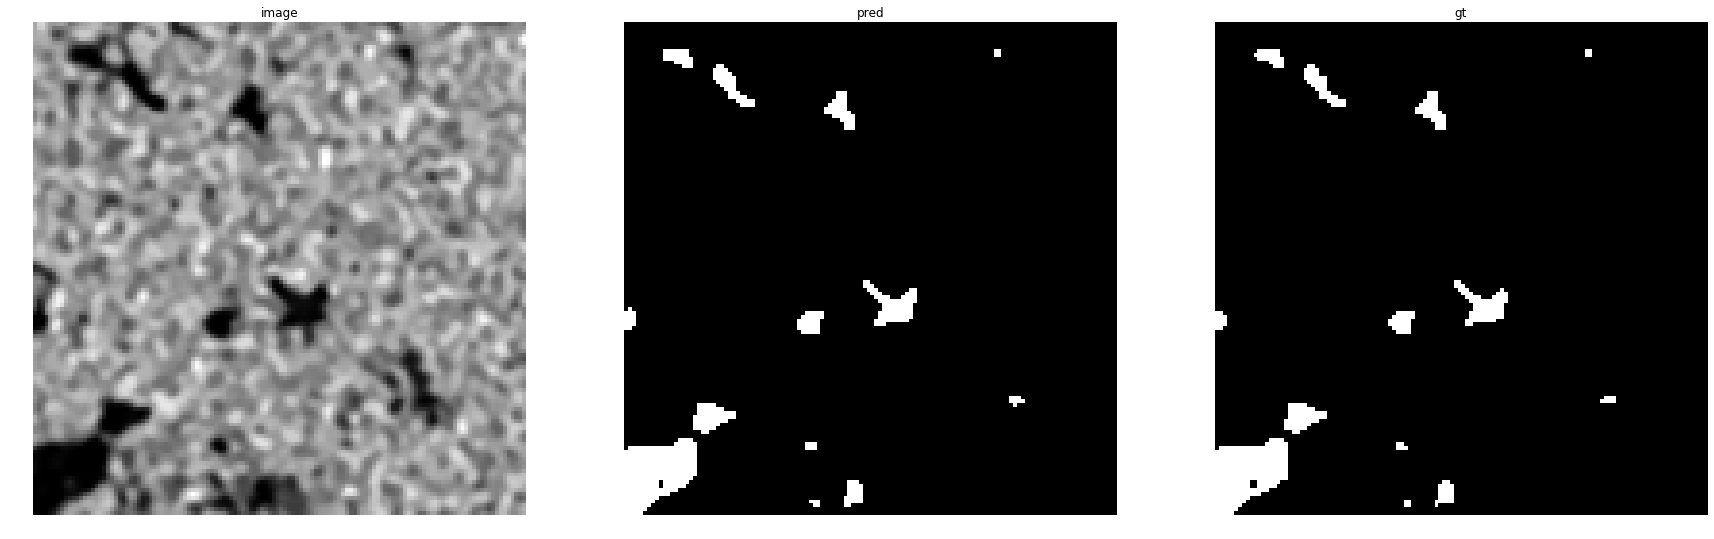

accuracy    : 0.99859619140625
precision   : 0.9665071770334929
recall      : 0.9967105263157895
f1          : 0.9813765182186235
pr_auc      : 0.9992711568263277
iou         : 0.9634340222575517


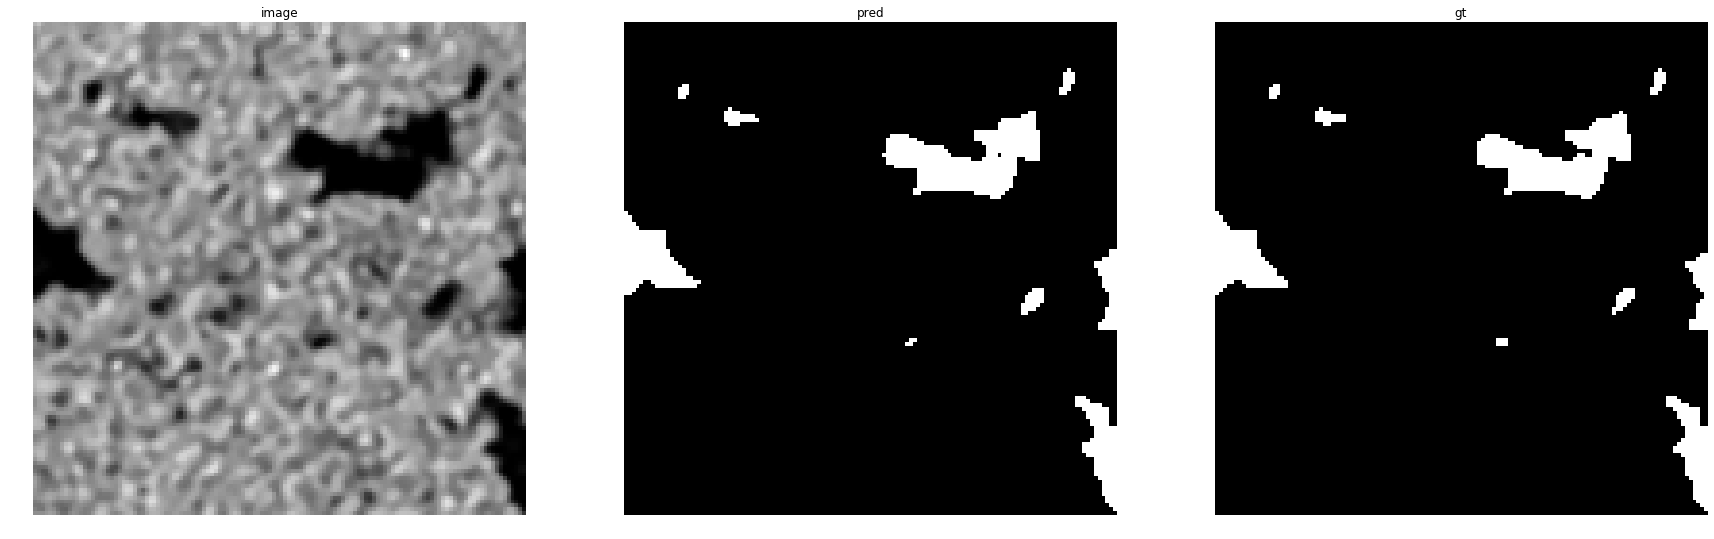

accuracy    : 0.997314453125
precision   : 0.9619140625
recall      : 0.9949494949494949
f1          : 0.9781529294935453
pr_auc      : 0.9989838720603637
iou         : 0.9572400388726919


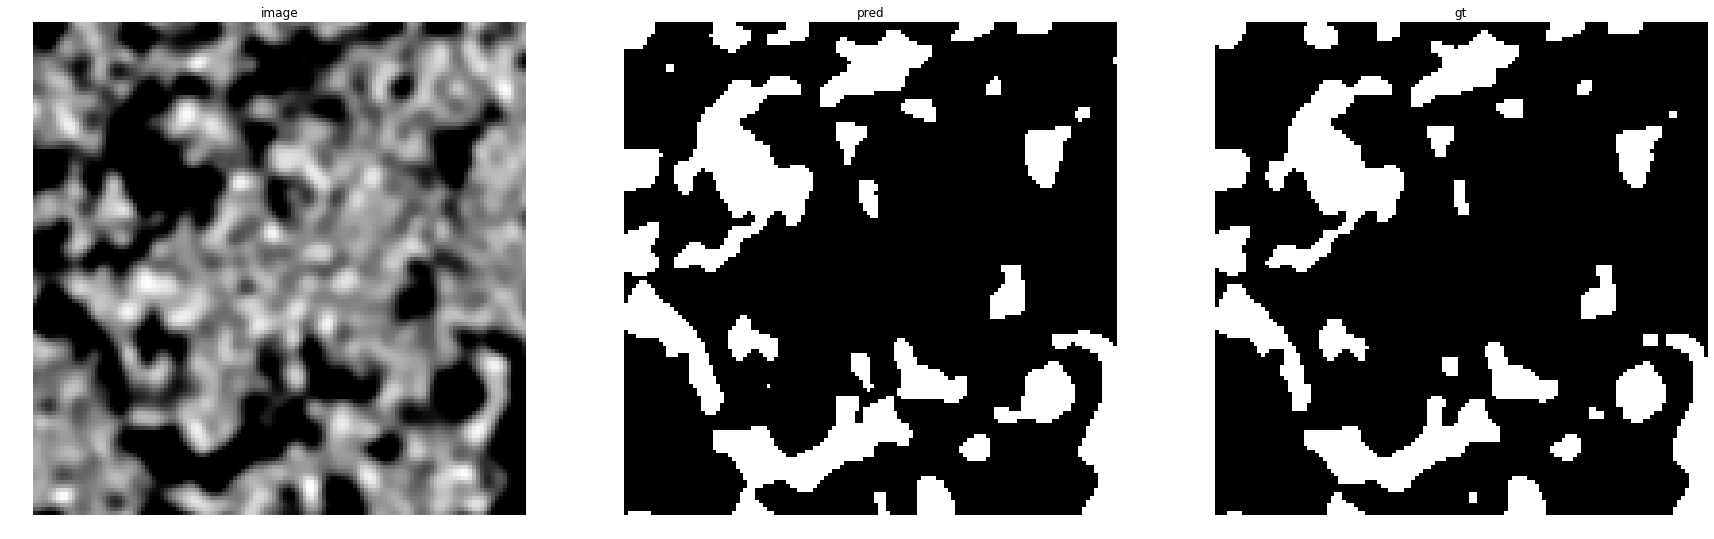

accuracy    : 0.9765625
precision   : 0.9022673964034402
recall      : 0.9974070872947277
f1          : 0.9474548440065682
pr_auc      : 0.9940595286930514
iou         : 0.9001560062402496


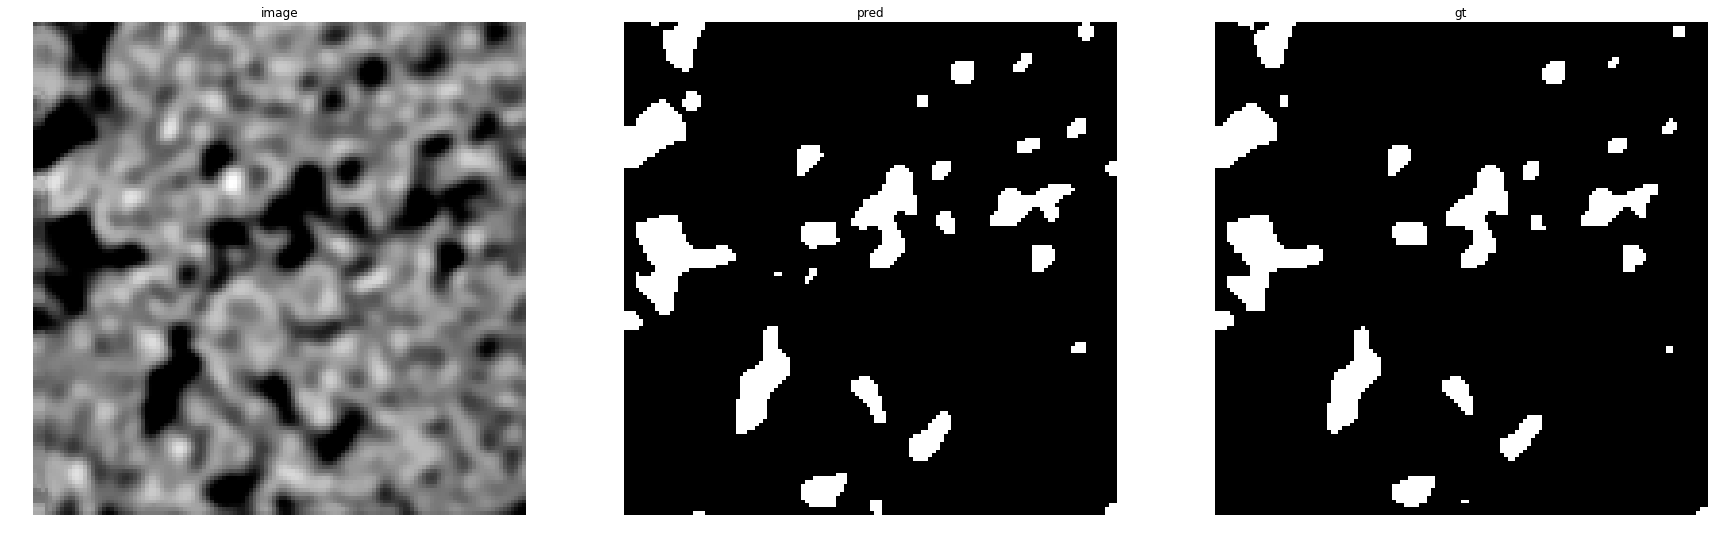

accuracy    : 0.98651123046875
precision   : 0.8793103448275862
recall      : 0.9928617780661908
f1          : 0.9326424870466321
pr_auc      : 0.9906471157947743
iou         : 0.8737864077669902


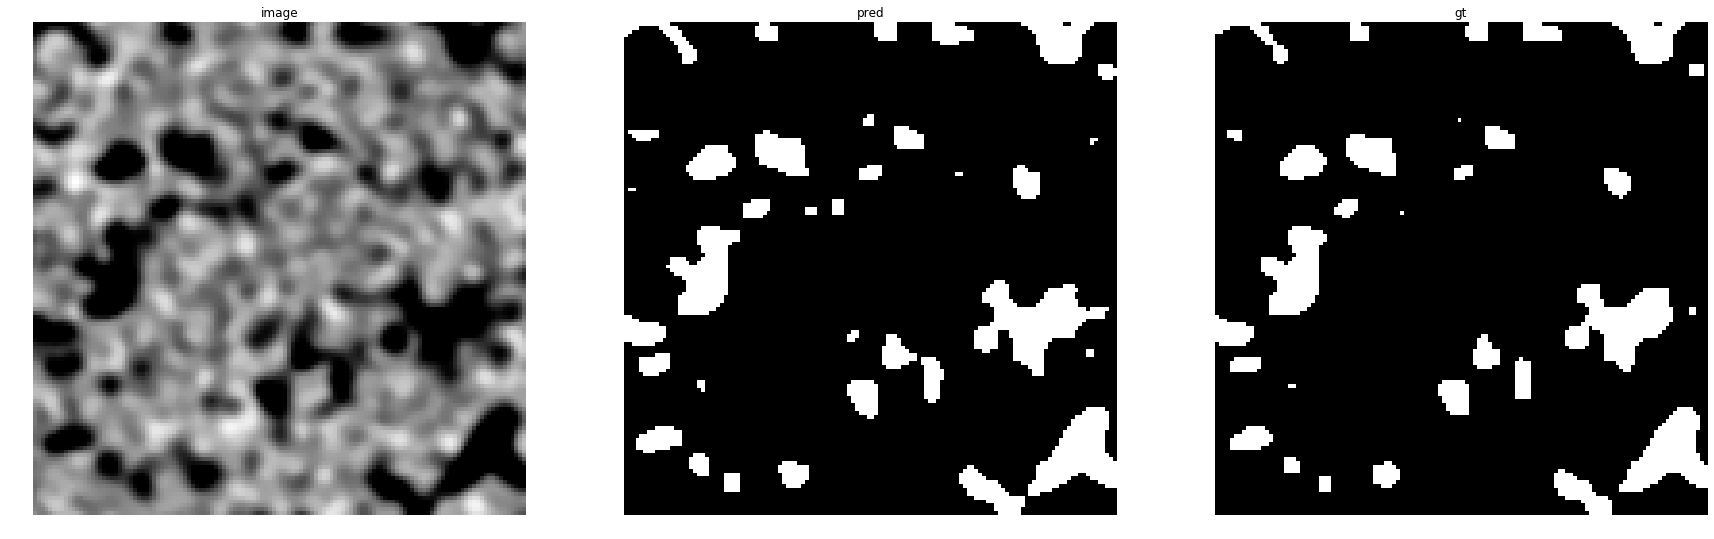

accuracy    : 0.98321533203125
precision   : 0.8759191176470589
recall      : 0.9973835688121402
f1          : 0.9327134817714705
pr_auc      : 0.9934244516329659
iou         : 0.8739110499770747


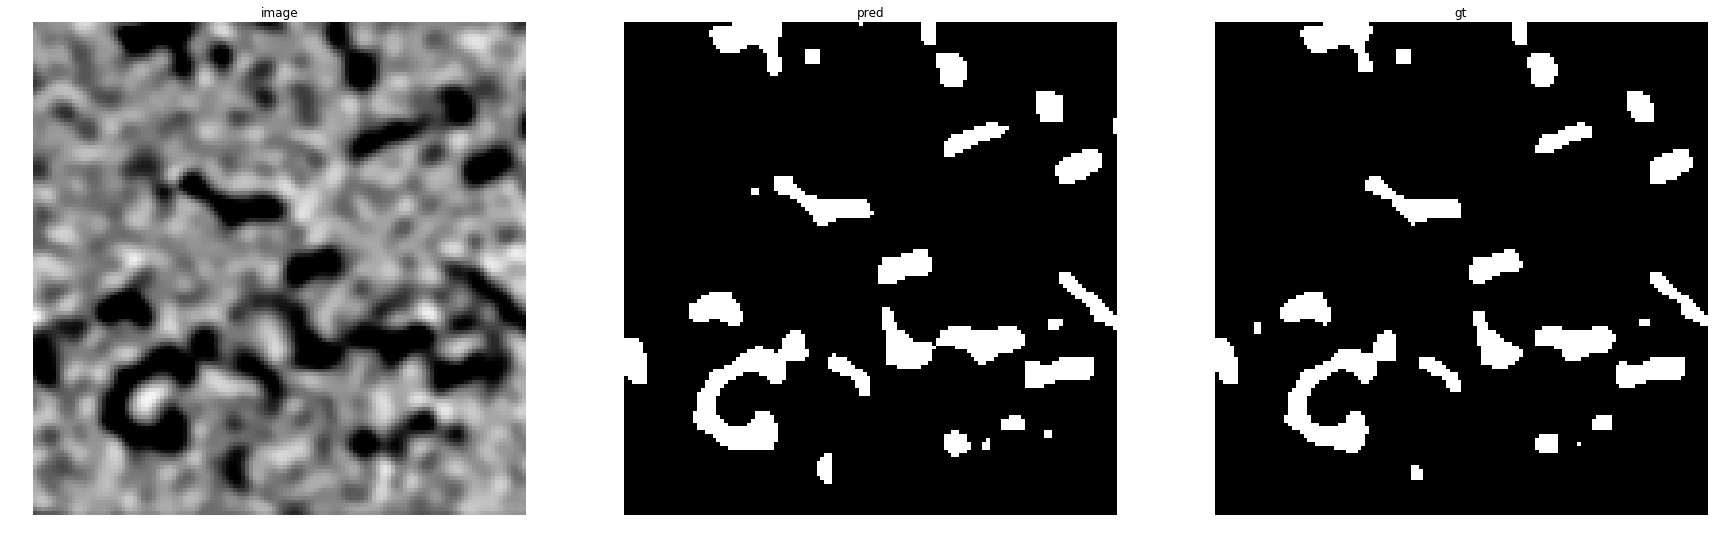

accuracy    : 0.98748779296875
precision   : 0.8906426155580609
recall      : 0.9930861093651792
f1          : 0.9390787518573551
pr_auc      : 0.9945342833090192
iou         : 0.8851540616246498


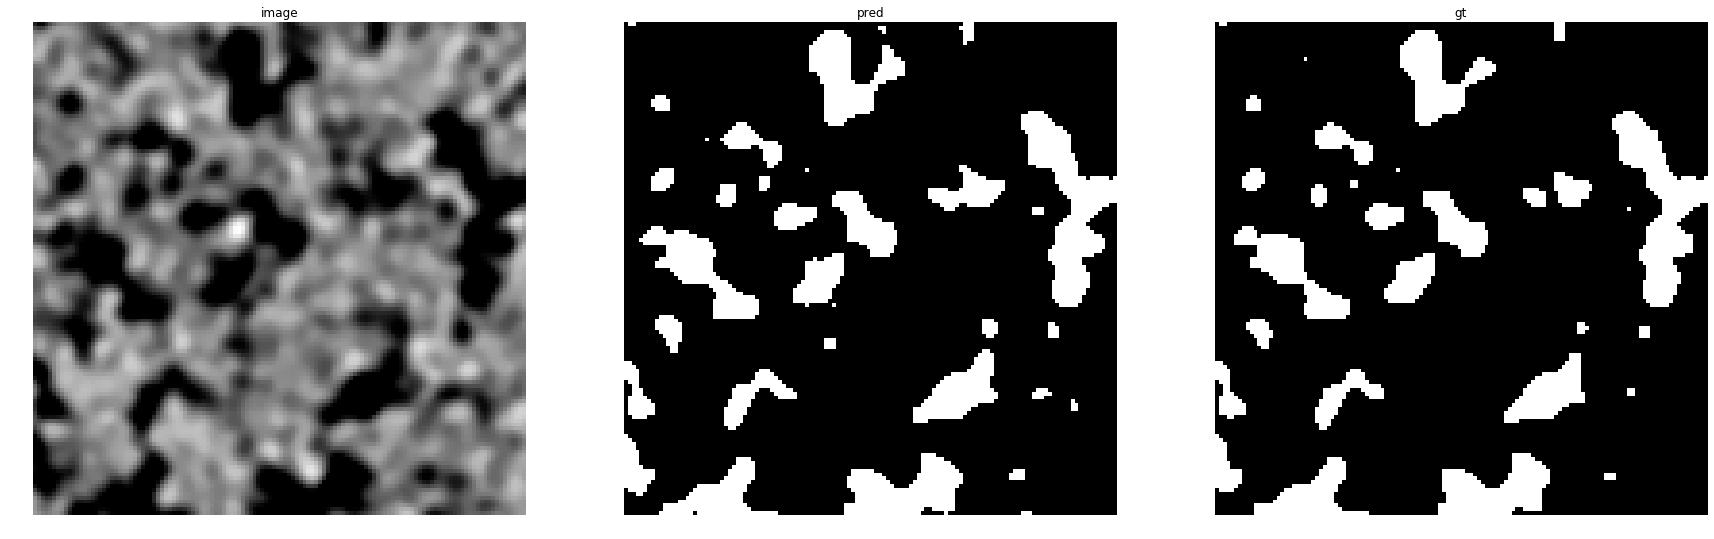

accuracy    : 0.9847412109375
precision   : 0.9147506190307747
recall      : 0.9965317919075144
f1          : 0.9538915529324973
pr_auc      : 0.9947192042716421
iou         : 0.9118476727785614


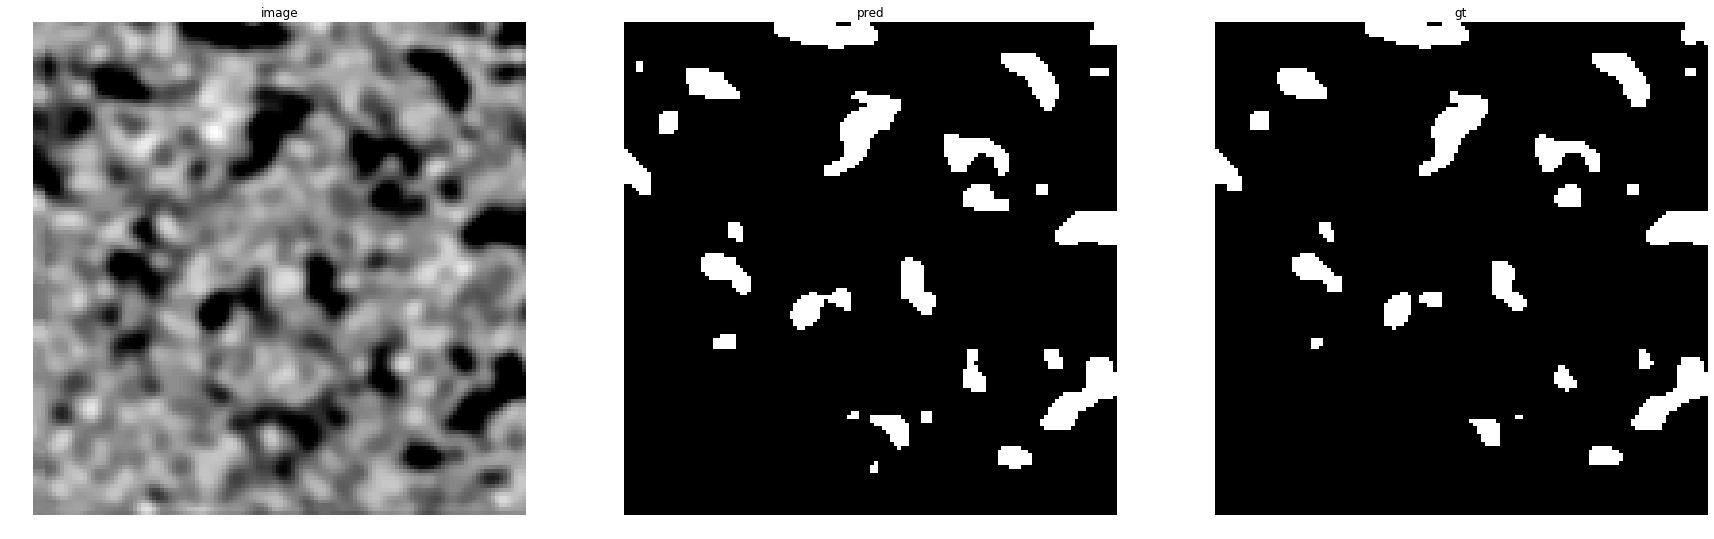

accuracy    : 0.9866943359375
precision   : 0.8672019765287214
recall      : 0.997867803837953
f1          : 0.9279576999339062
pr_auc      : 0.988752882421384
iou         : 0.8655980271270037


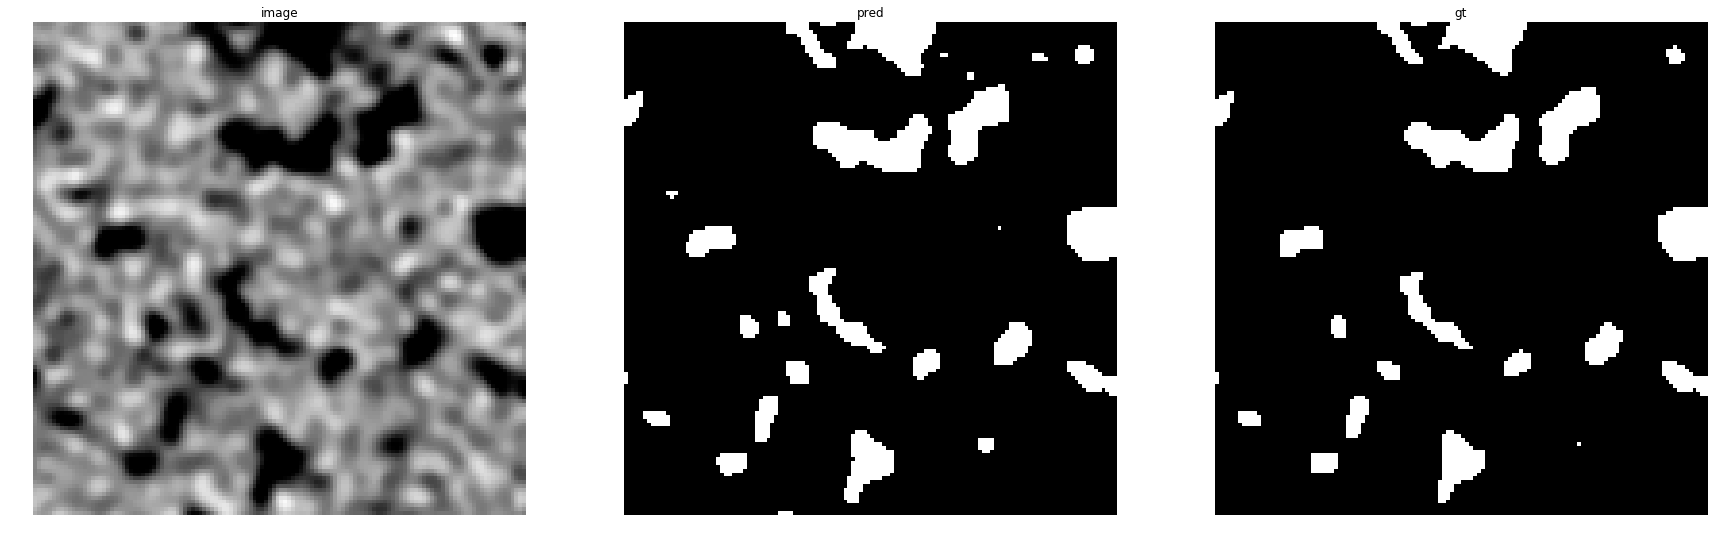

accuracy    : 0.98883056640625
precision   : 0.896732788798133
recall      : 0.9961114711600778
f1          : 0.9438133251458397
pr_auc      : 0.9935268200957967
iou         : 0.8936046511627908


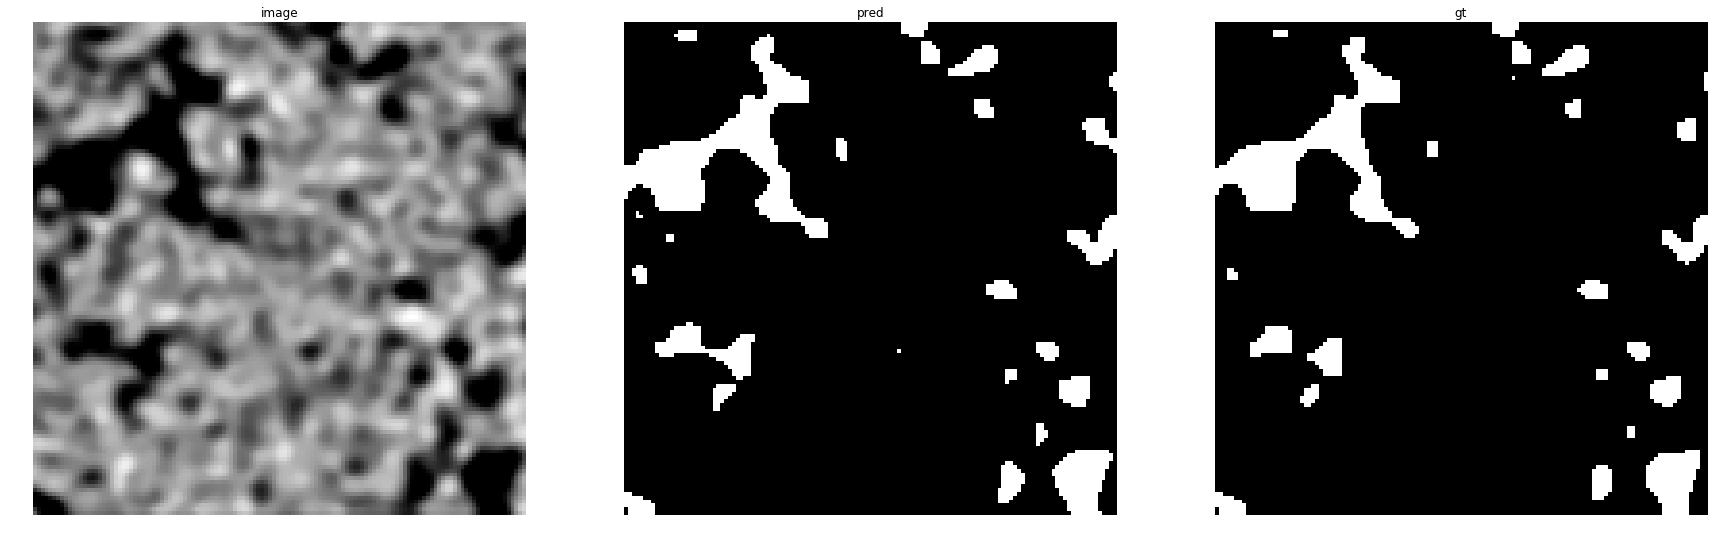

accuracy    : 0.9888916015625
precision   : 0.897887323943662
recall      : 0.9947984395318595
f1          : 0.9438618136952498
pr_auc      : 0.9951701115498603
iou         : 0.8936915887850467


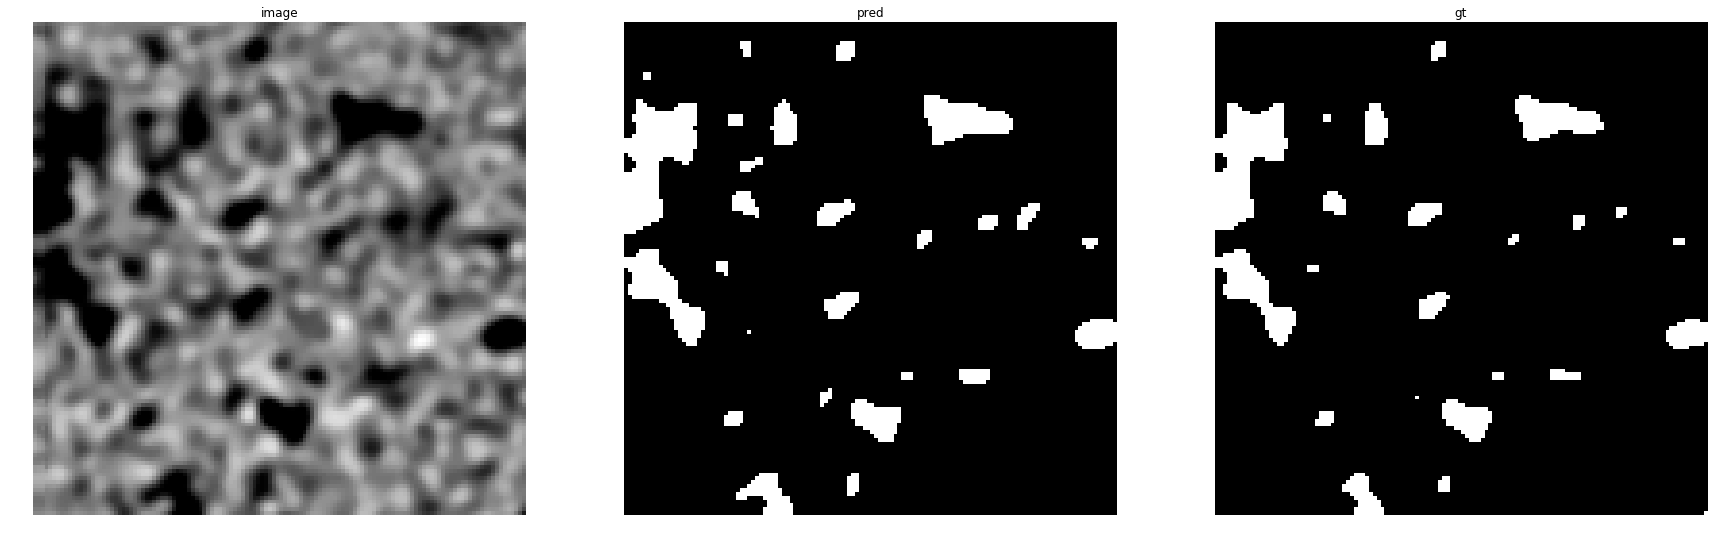

accuracy    : 0.98651123046875
precision   : 0.8504098360655737
recall      : 0.9983961507618284
f1          : 0.9184802655846551
pr_auc      : 0.9923977029421056
iou         : 0.8492496589358799


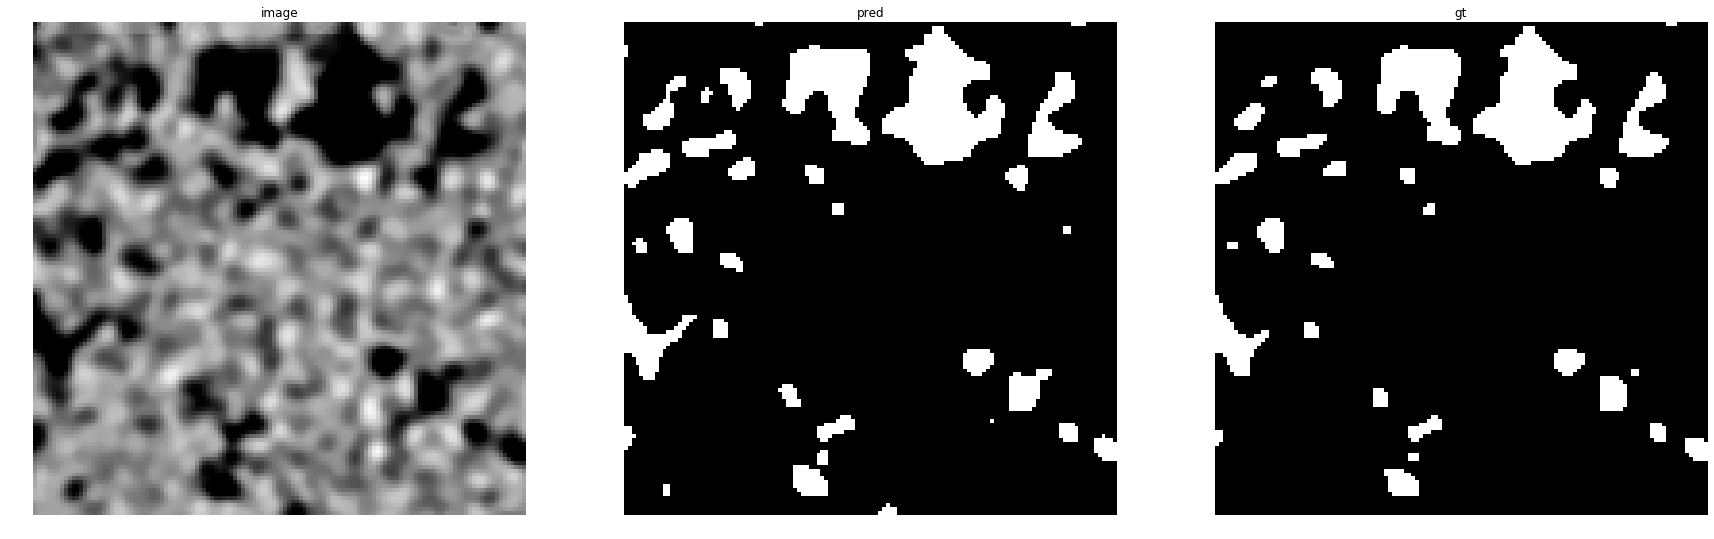

accuracy    : 0.98468017578125
precision   : 0.8839412600663192
recall      : 0.9967948717948718
f1          : 0.9369821742405222
pr_auc      : 0.9920037605186418
iou         : 0.8814359943316014


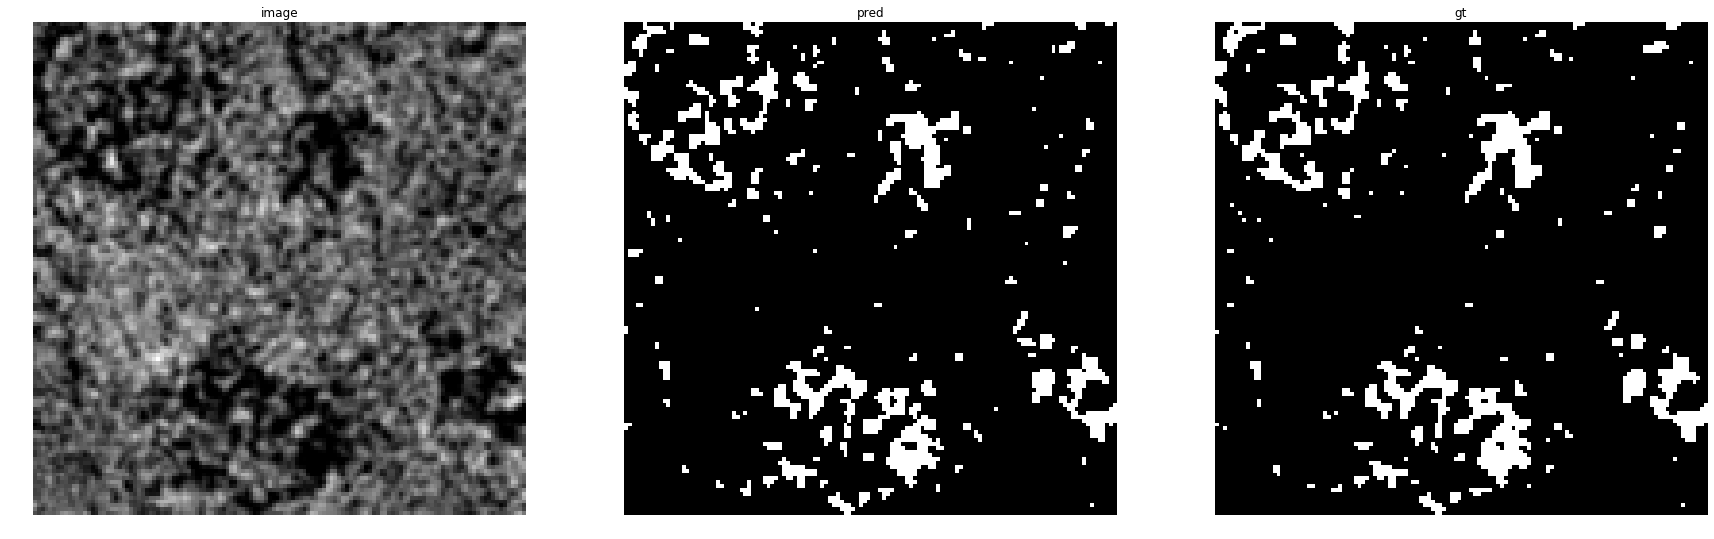

accuracy    : 0.98583984375
precision   : 0.9289340101522843
recall      : 0.9242424242424242
f1          : 0.9265822784810126
pr_auc      : 0.9831753849379152
iou         : 0.8632075471698113


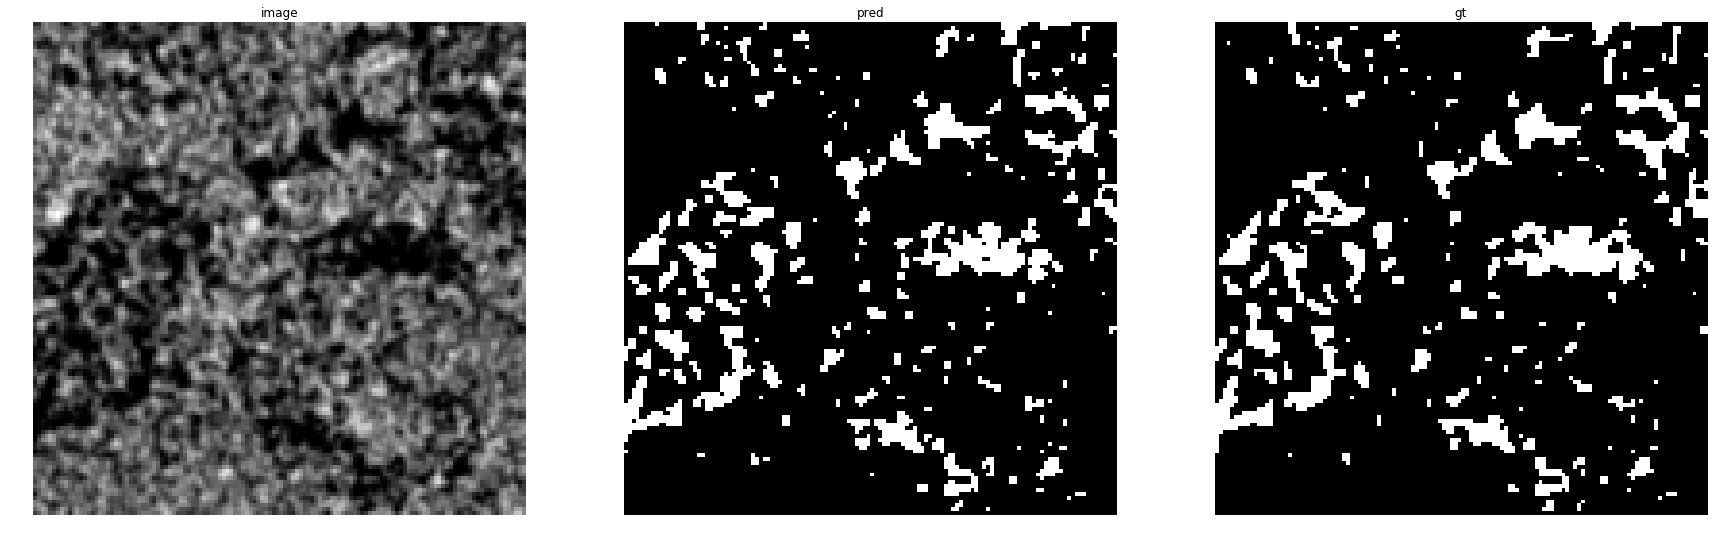

accuracy    : 0.97906494140625
precision   : 0.9315004659832246
recall      : 0.9107061503416857
f1          : 0.920985947938263
pr_auc      : 0.9813894201388426
iou         : 0.8535439795046968


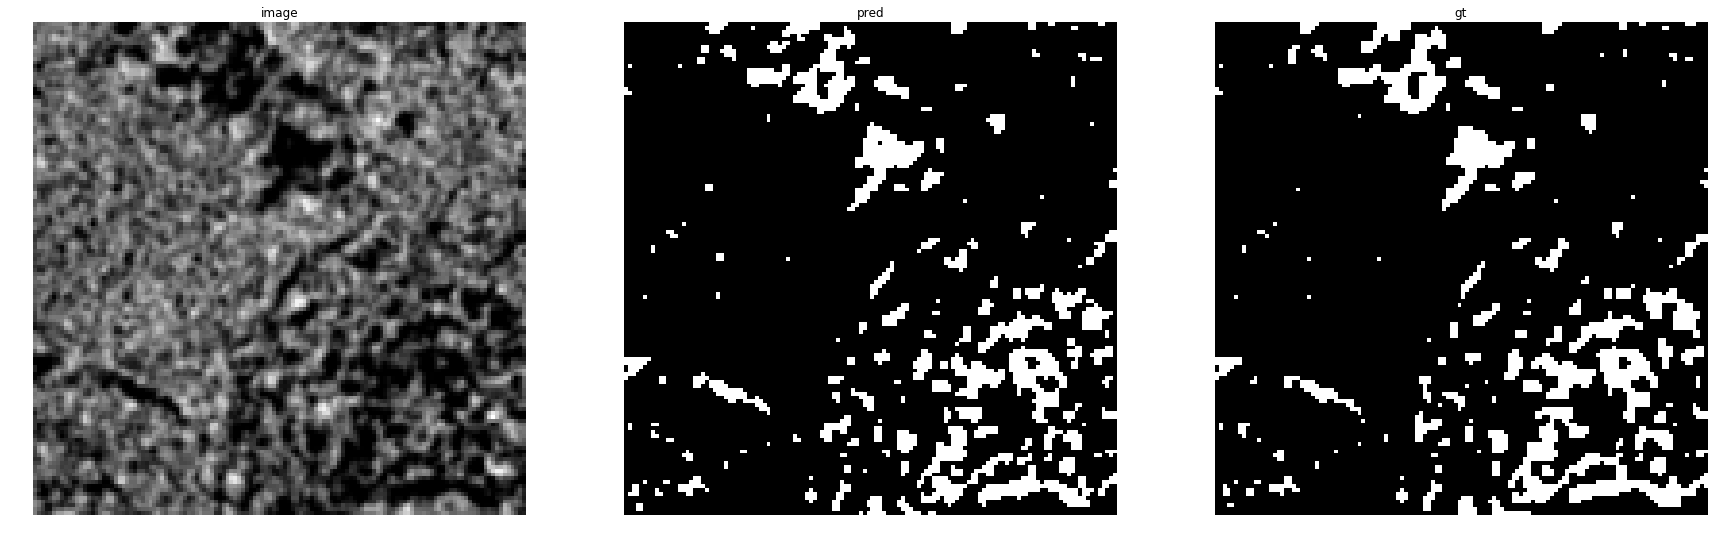

accuracy    : 0.9813232421875
precision   : 0.9410307234886026
recall      : 0.9103547459252157
f1          : 0.9254385964912281
pr_auc      : 0.984018582514427
iou         : 0.8612244897959184


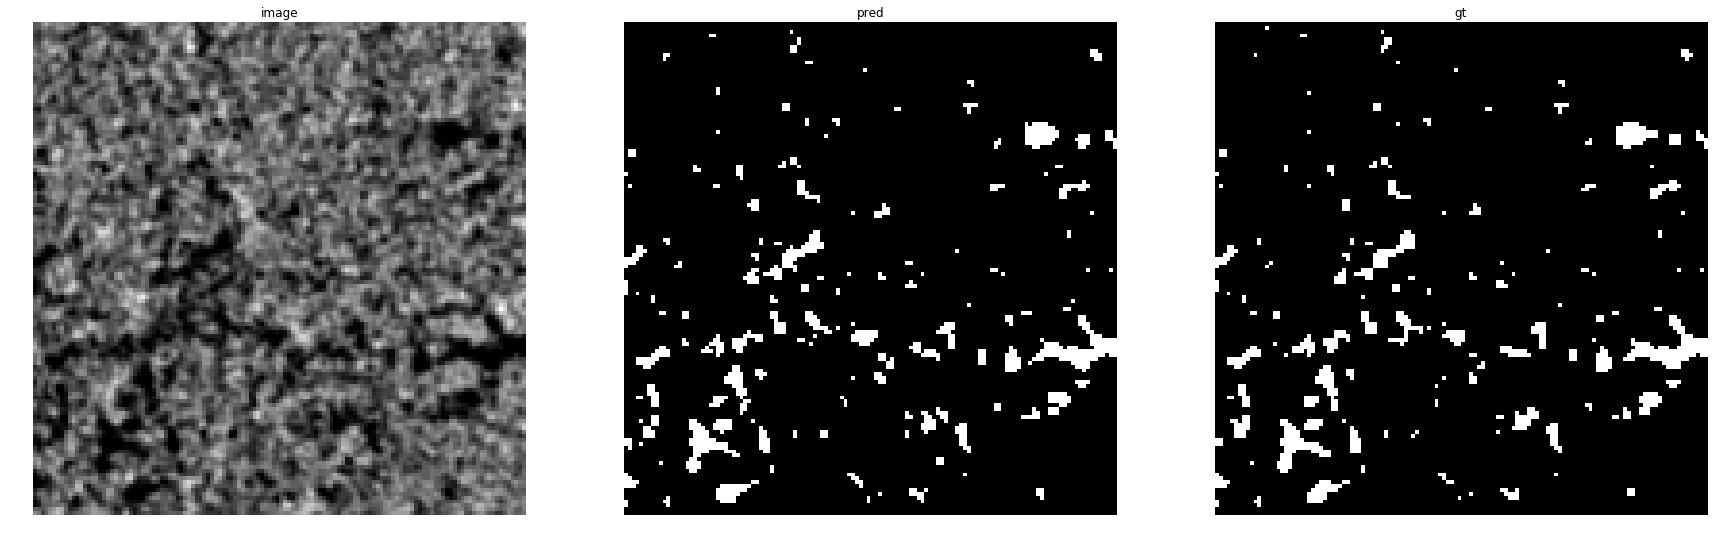

accuracy    : 0.98919677734375
precision   : 0.8946859903381642
recall      : 0.93158953722334
f1          : 0.91276490882208
pr_auc      : 0.9780750819564763
iou         : 0.8395285584768812


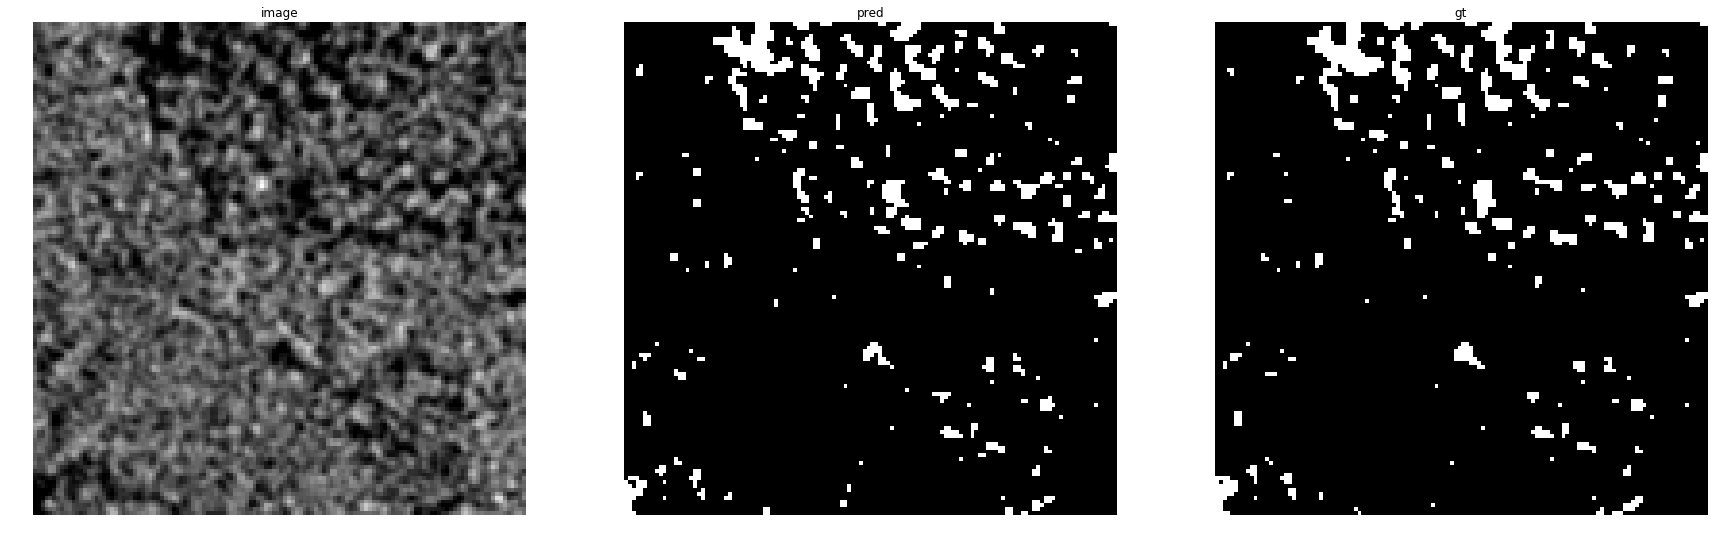

accuracy    : 0.9871826171875
precision   : 0.9048027444253859
recall      : 0.91421143847487
f1          : 0.9094827586206896
pr_auc      : 0.9764251920605617
iou         : 0.83399209486166


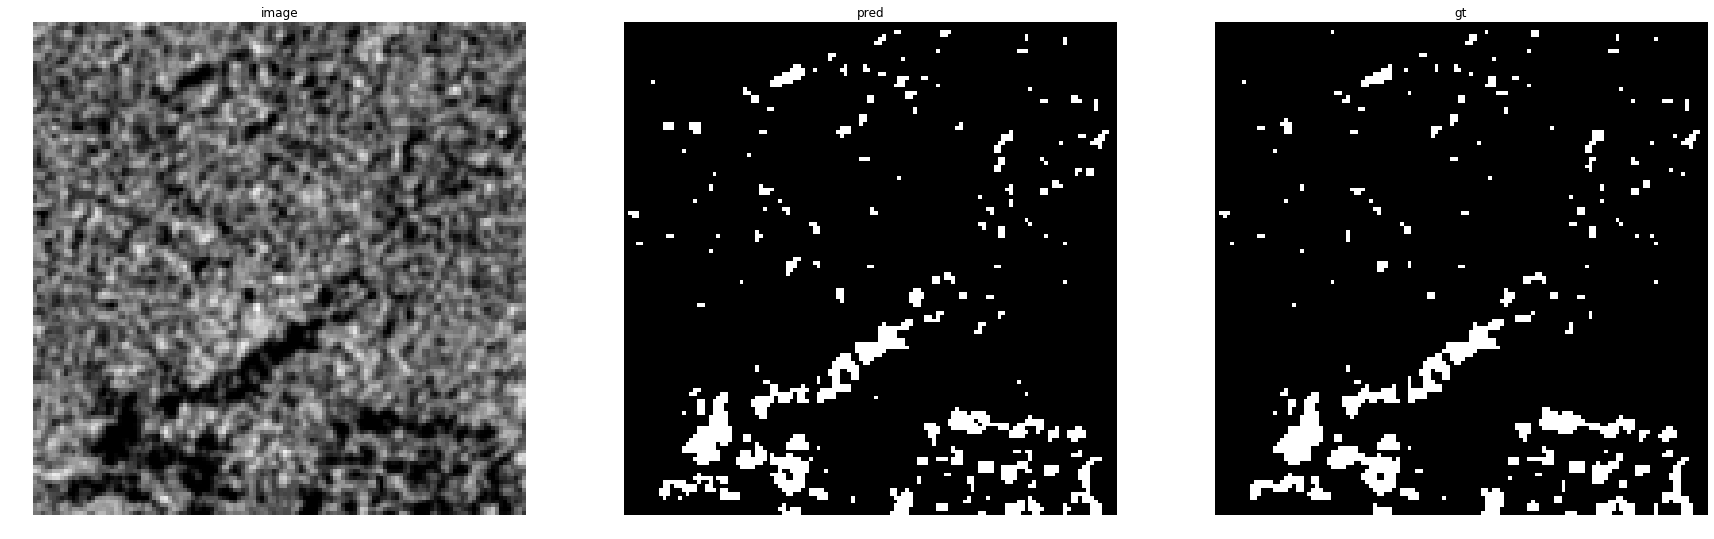

accuracy    : 0.98822021484375
precision   : 0.9090909090909091
recall      : 0.9312080536912751
f1          : 0.9200165768752591
pr_auc      : 0.9788996765919362
iou         : 0.851880276285495


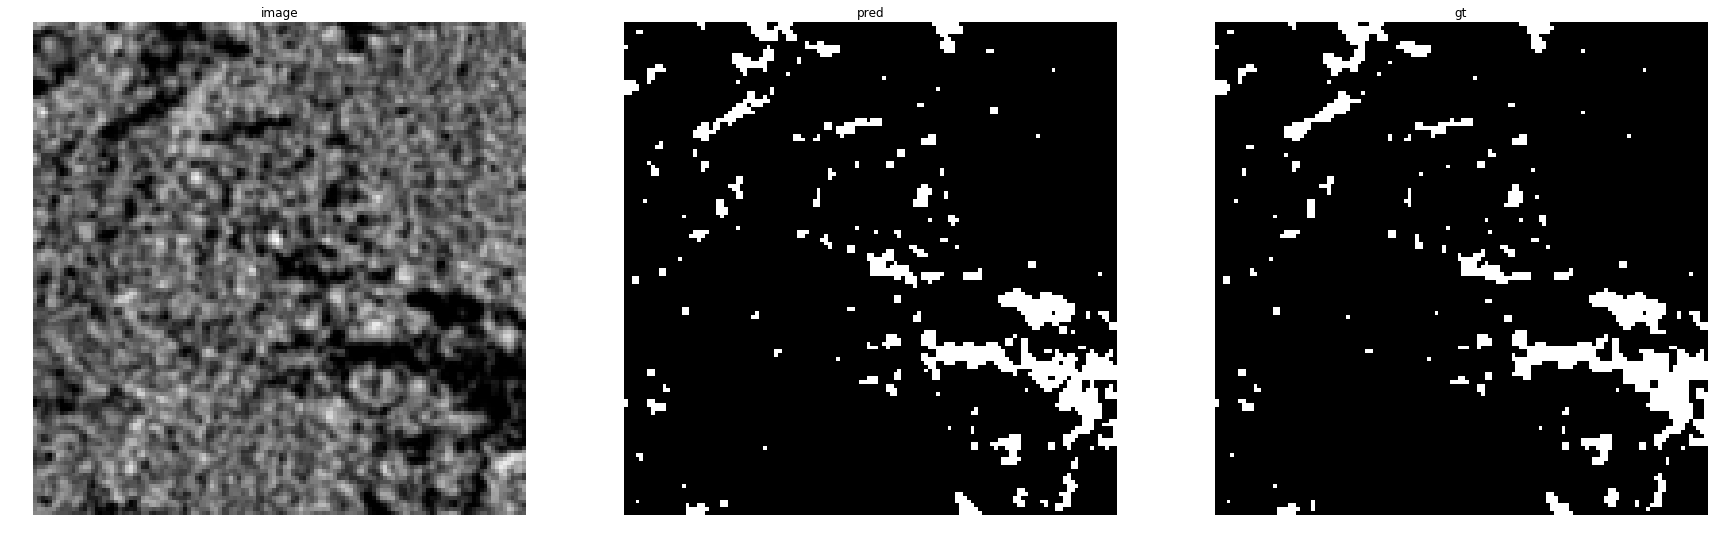

accuracy    : 0.98614501953125
precision   : 0.9107142857142857
recall      : 0.9196093163035312
f1          : 0.9151401869158878
pr_auc      : 0.982276947420454
iou         : 0.8435561681598898


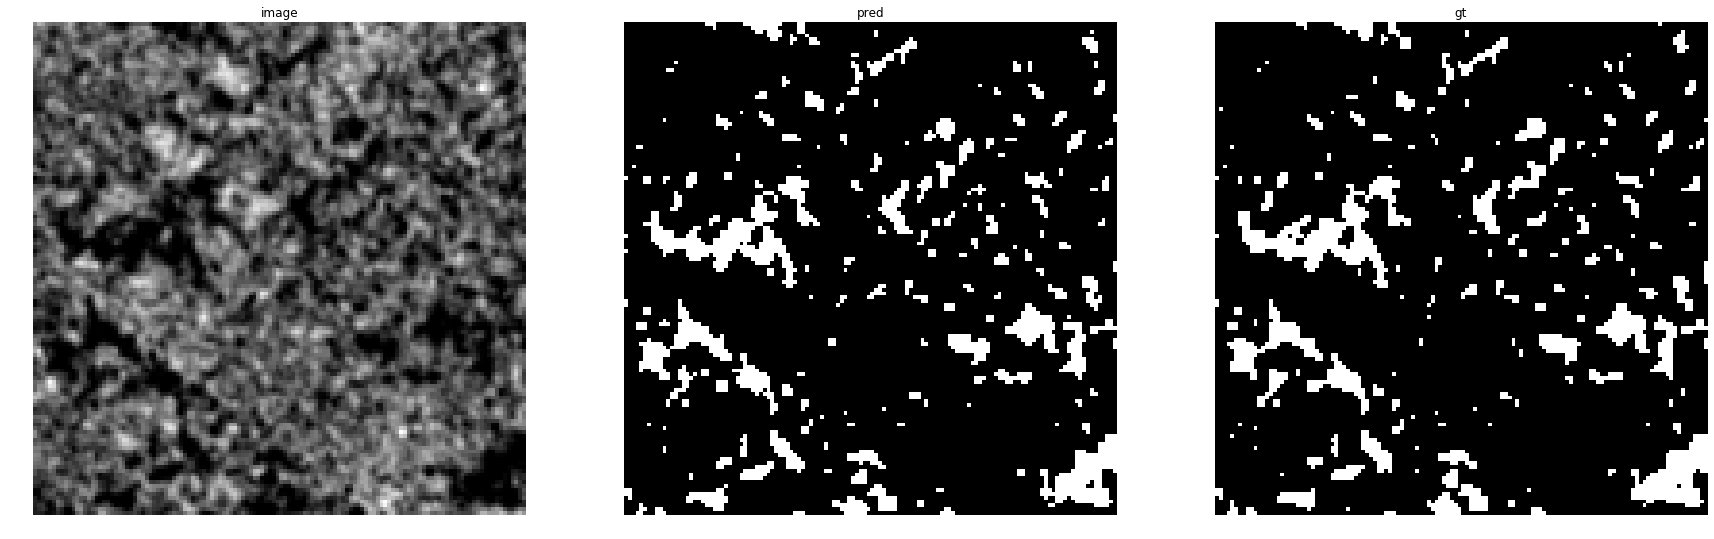

accuracy    : 0.98004150390625
precision   : 0.9309512312892323
recall      : 0.9128787878787878
f1          : 0.921826440353813
pr_auc      : 0.9817139614382367
iou         : 0.8549889135254989


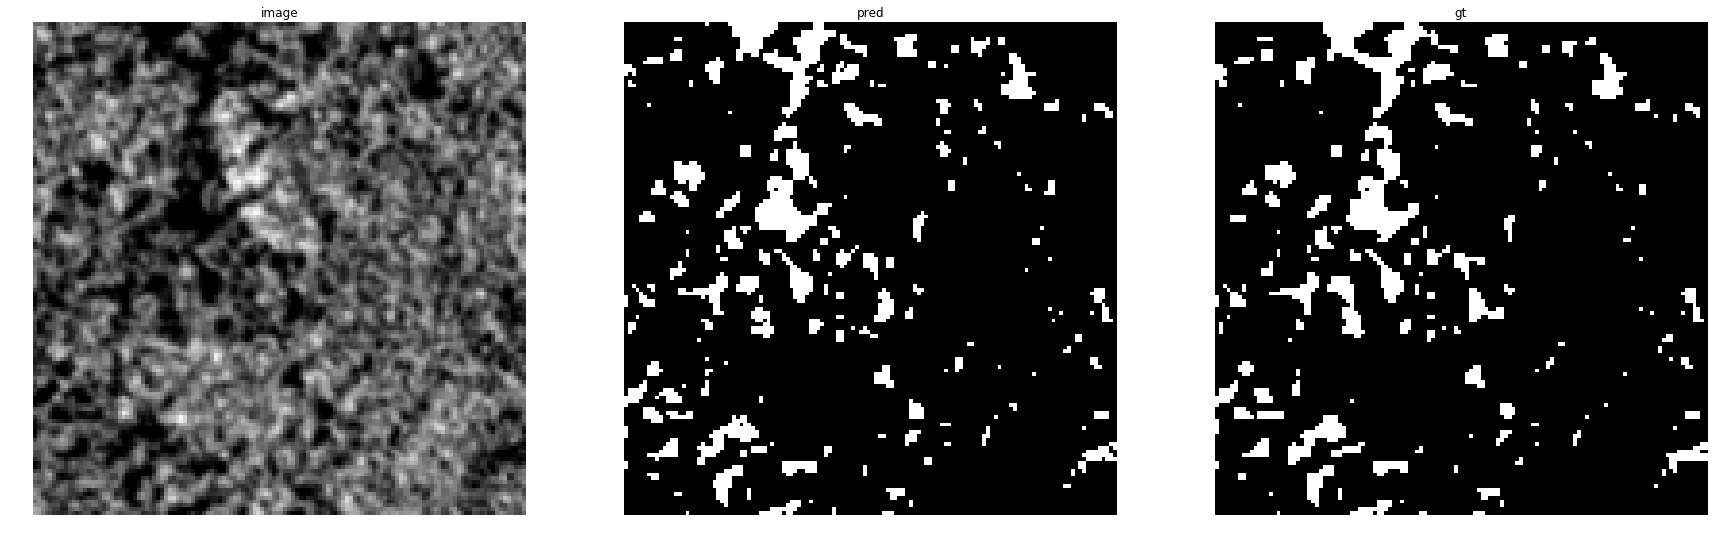

accuracy    : 0.982421875
precision   : 0.9137055837563451
recall      : 0.9230769230769231
f1          : 0.9183673469387756
pr_auc      : 0.9813141028946271
iou         : 0.8490566037735849


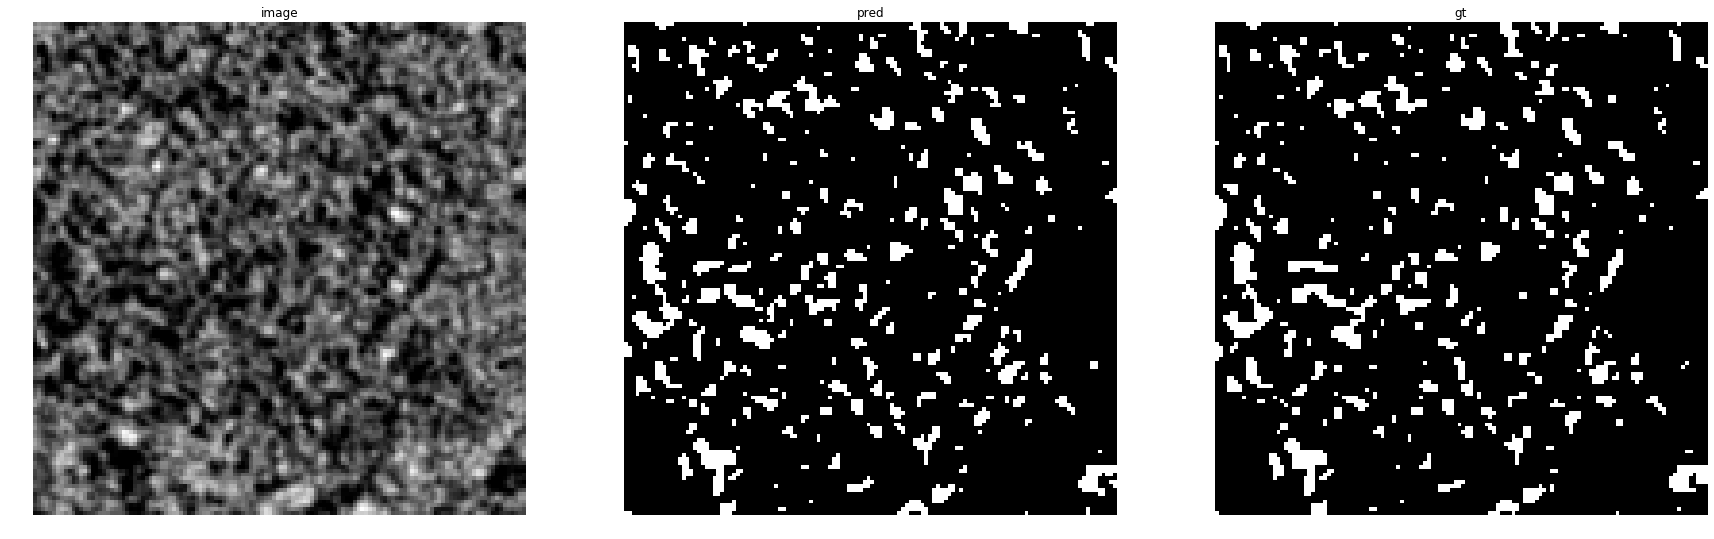

accuracy    : 0.98046875
precision   : 0.9047872340425532
recall      : 0.9234527687296417
f1          : 0.9140247178936056
pr_auc      : 0.9785011587947589
iou         : 0.8416625432953984


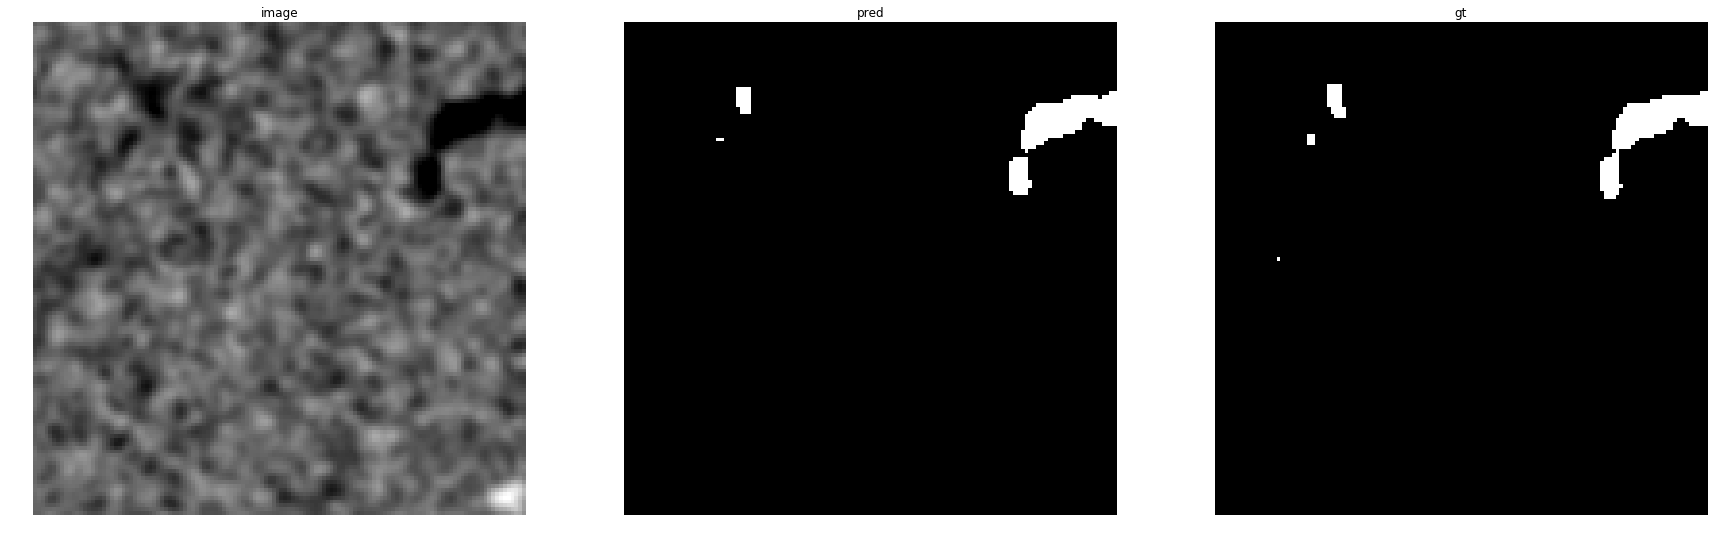

accuracy    : 0.9984130859375
precision   : 0.9897959183673469
recall      : 0.9267515923566879
f1          : 0.957236842105263
pr_auc      : 0.9972186631158659
iou         : 0.917981072555205


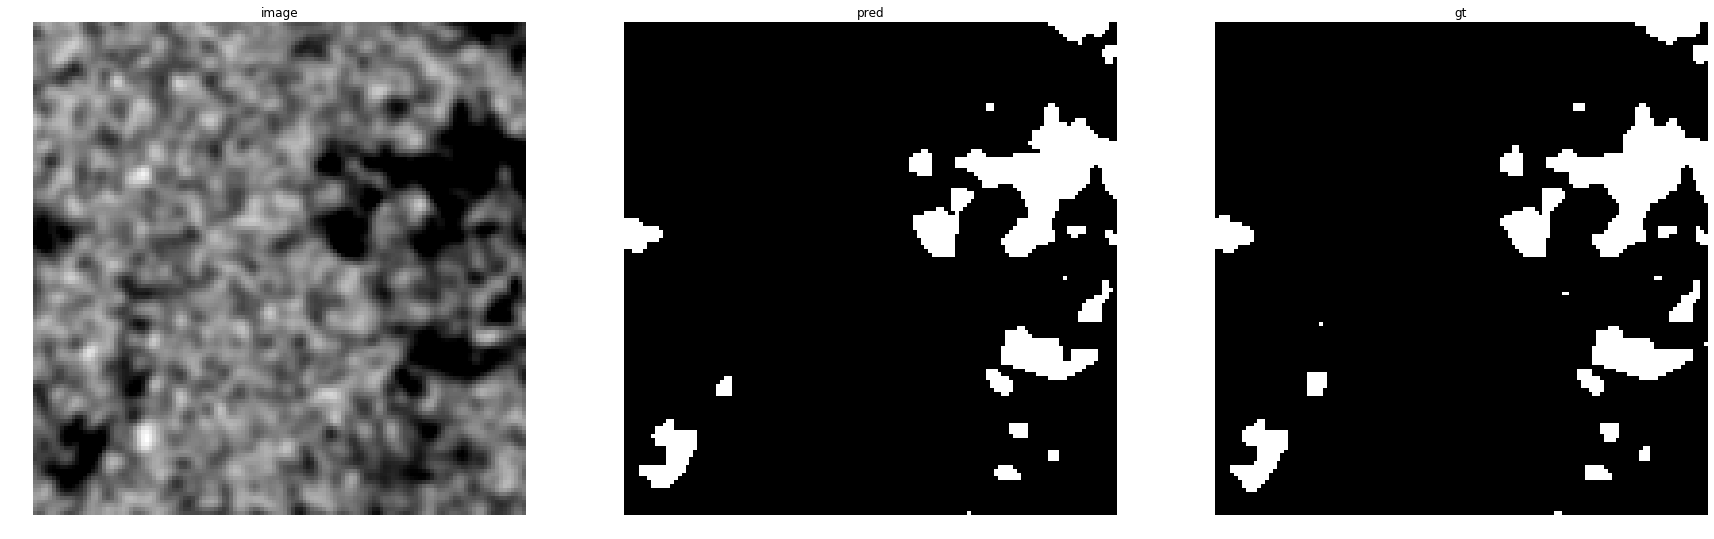

accuracy    : 0.992919921875
precision   : 0.9846972721224219
recall      : 0.9408773045136681
f1          : 0.9622886866059818
pr_auc      : 0.9968880879126321
iou         : 0.9273182957393483


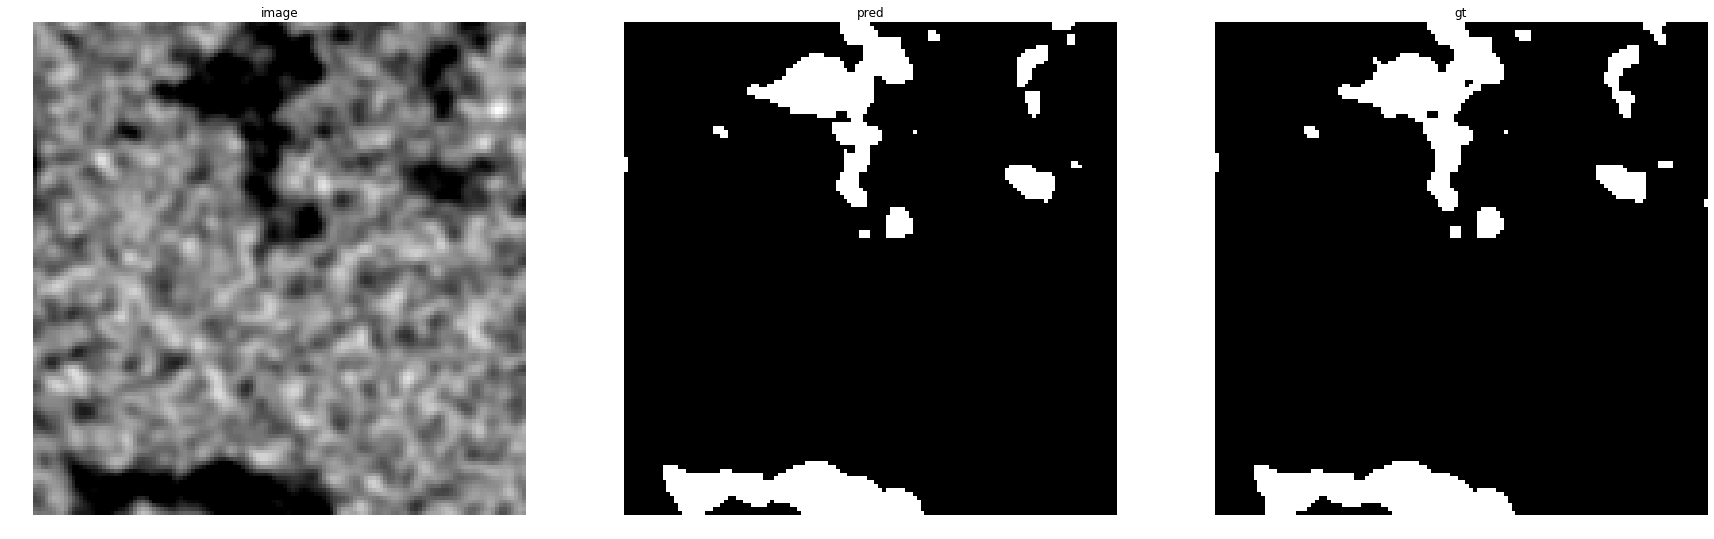

accuracy    : 0.99346923828125
precision   : 0.9949044585987261
recall      : 0.9403973509933775
f1          : 0.9668833178582482
pr_auc      : 0.9979608431088159
iou         : 0.9358897543439185


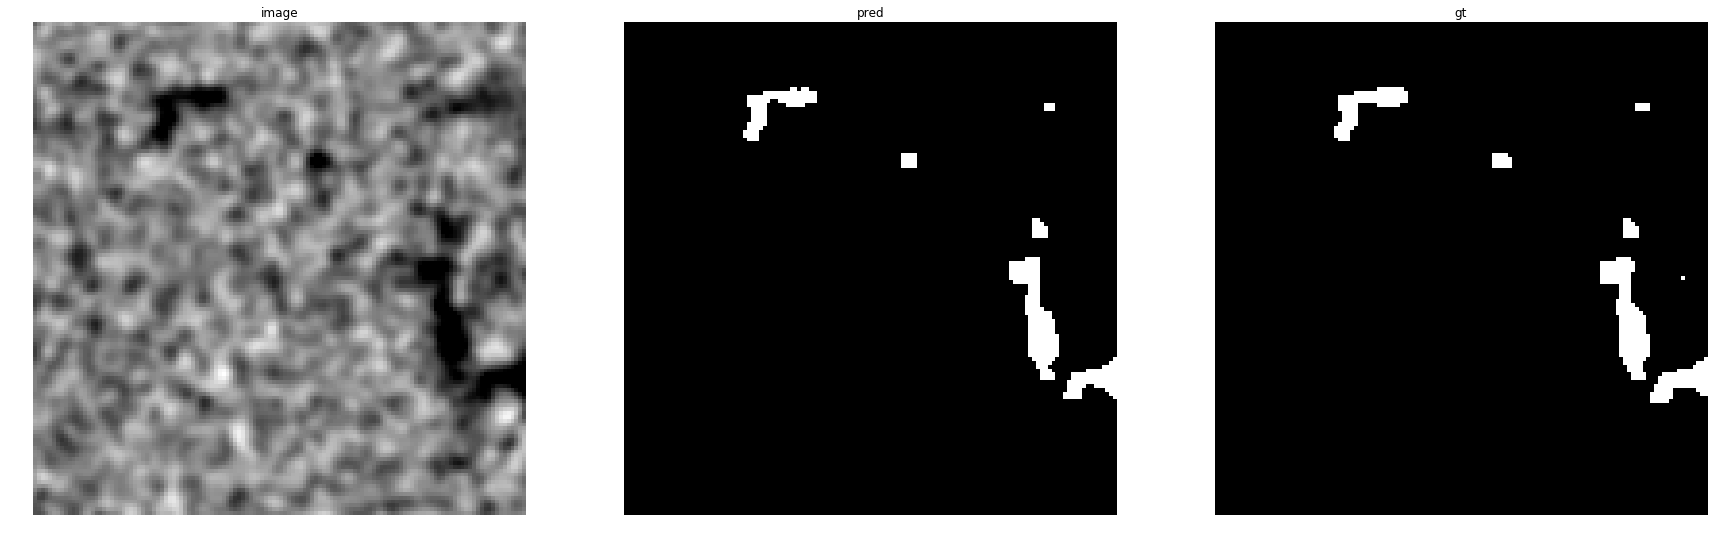

accuracy    : 0.99761962890625
precision   : 0.9951219512195122
recall      : 0.9168539325842696
f1          : 0.9543859649122808
pr_auc      : 0.9967361206264995
iou         : 0.912751677852349


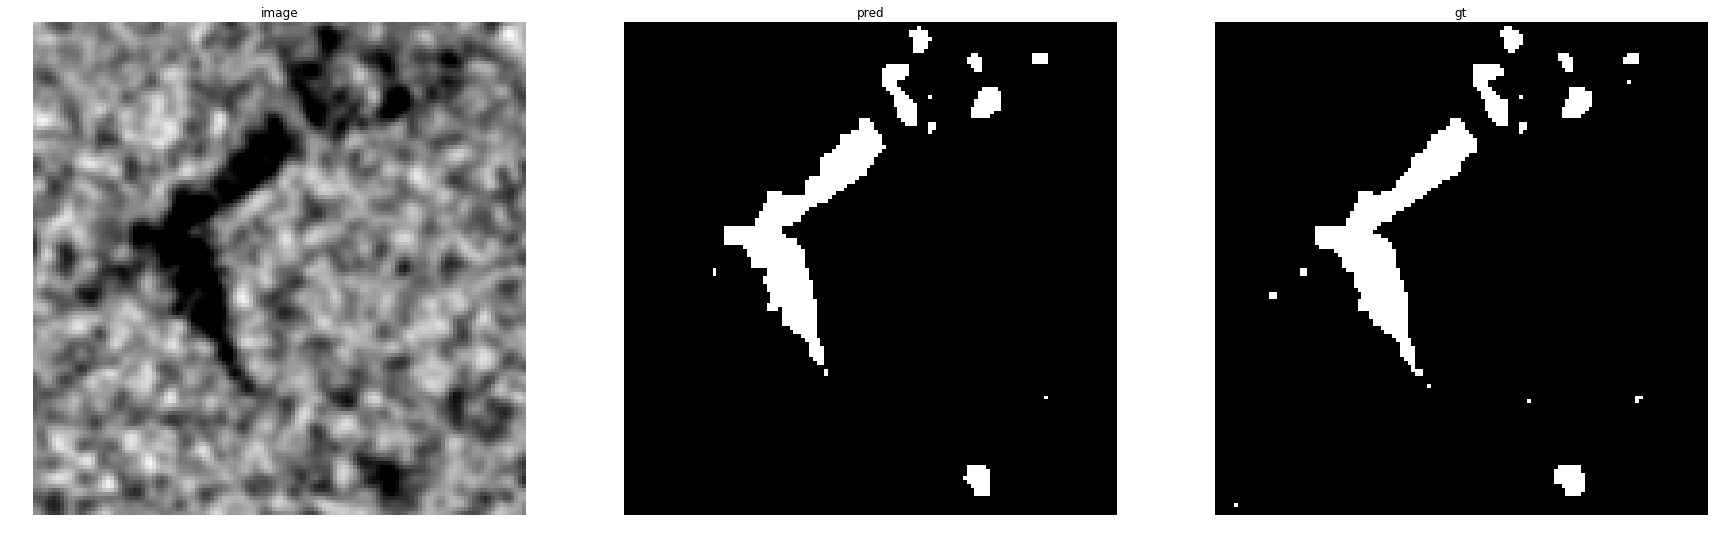

accuracy    : 0.9949951171875
precision   : 0.9892818863879957
recall      : 0.9276381909547738
f1          : 0.9574688796680497
pr_auc      : 0.9969854640276483
iou         : 0.918407960199005


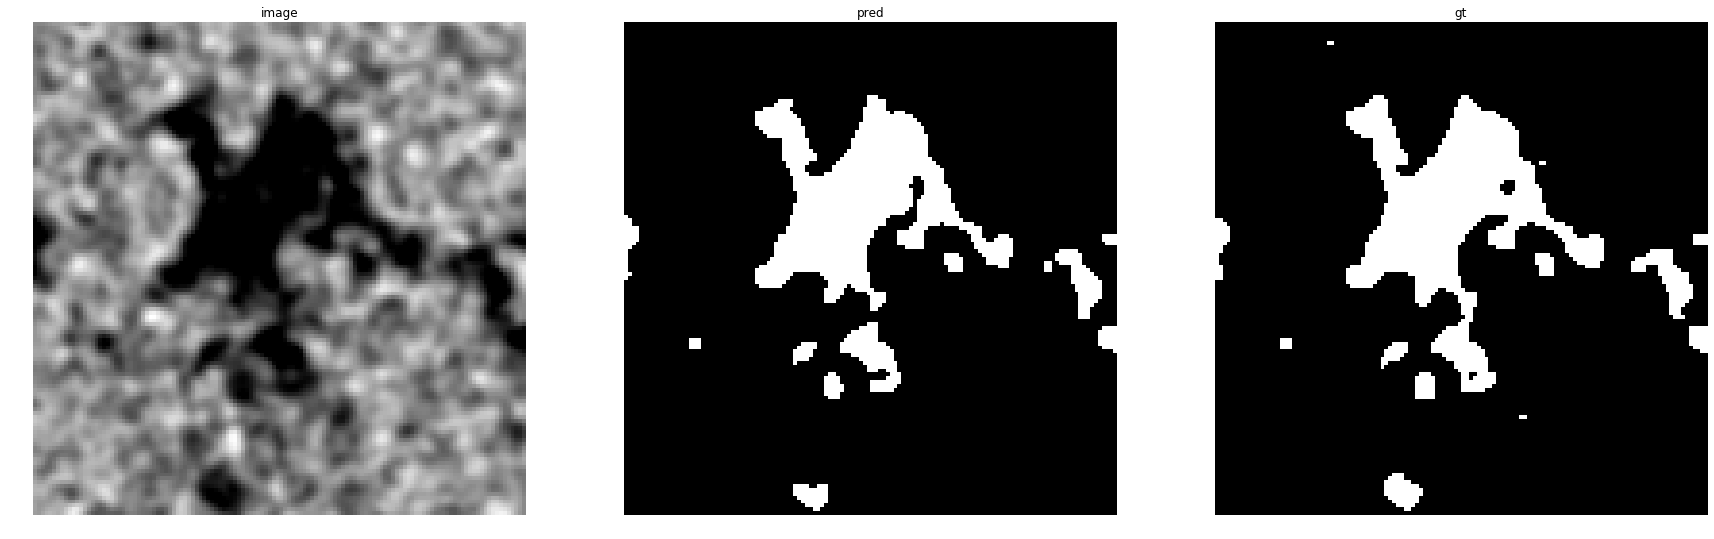

accuracy    : 0.99017333984375
precision   : 0.9940298507462687
recall      : 0.9306008383791337
f1          : 0.9612701467404379
pr_auc      : 0.9984688892745792
iou         : 0.9254284390921723


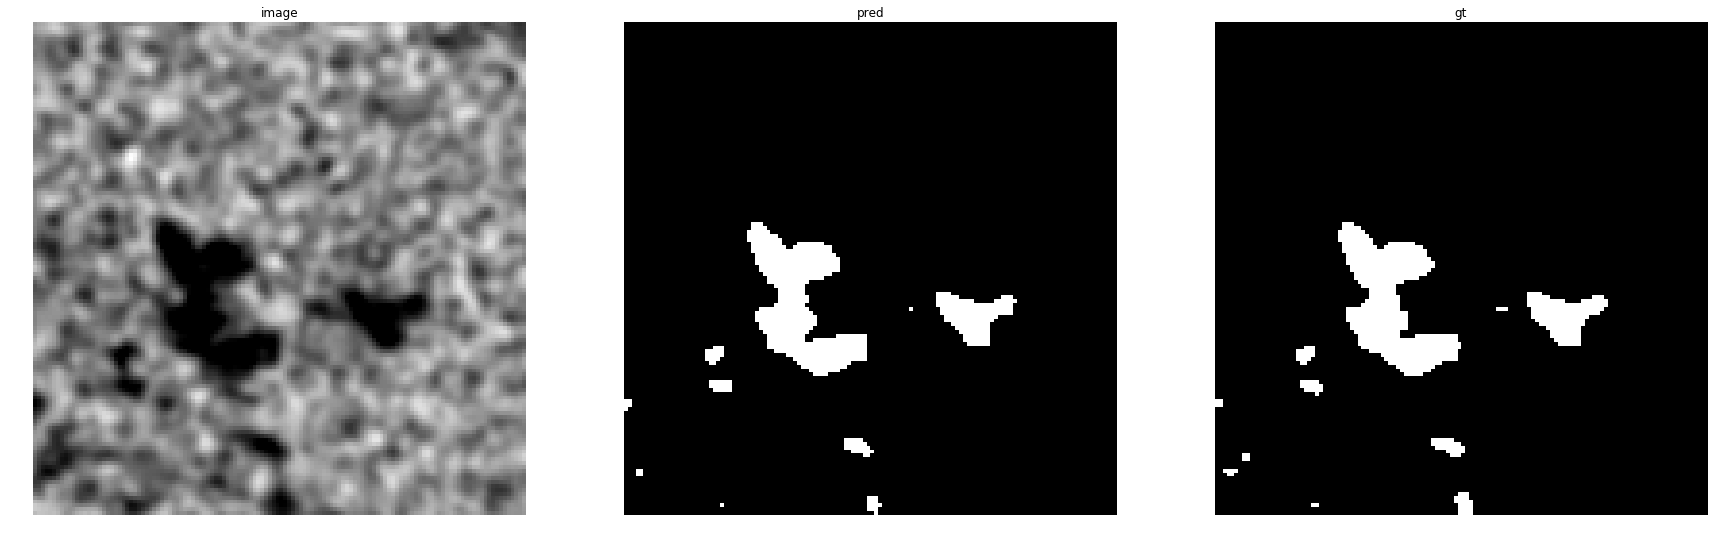

accuracy    : 0.99603271484375
precision   : 0.9891172914147521
recall      : 0.9359267734553776
f1          : 0.9617871840094062
pr_auc      : 0.9979336289071661
iou         : 0.9263873159682899


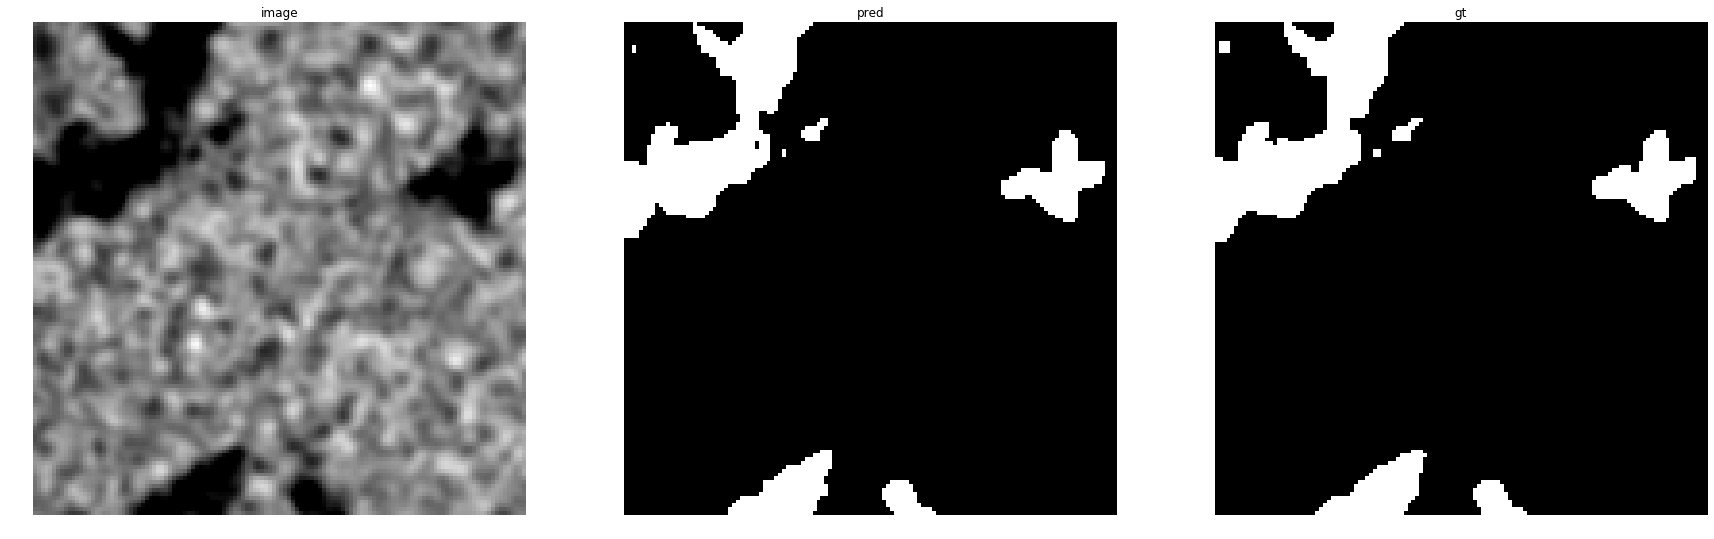

accuracy    : 0.99468994140625
precision   : 0.9959793222286043
recall      : 0.9558985667034179
f1          : 0.9755274261603375
pr_auc      : 0.998902949318273
iou         : 0.9522240527182867


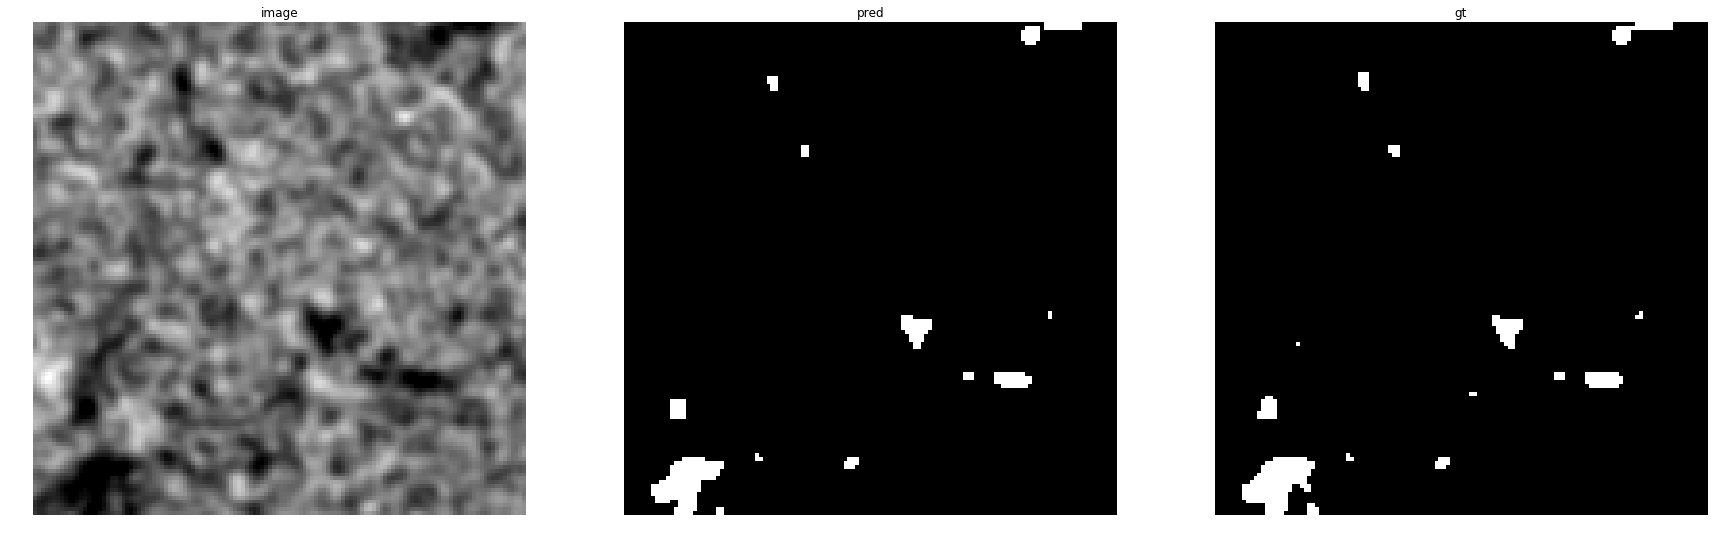

accuracy    : 0.997314453125
precision   : 0.9911764705882353
recall      : 0.8915343915343915
f1          : 0.9387186629526462
pr_auc      : 0.9949042304637984
iou         : 0.884514435695538


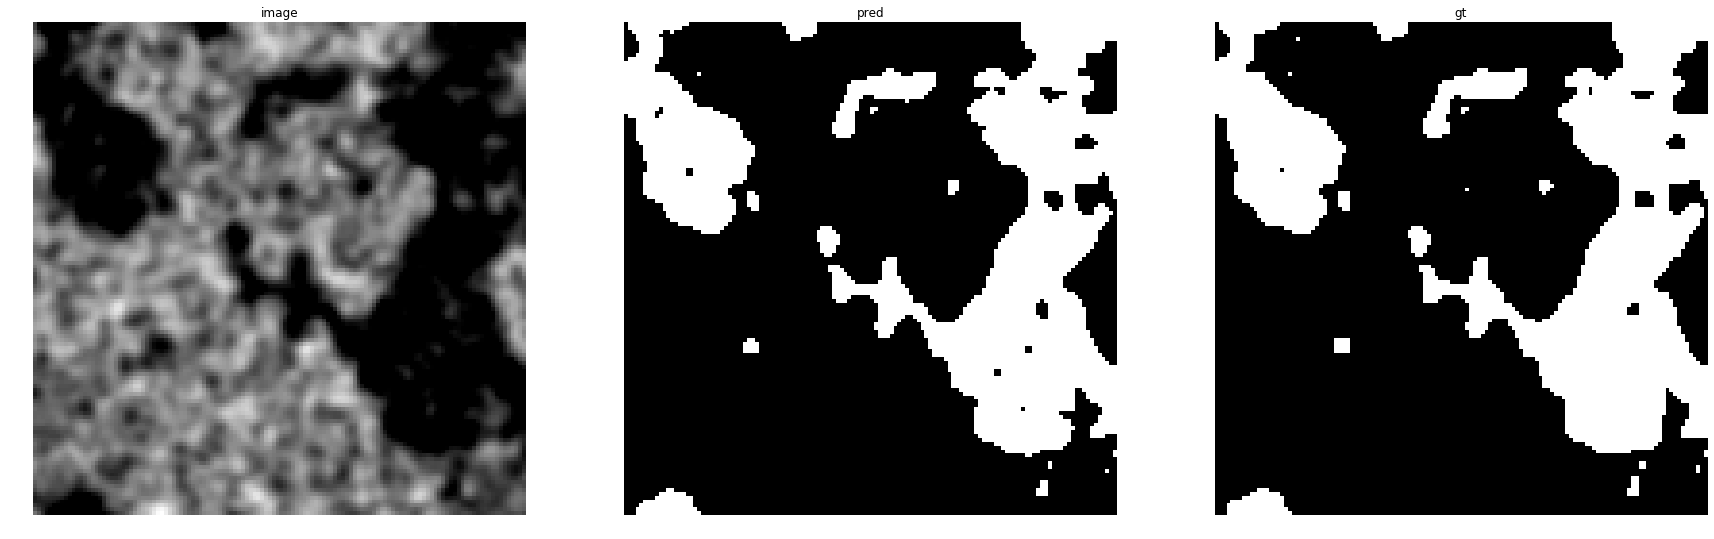

accuracy    : 0.98956298828125
precision   : 0.9951011714589989
recall      : 0.9692946058091286
f1          : 0.9820283762480294
pr_auc      : 0.9992927385868077
iou         : 0.9646913070410902


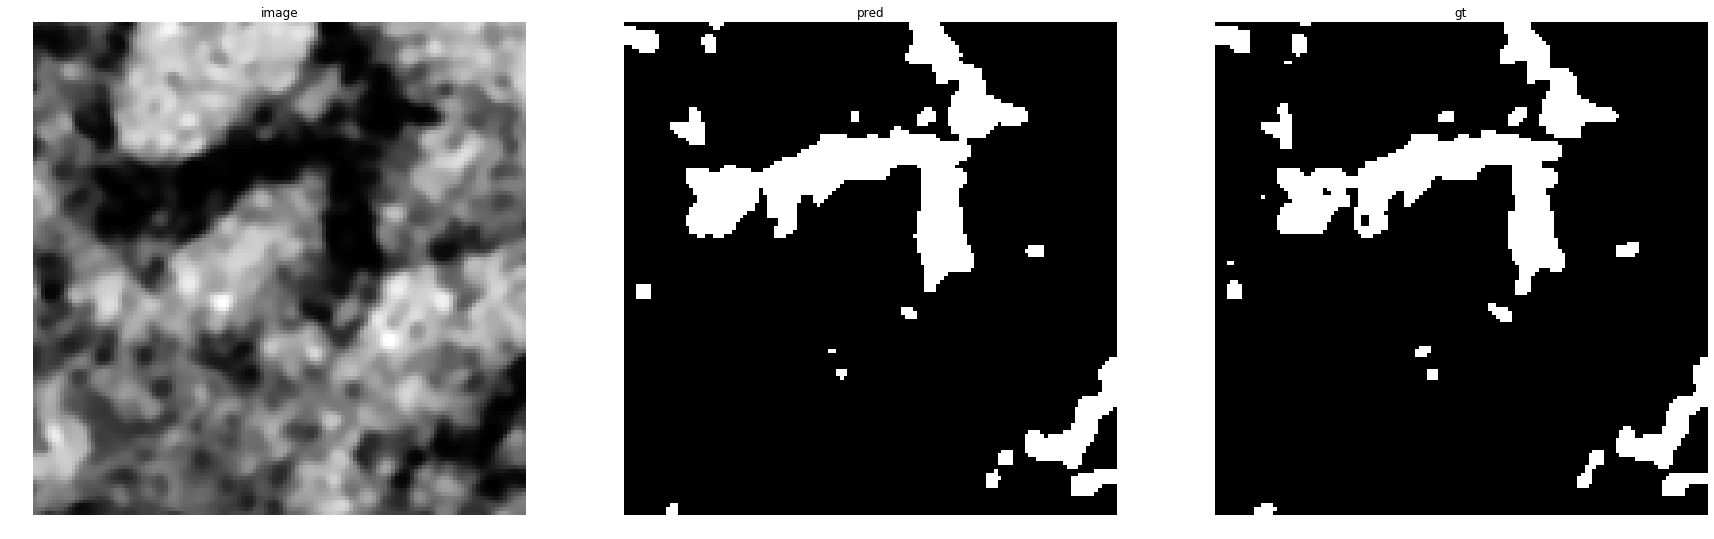

accuracy    : 0.98388671875
precision   : 0.9211981566820276
recall      : 0.9555449330783938
f1          : 0.9380572501173157
pr_auc      : 0.9899445757828214
iou         : 0.8833406981882457


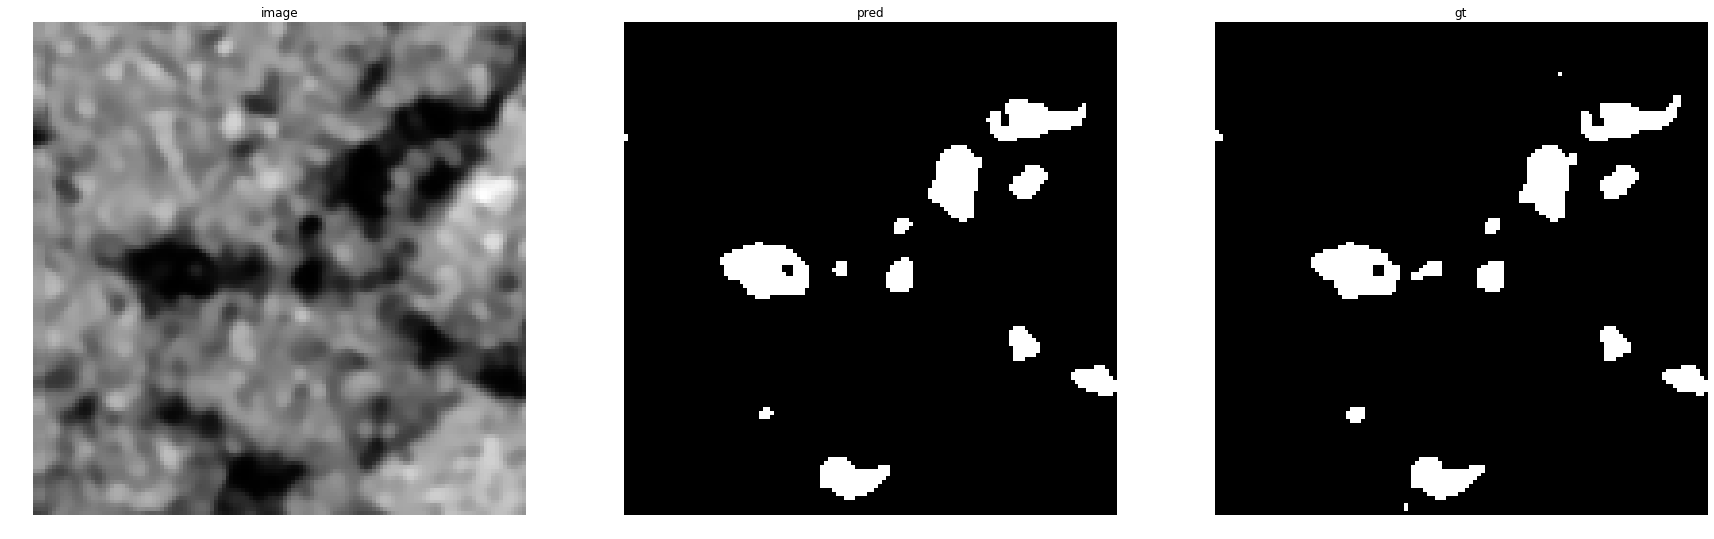

accuracy    : 0.9942626953125
precision   : 0.9541375872382851
recall      : 0.9522388059701492
f1          : 0.953187250996016
pr_auc      : 0.9916838371408402
iou         : 0.9105613701236918


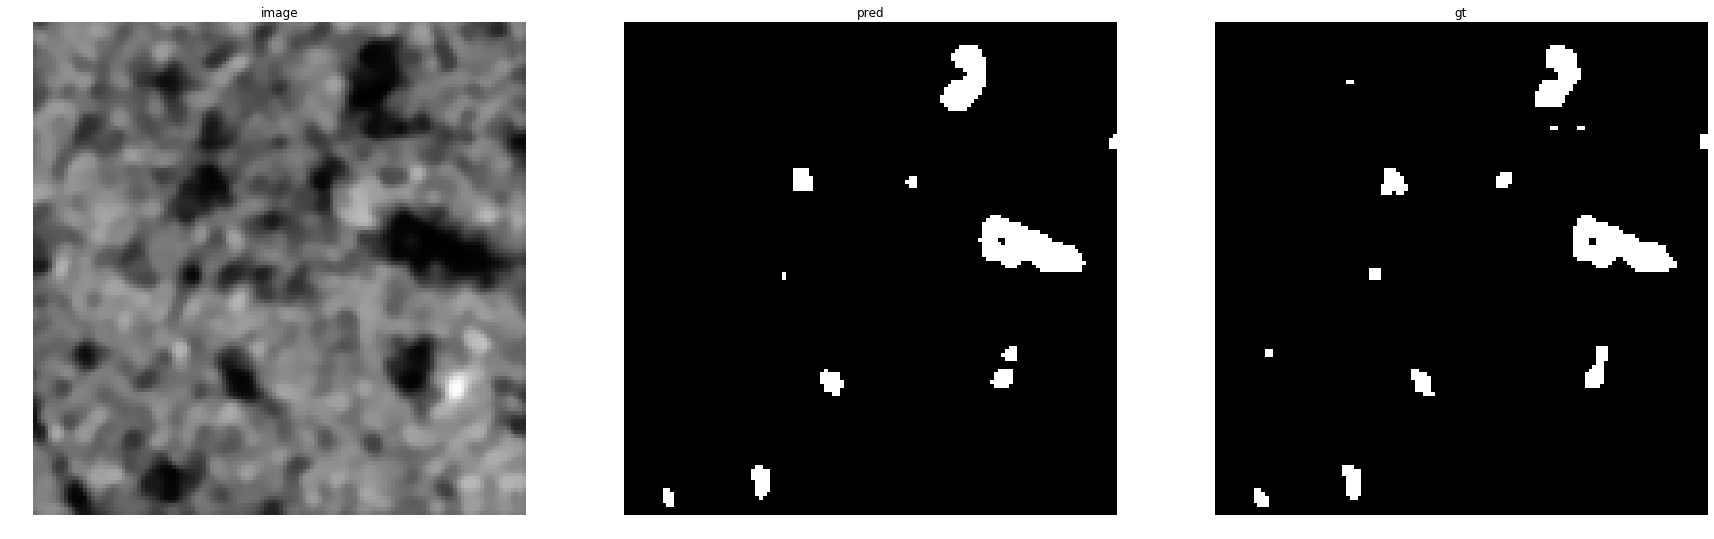

accuracy    : 0.9942626953125
precision   : 0.9246704331450094
recall      : 0.9009174311926605
f1          : 0.912639405204461
pr_auc      : 0.9782418596290933
iou         : 0.8393162393162393


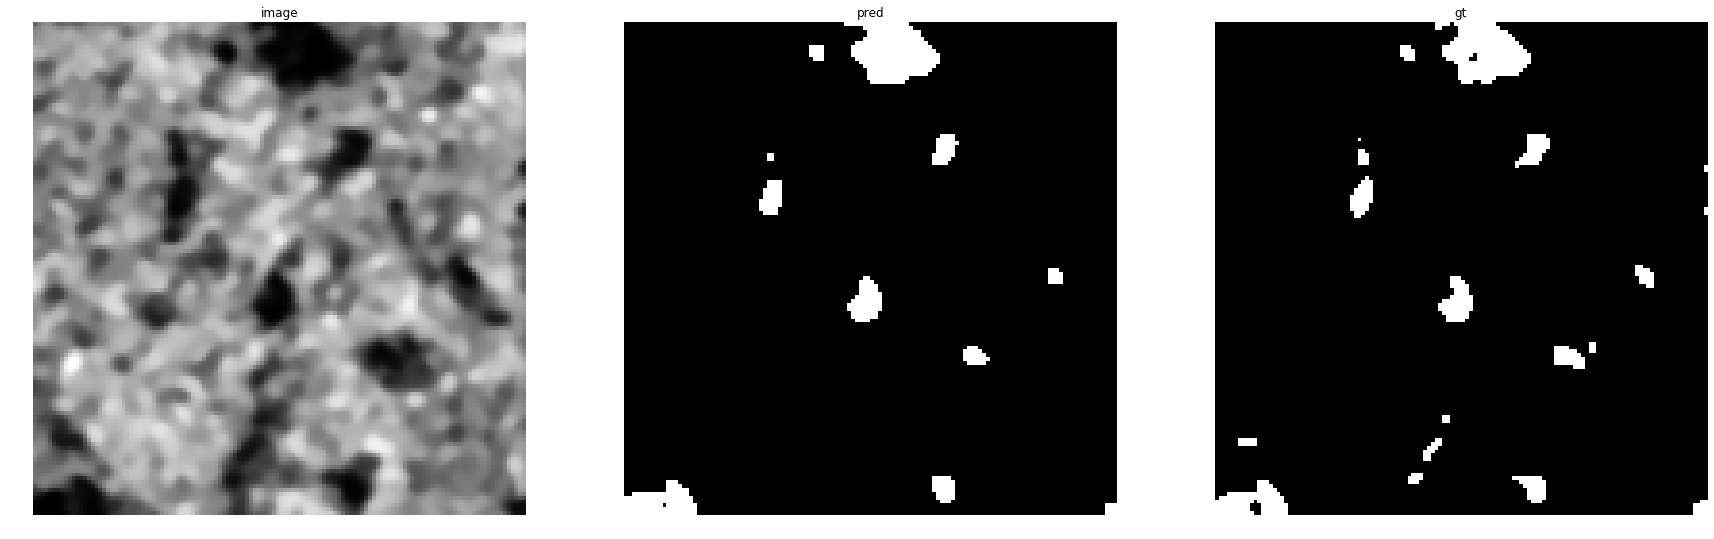

accuracy    : 0.9918212890625
precision   : 0.9435975609756098
recall      : 0.8645251396648045
f1          : 0.9023323615160351
pr_auc      : 0.9788041001335583
iou         : 0.8220451527224436


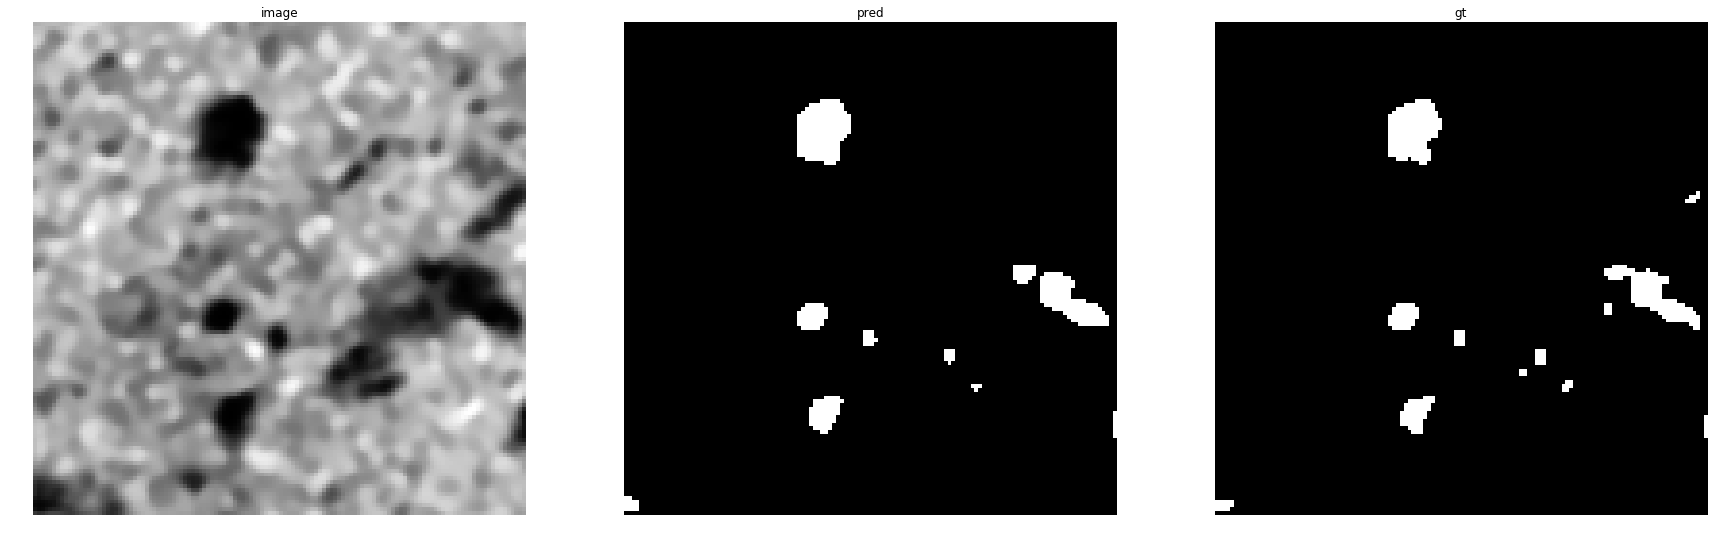

accuracy    : 0.995361328125
precision   : 0.9226190476190477
recall      : 0.9262948207171314
f1          : 0.9244532803180916
pr_auc      : 0.9803366452911014
iou         : 0.8595194085027726


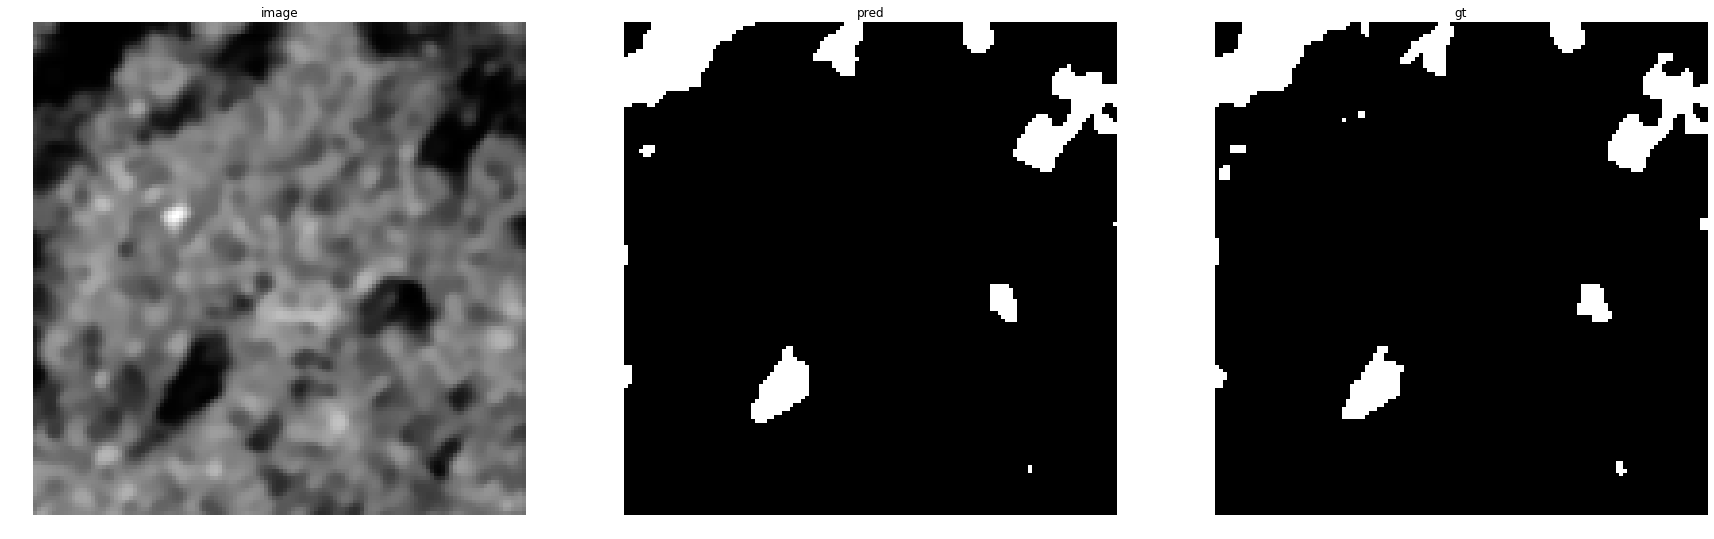

accuracy    : 0.99151611328125
precision   : 0.9505962521294719
recall      : 0.9323308270676691
f1          : 0.9413749472796289
pr_auc      : 0.9906500838768816
iou         : 0.8892430278884462


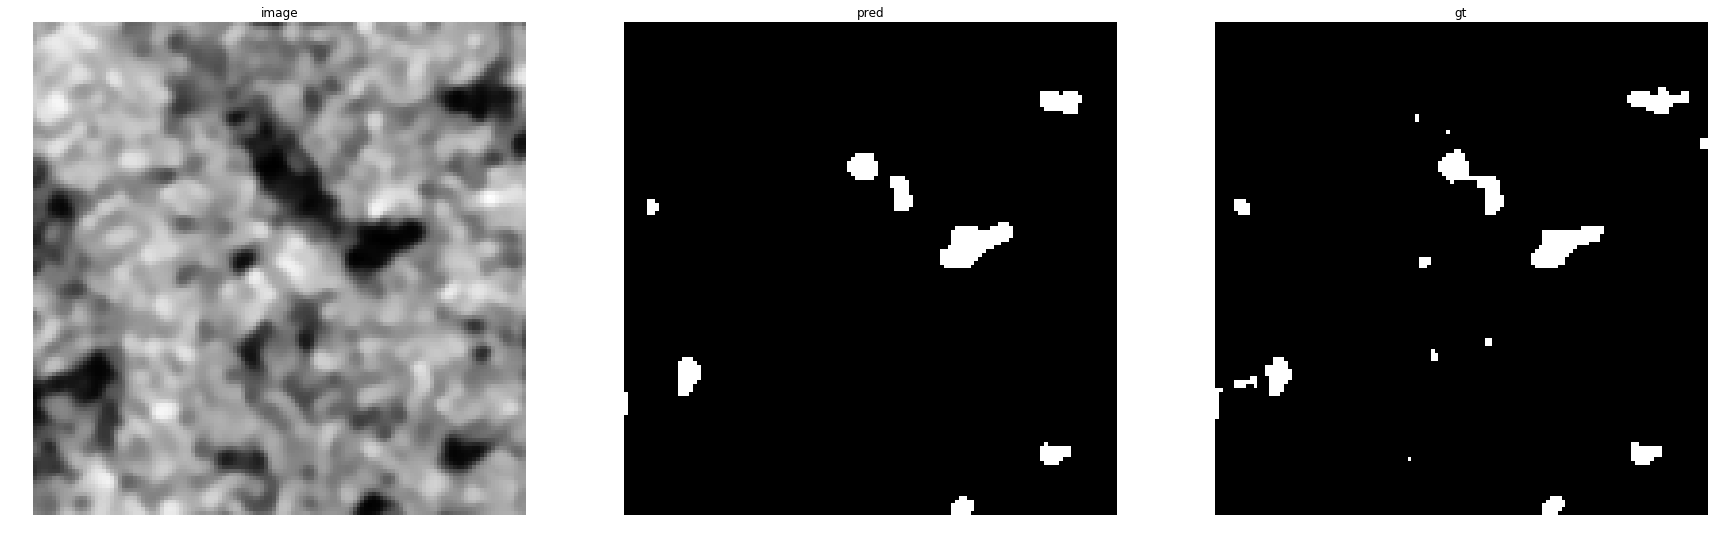

accuracy    : 0.99365234375
precision   : 0.9351620947630923
recall      : 0.8278145695364238
f1          : 0.8782201405152225
pr_auc      : 0.9612619479950816
iou         : 0.7828810020876826


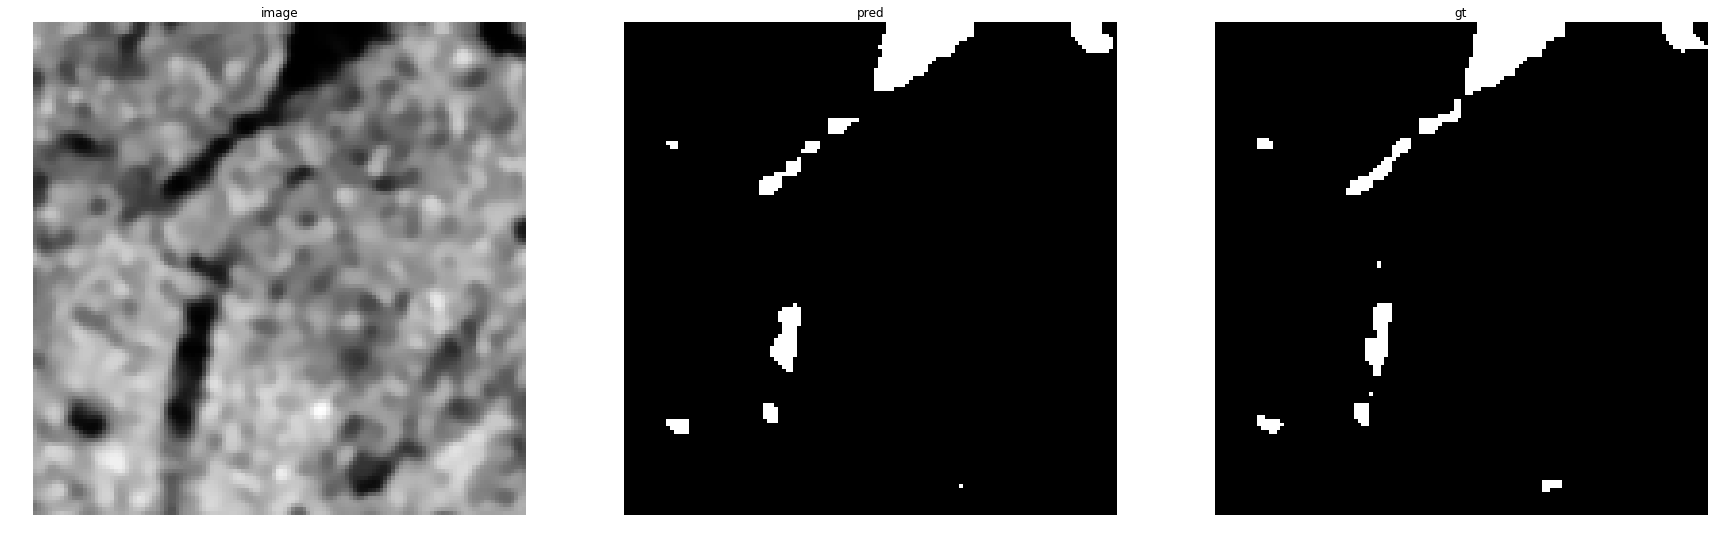

accuracy    : 0.9940185546875
precision   : 0.9442508710801394
recall      : 0.8914473684210527
f1          : 0.9170896785109983
pr_auc      : 0.9853804267379285
iou         : 0.846875


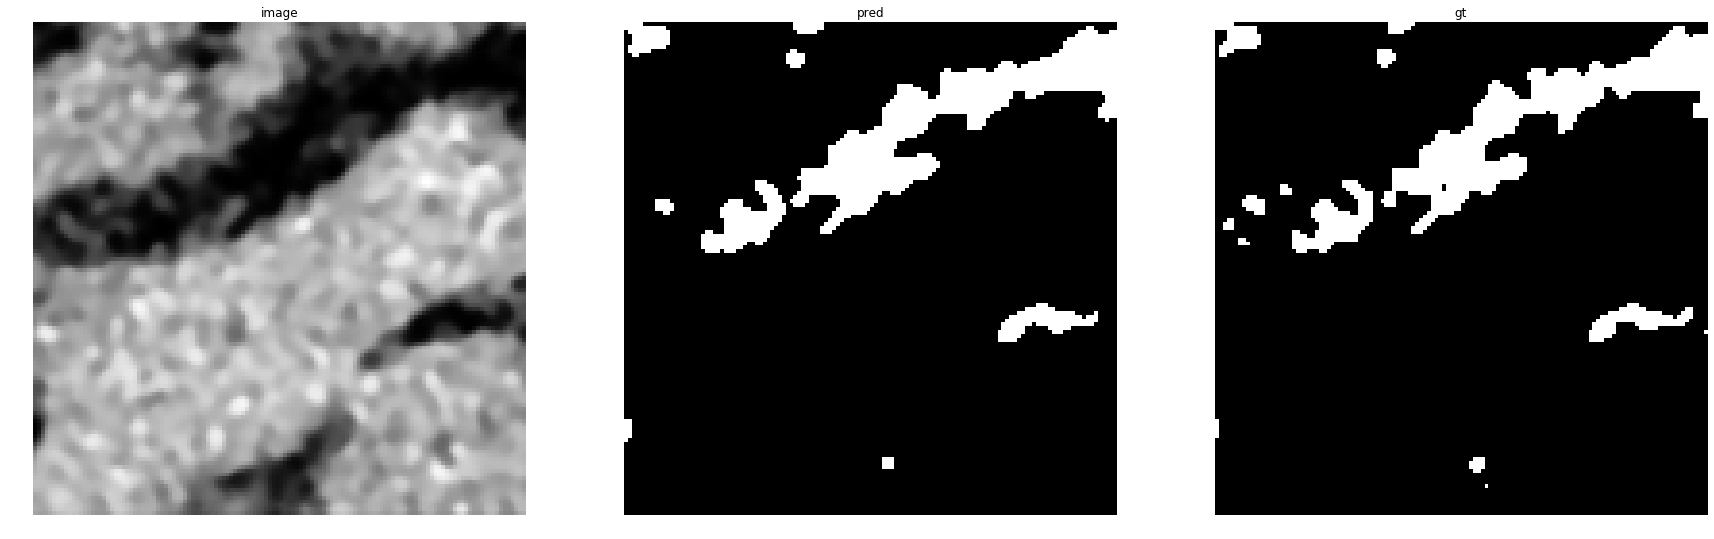

accuracy    : 0.98883056640625
precision   : 0.9268433179723502
recall      : 0.9663663663663664
f1          : 0.9461922963834167
pr_auc      : 0.9910800030415285
iou         : 0.8978794642857143


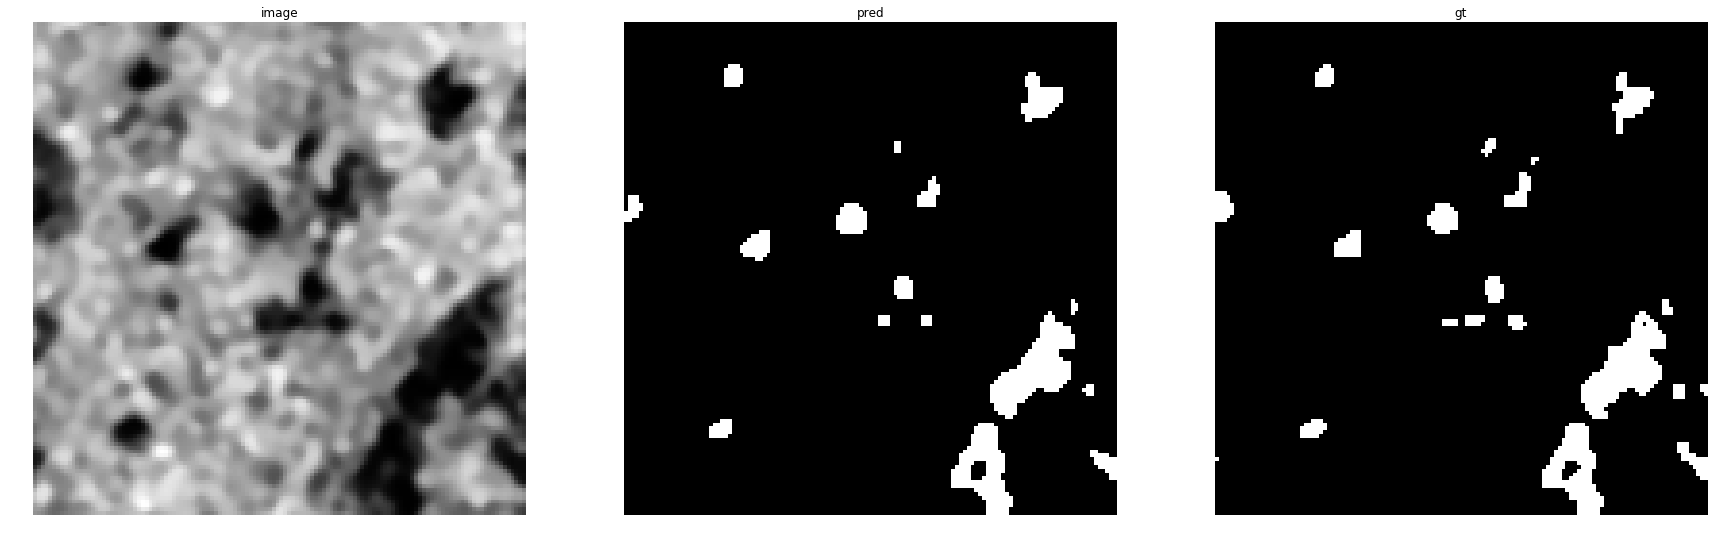

accuracy    : 0.9910888671875
precision   : 0.957471264367816
recall      : 0.8842887473460722
f1          : 0.9194260485651214
pr_auc      : 0.9849871457058446
iou         : 0.8508682328907048


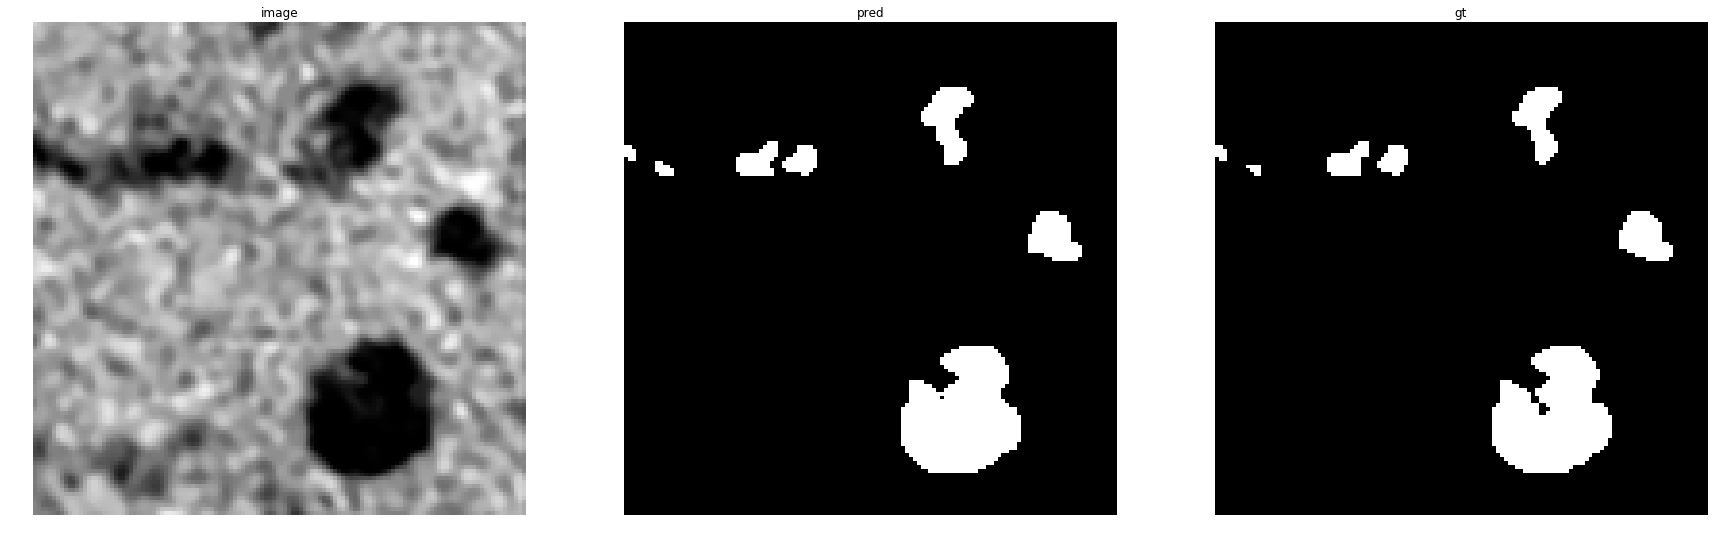

accuracy    : 0.99627685546875
precision   : 0.9508057675996607
recall      : 0.9973309608540926
f1          : 0.9735128093790708
pr_auc      : 0.998440863625498
iou         : 0.9483925549915397


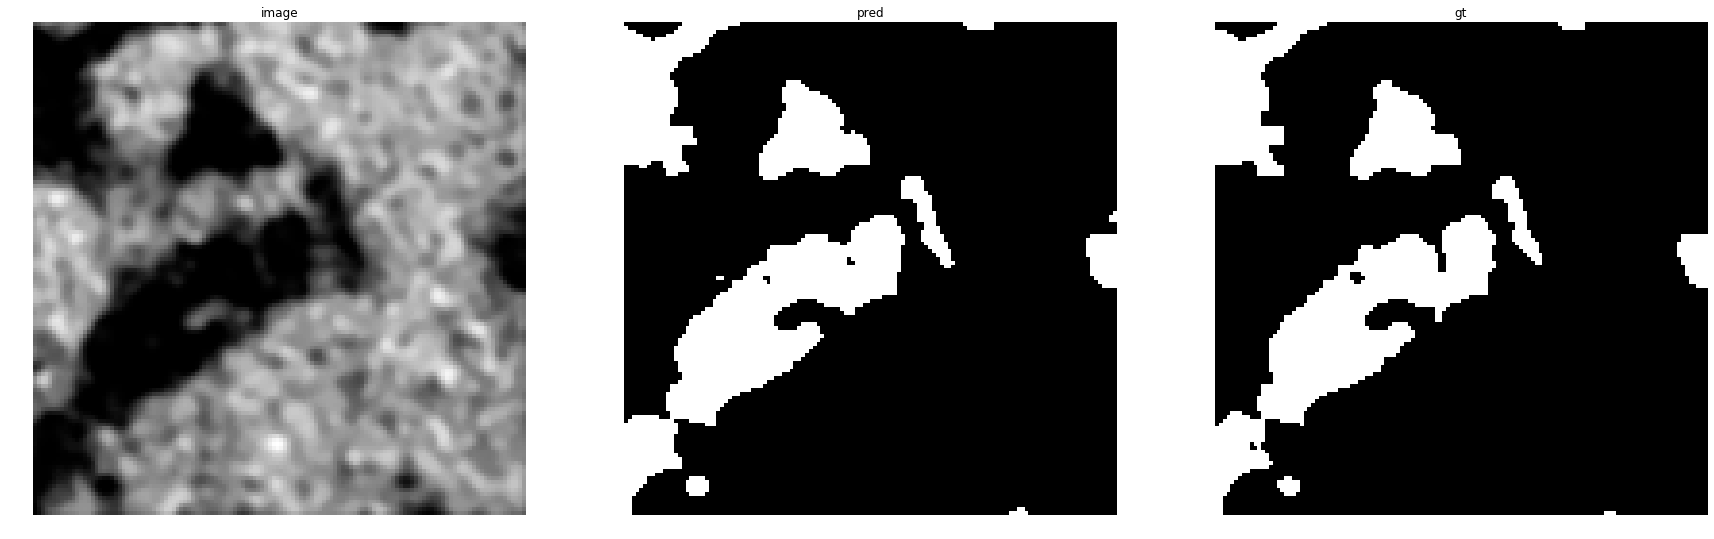

accuracy    : 0.9901123046875
precision   : 0.9532493368700266
recall      : 0.9927486187845304
f1          : 0.9725981055480378
pr_auc      : 0.9986258981352872
iou         : 0.9466578860717814


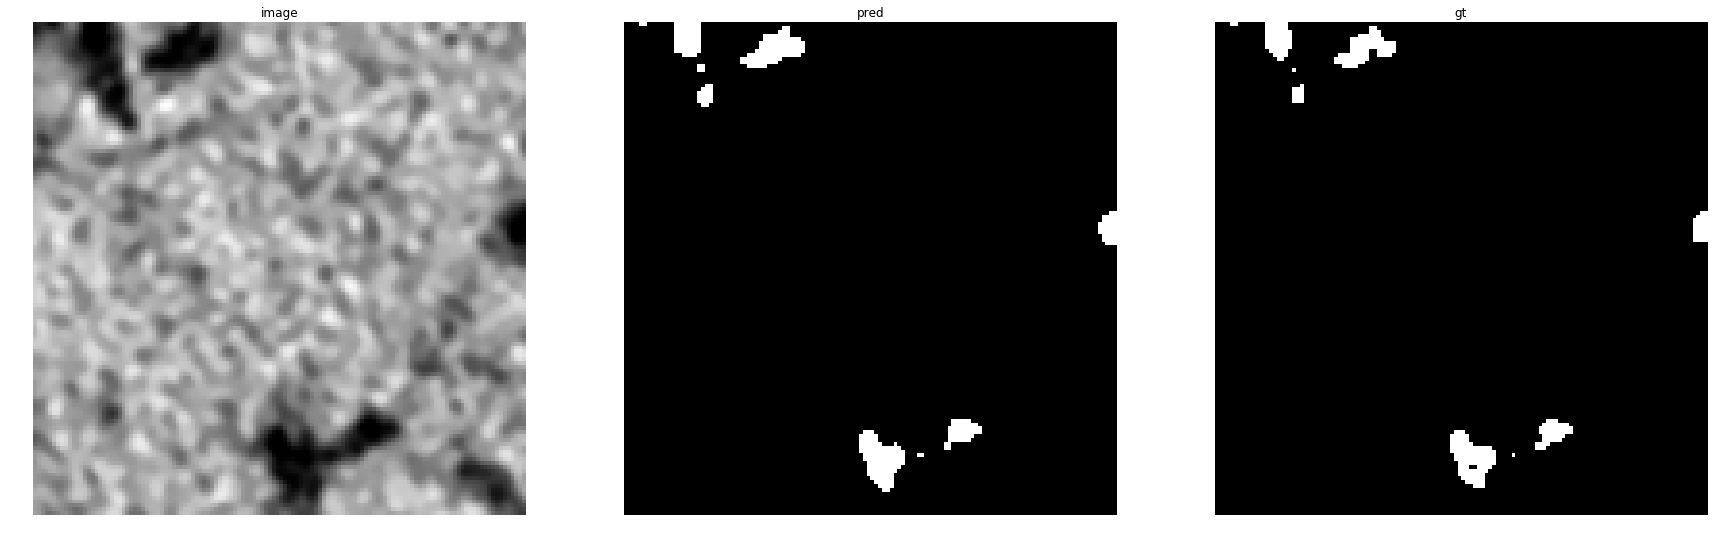

accuracy    : 0.996826171875
precision   : 0.8831168831168831
recall      : 0.9798270893371758
f1          : 0.9289617486338797
pr_auc      : 0.9930997891978484
iou         : 0.8673469387755102


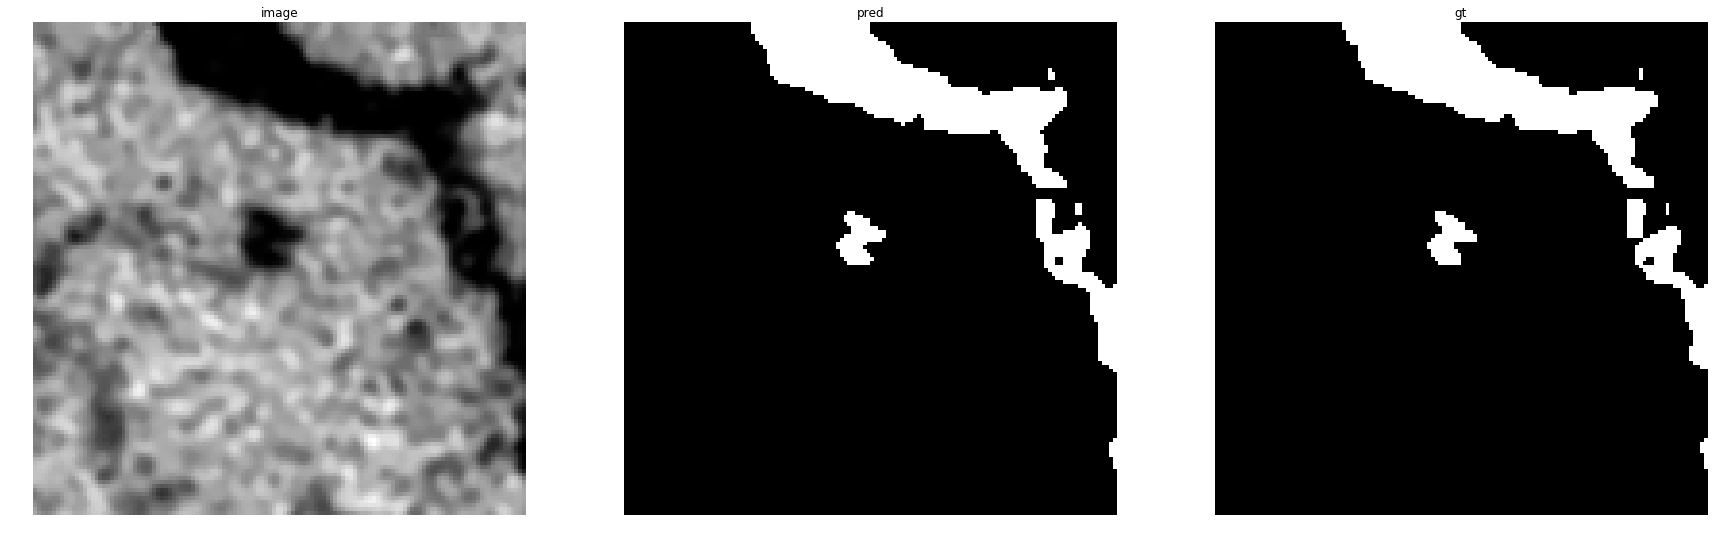

accuracy    : 0.994873046875
precision   : 0.9557979334098737
recall      : 0.9958133971291866
f1          : 0.9753954305799649
pr_auc      : 0.999164035164238
iou         : 0.9519725557461407


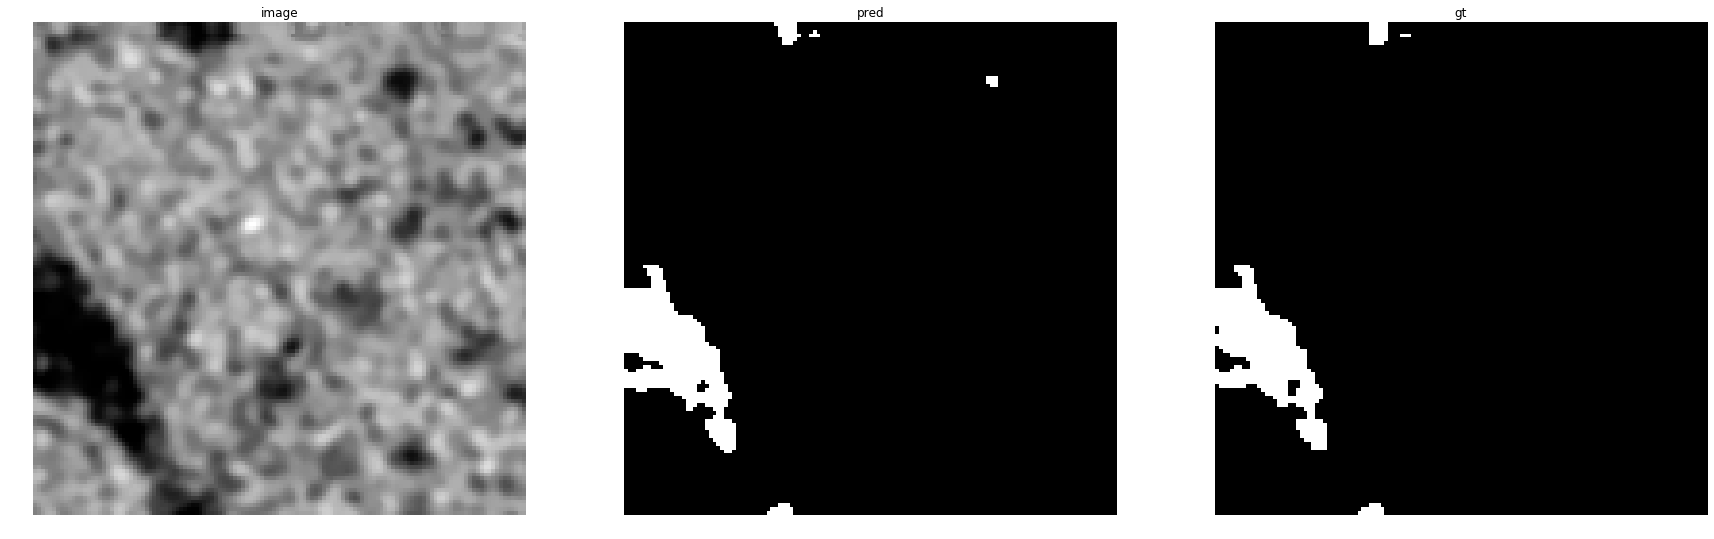

accuracy    : 0.99664306640625
precision   : 0.9290780141843972
recall      : 0.9924242424242424
f1          : 0.9597069597069597
pr_auc      : 0.9975487779841372
iou         : 0.9225352112676056


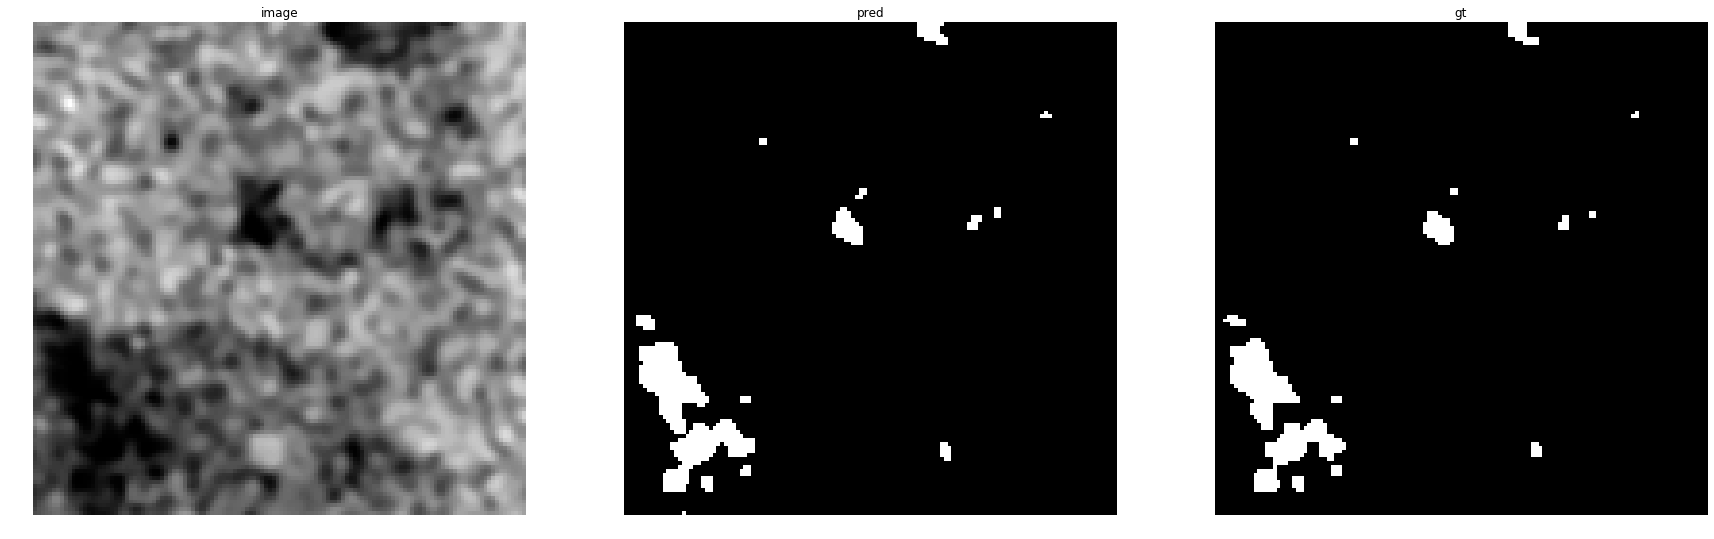

accuracy    : 0.99560546875
precision   : 0.9036544850498339
recall      : 0.974910394265233
f1          : 0.9379310344827587
pr_auc      : 0.9911216729502857
iou         : 0.8831168831168831


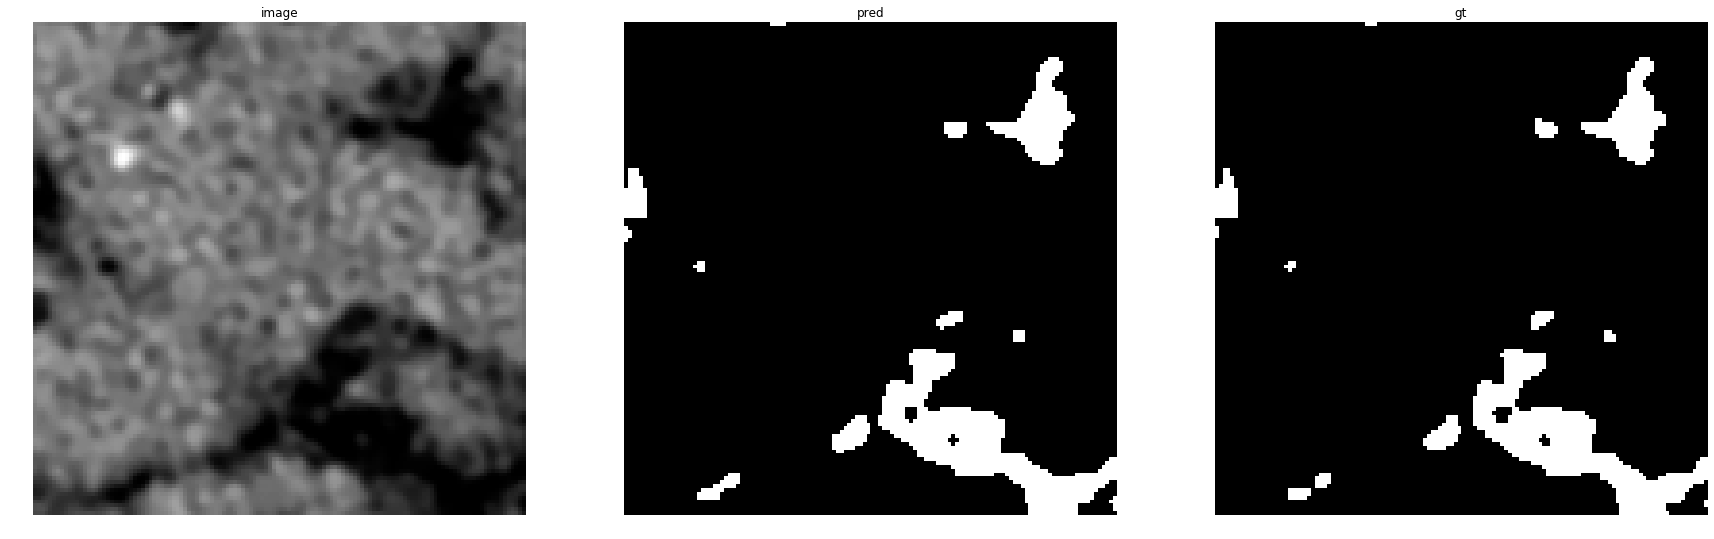

accuracy    : 0.99493408203125
precision   : 0.9434944237918216
recall      : 0.9945141065830722
f1          : 0.9683326974437239
pr_auc      : 0.9979669182183417
iou         : 0.9386094674556213


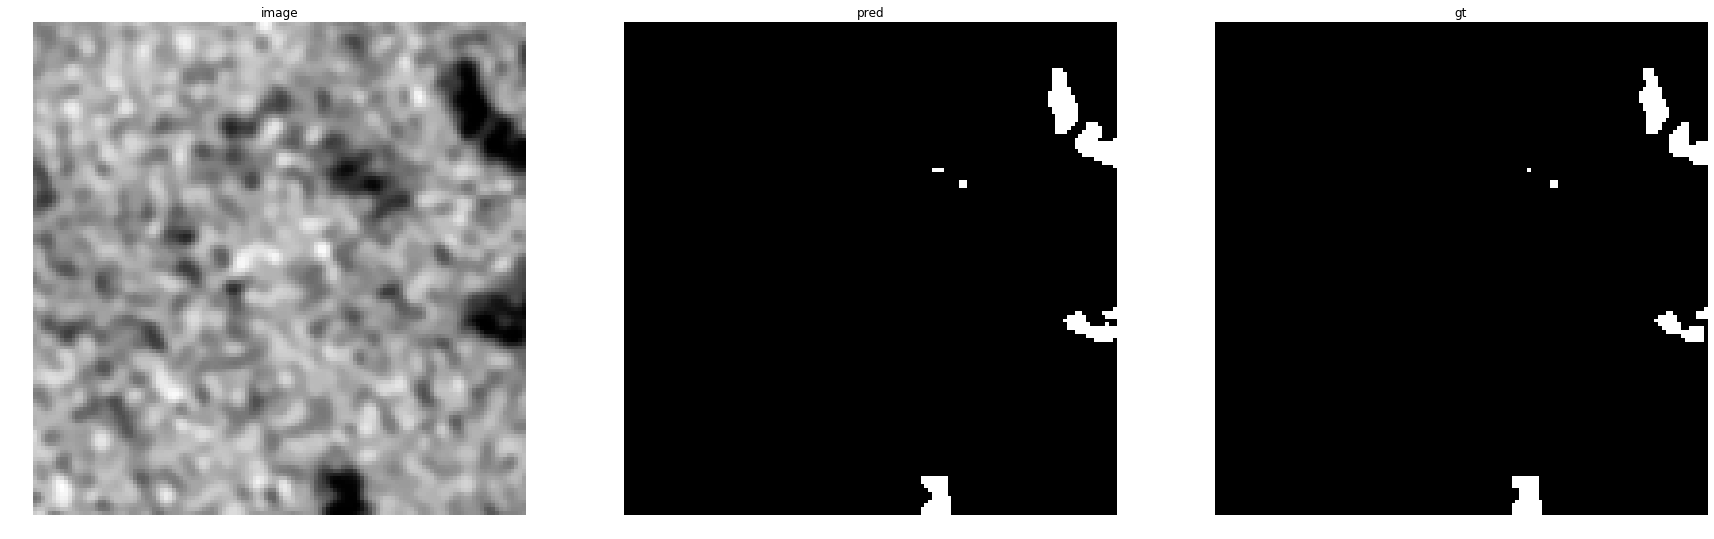

accuracy    : 0.9976806640625
precision   : 0.890728476821192
recall      : 0.9817518248175182
f1          : 0.9340277777777777
pr_auc      : 0.9924221530418034
iou         : 0.8762214983713354


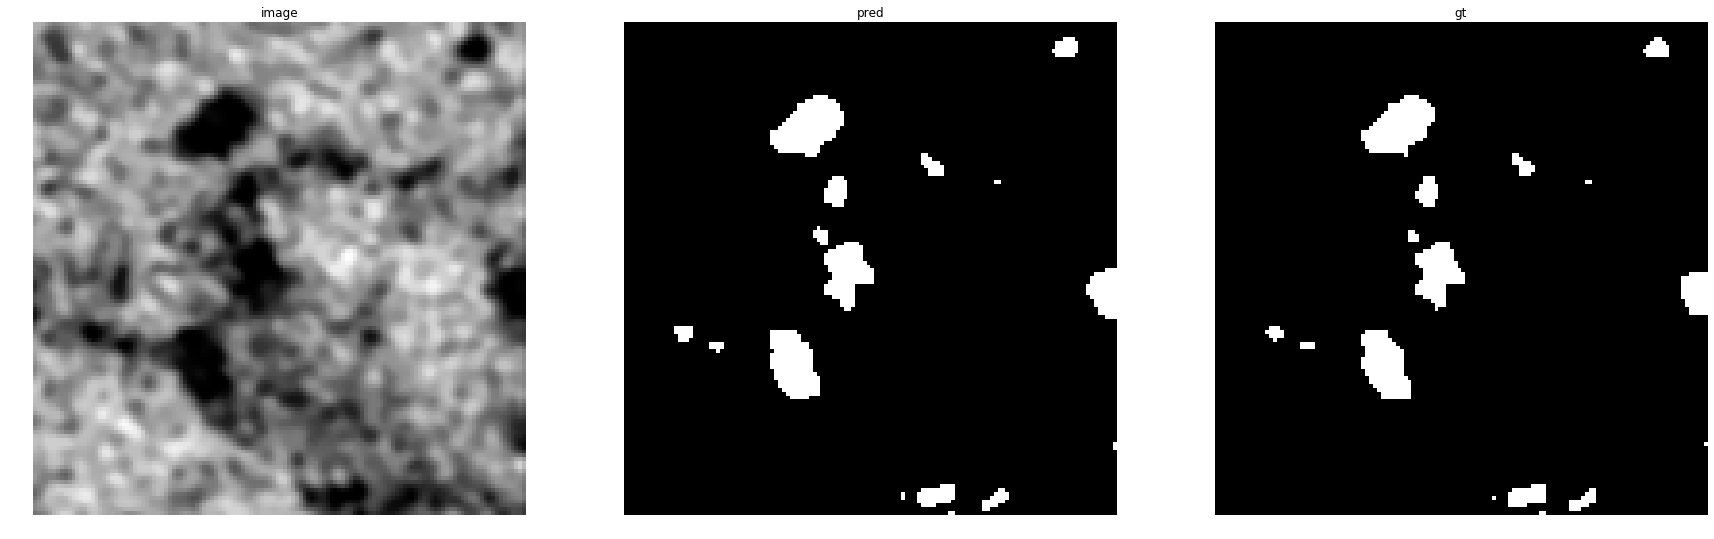

accuracy    : 0.99566650390625
precision   : 0.9244114002478315
recall      : 0.9867724867724867
f1          : 0.9545745361484325
pr_auc      : 0.9961167380164789
iou         : 0.9130966952264382


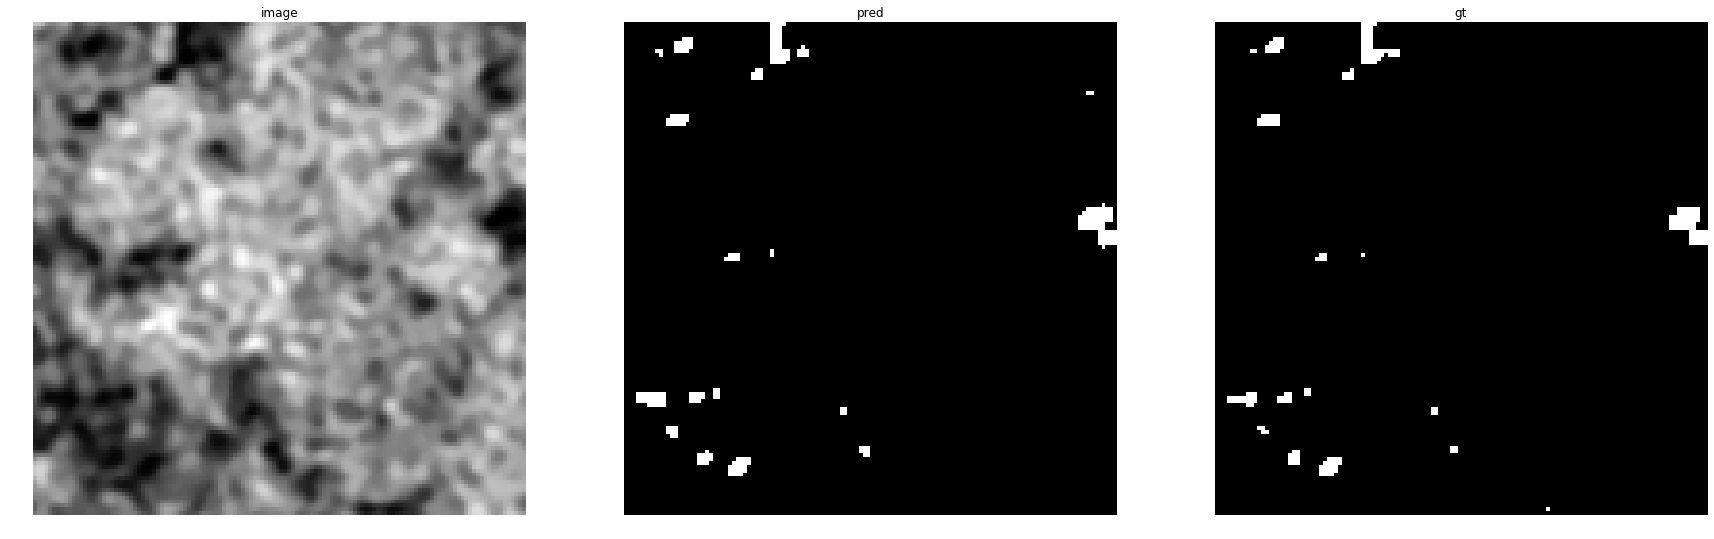

accuracy    : 0.99700927734375
precision   : 0.8534798534798534
recall      : 0.9628099173553719
f1          : 0.9048543689320389
pr_auc      : 0.9722748935611197
iou         : 0.8262411347517731


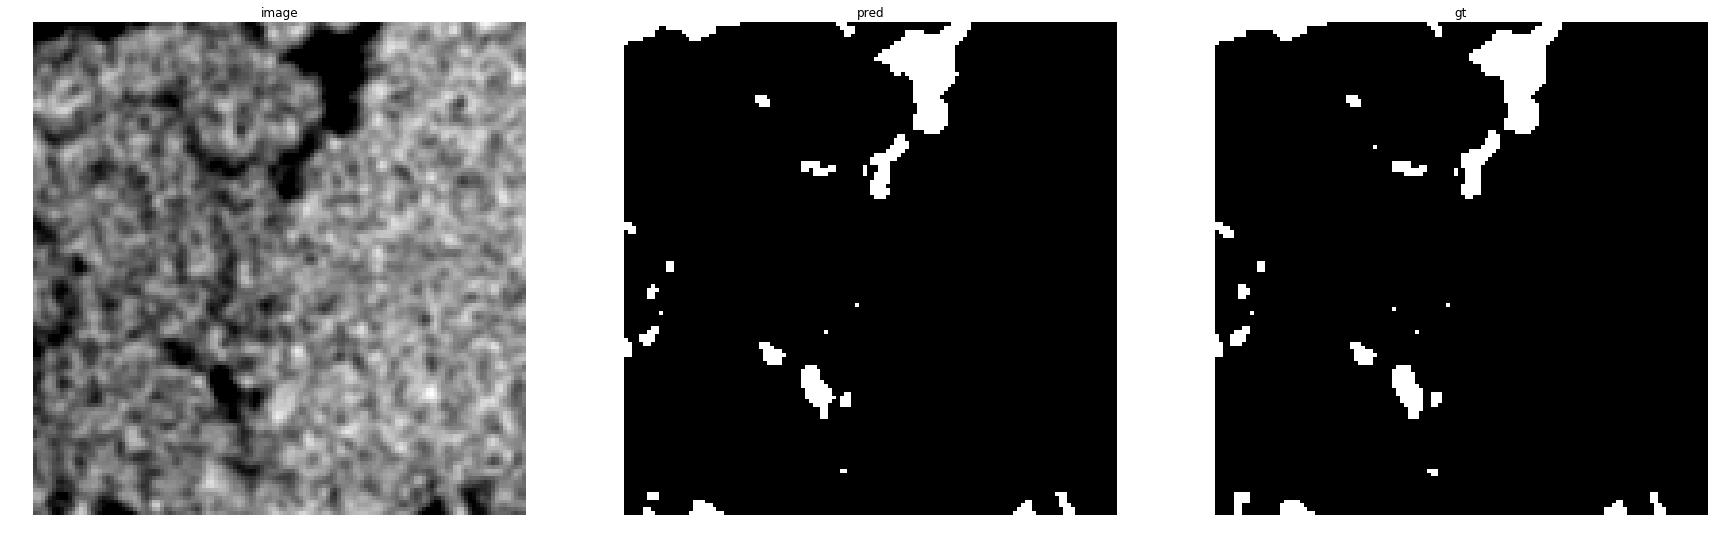

accuracy    : 0.99560546875
precision   : 0.9795918367346939
recall      : 0.9320388349514563
f1          : 0.9552238805970149
pr_auc      : 0.994333711347382
iou         : 0.9142857142857143


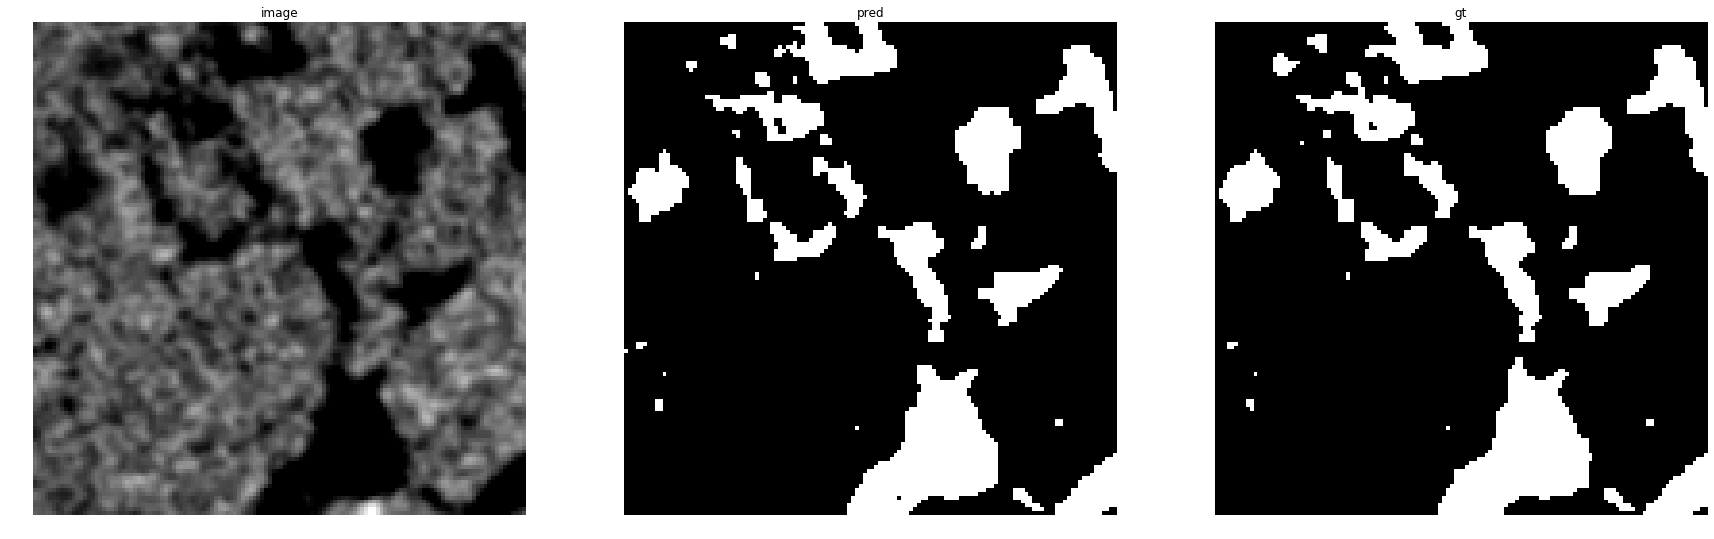

accuracy    : 0.98883056640625
precision   : 0.9931763903104742
recall      : 0.9469746258945999
f1          : 0.9695253955037468
pr_auc      : 0.9982212147863303
iou         : 0.9408532643826761


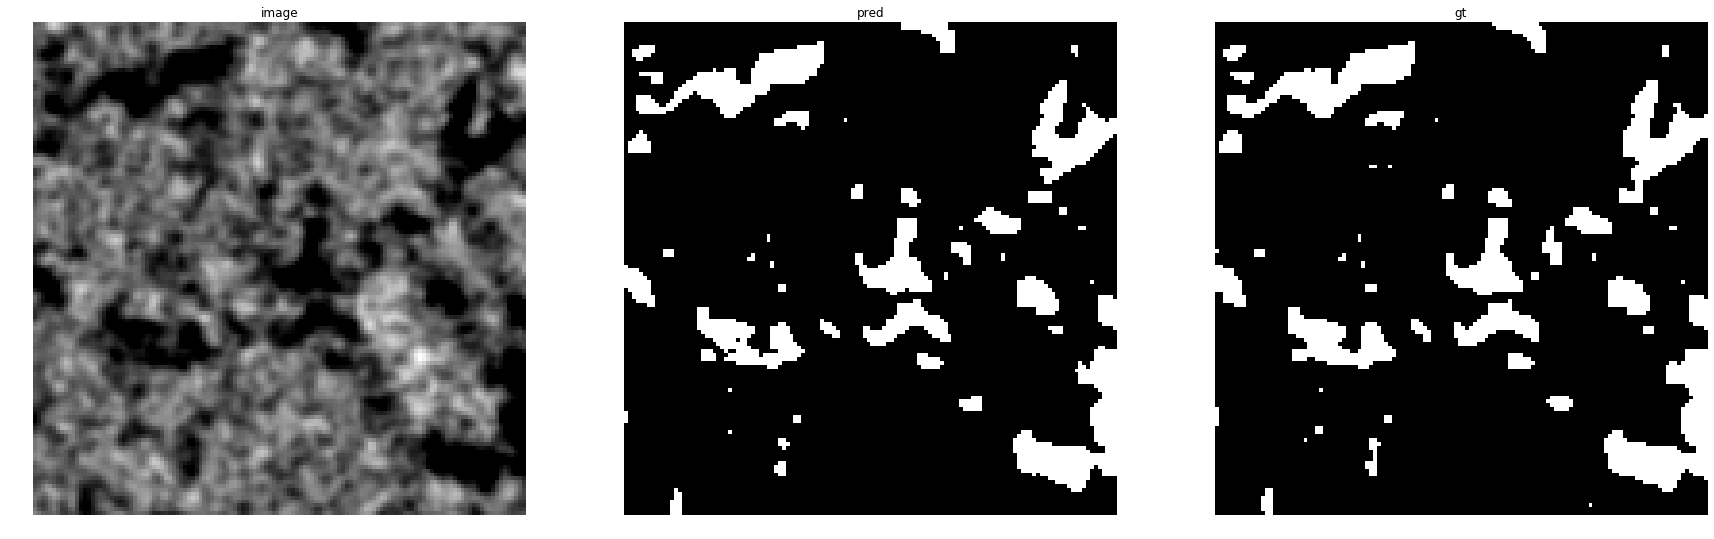

accuracy    : 0.98779296875
precision   : 0.9919811320754717
recall      : 0.9199475065616798
f1          : 0.9546073536087154
pr_auc      : 0.995988348751813
iou         : 0.9131567520625271


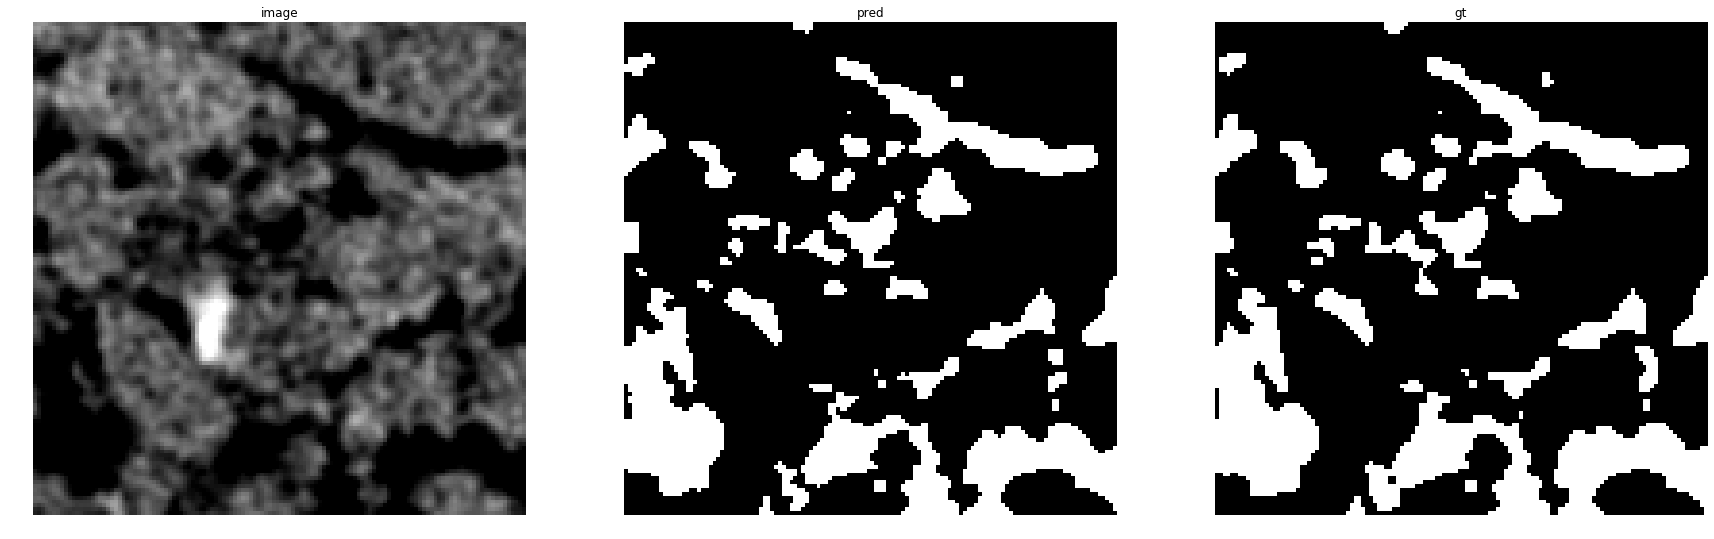

accuracy    : 0.979736328125
precision   : 0.9927243330638642
recall      : 0.9235397342692404
f1          : 0.9568831168831169
pr_auc      : 0.9965872525363199
iou         : 0.9173306772908366


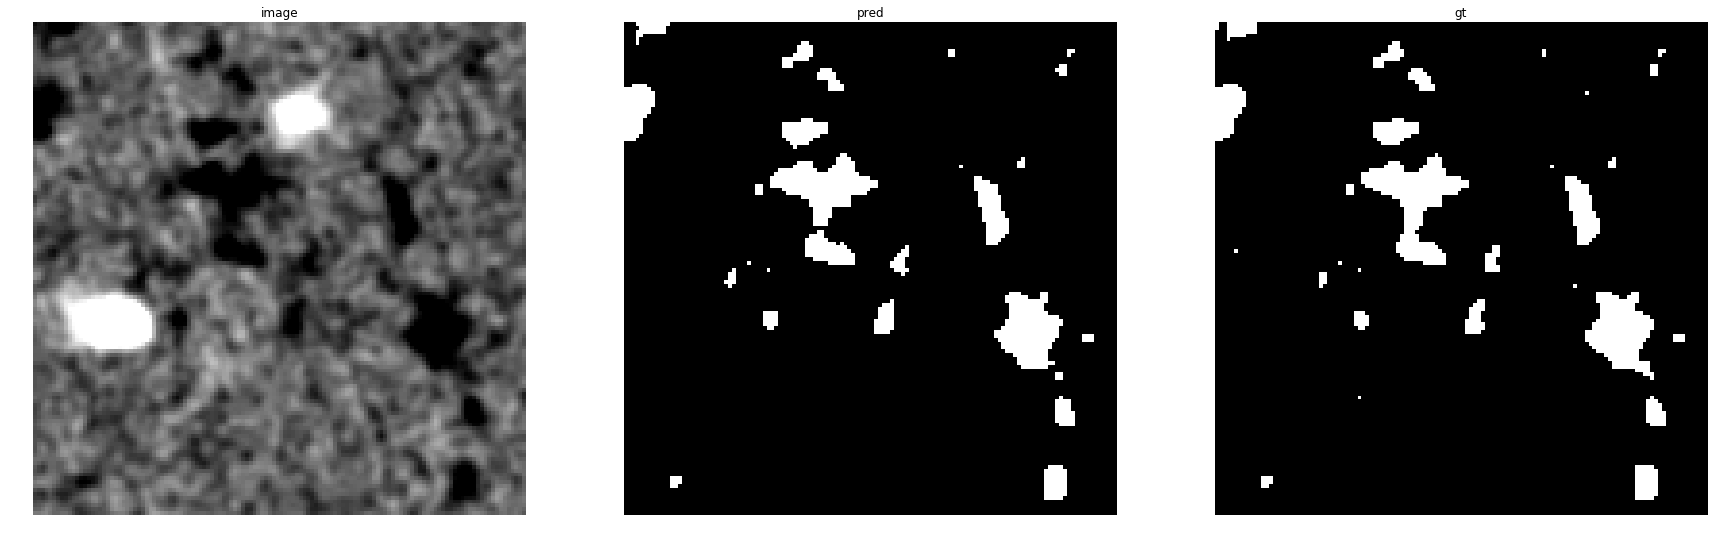

accuracy    : 0.99517822265625
precision   : 0.9716636197440585
recall      : 0.9567956795679567
f1          : 0.964172335600907
pr_auc      : 0.9963237770213109
iou         : 0.9308231173380035


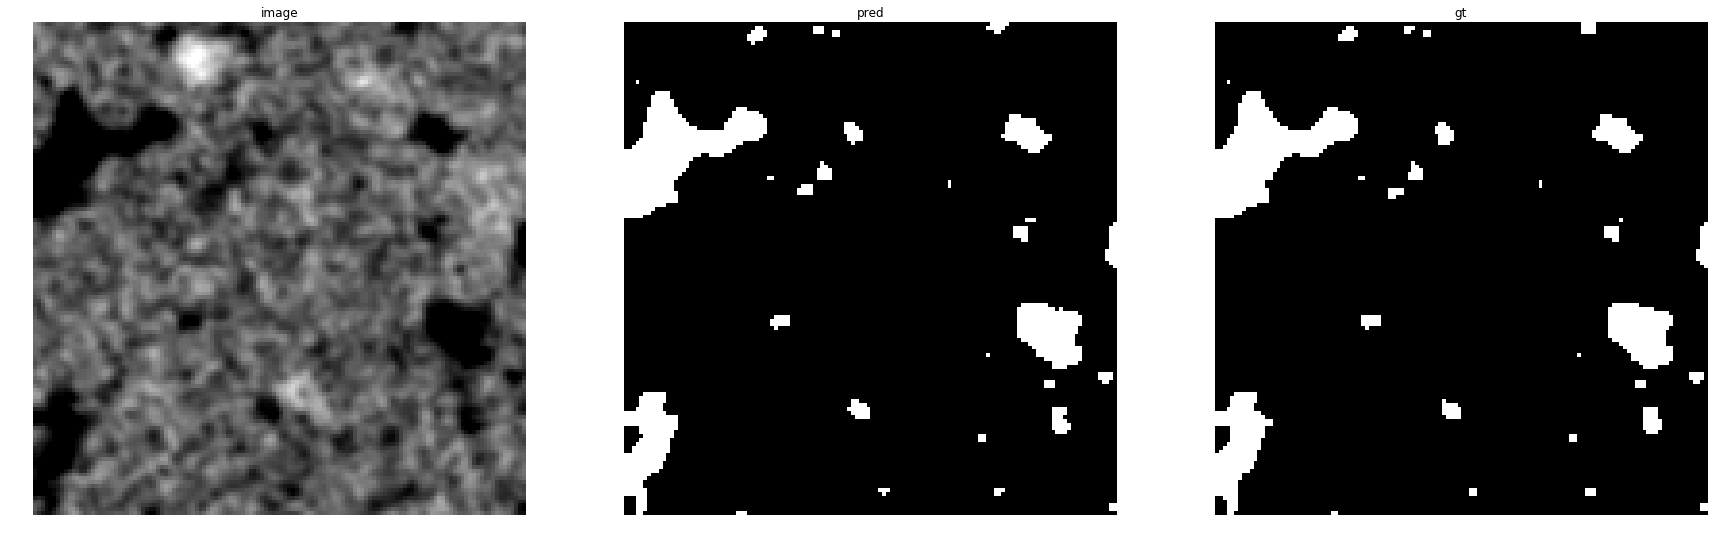

accuracy    : 0.9967041015625
precision   : 0.9833333333333333
recall      : 0.9759398496240601
f1          : 0.9796226415094339
pr_auc      : 0.998357168415112
iou         : 0.9600591715976331


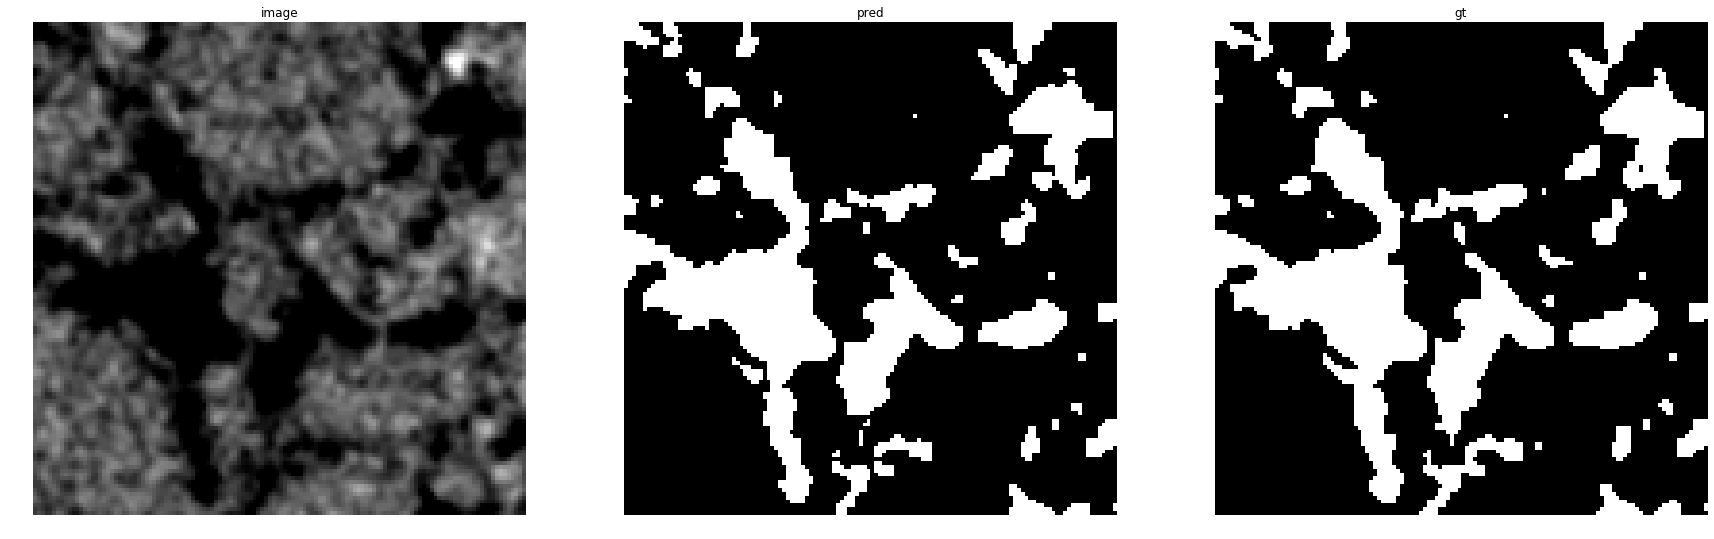

accuracy    : 0.97869873046875
precision   : 0.99414737962224
recall      : 0.9195374015748031
f1          : 0.9553879585836635
pr_auc      : 0.9963390468283784
iou         : 0.9145863925599609


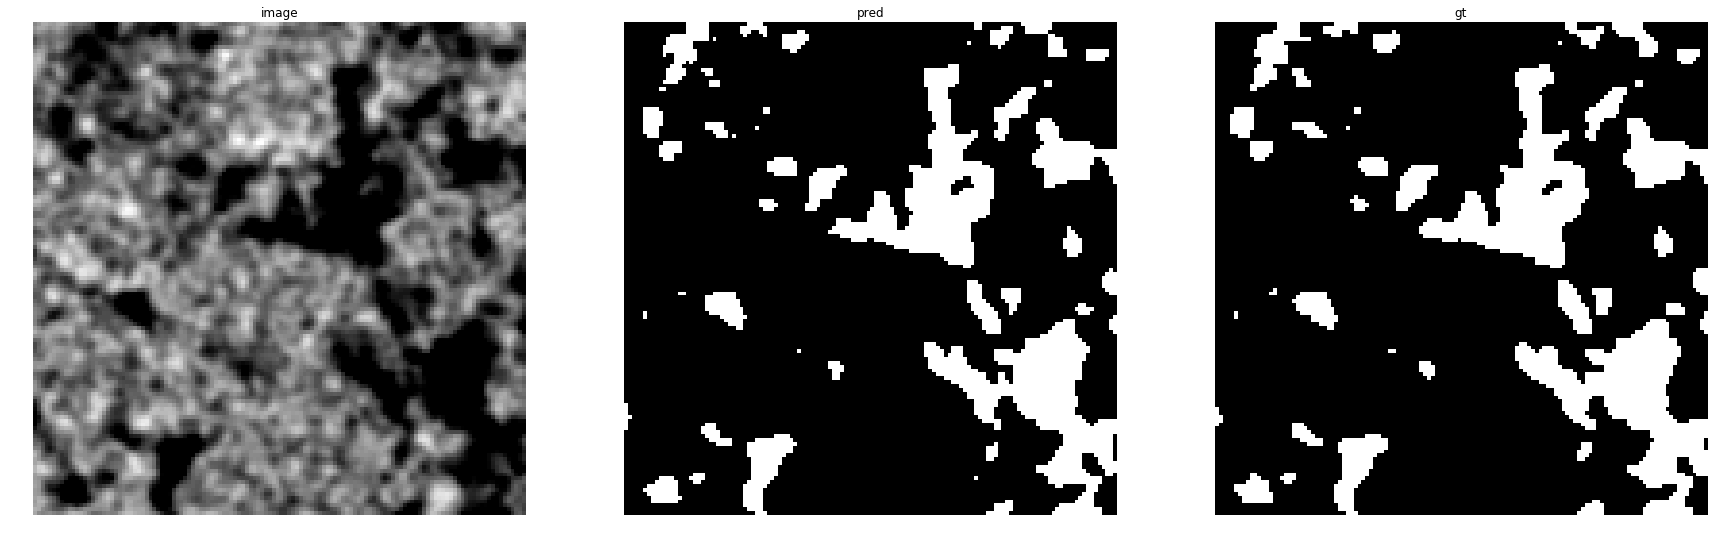

accuracy    : 0.982421875
precision   : 0.9891304347826086
recall      : 0.9191919191919192
f1          : 0.9528795811518325
pr_auc      : 0.996123173928812
iou         : 0.91


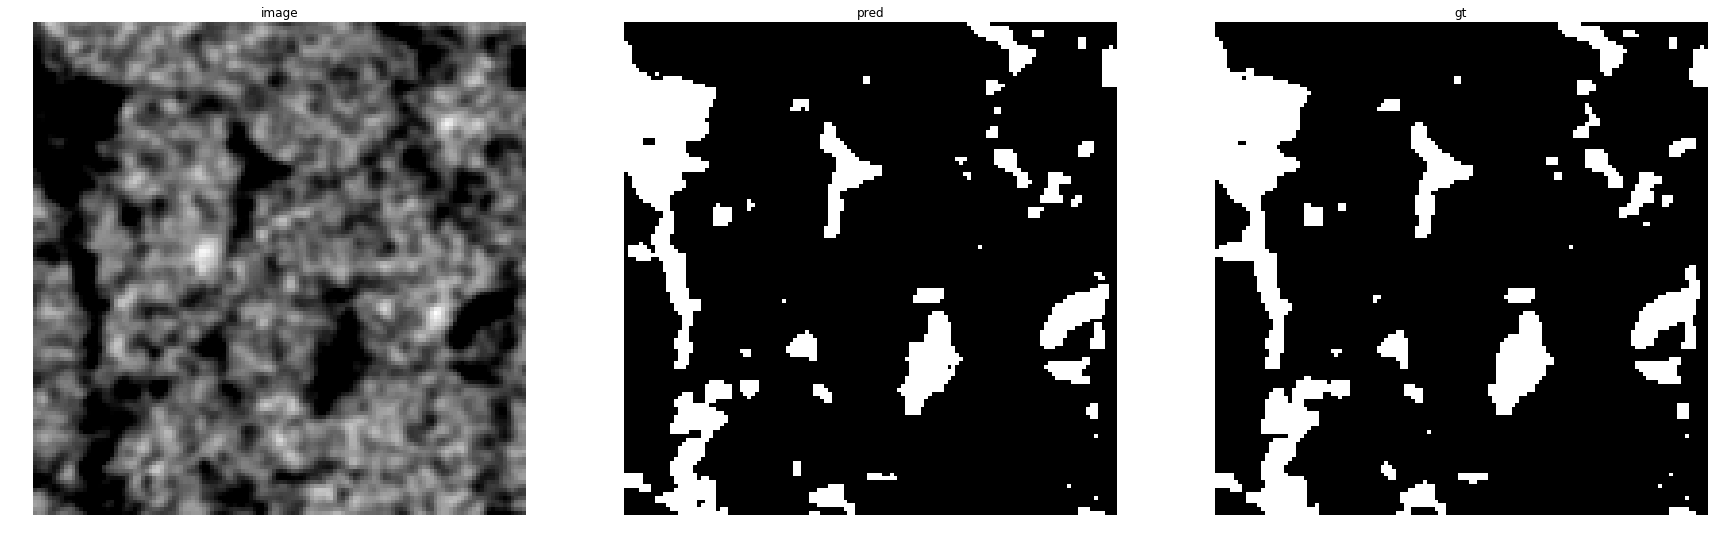

accuracy    : 0.98321533203125
precision   : 0.9958211450062683
recall      : 0.8999244712990937
f1          : 0.9454473318785955
pr_auc      : 0.9959576103916353
iou         : 0.8965387509405568


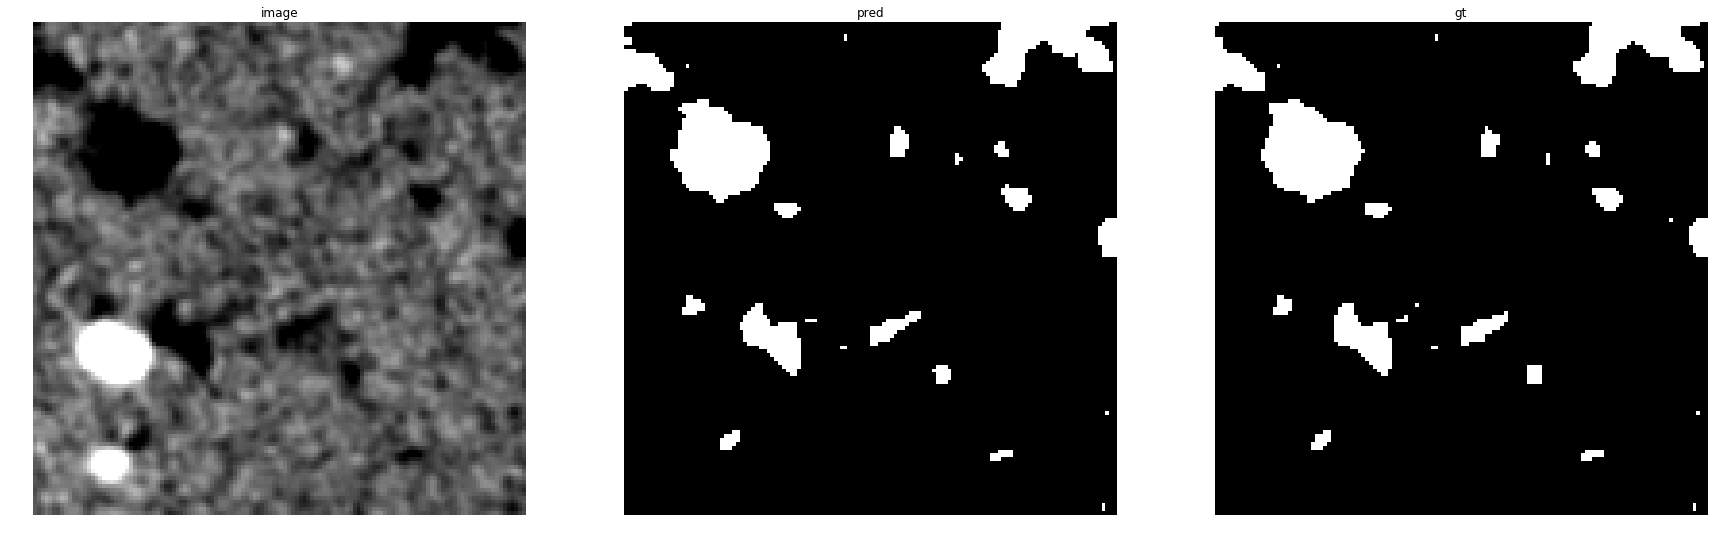

accuracy    : 0.995849609375
precision   : 0.981301421091997
recall      : 0.9682656826568266
f1          : 0.9747399702823181
pr_auc      : 0.9980062075459675
iou         : 0.9507246376811594


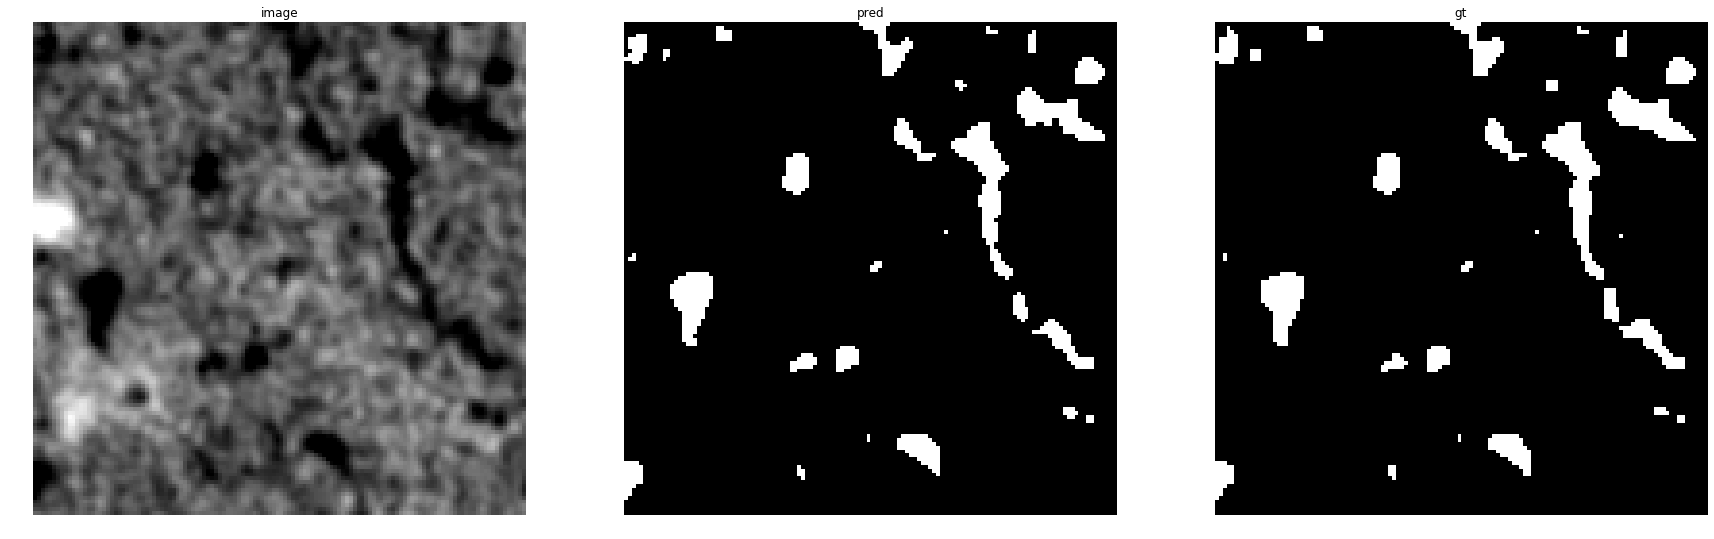

accuracy    : 0.9932861328125
precision   : 0.9813606710158435
recall      : 0.9212598425196851
f1          : 0.950361010830325
pr_auc      : 0.993280603782548
iou         : 0.9054170249355116


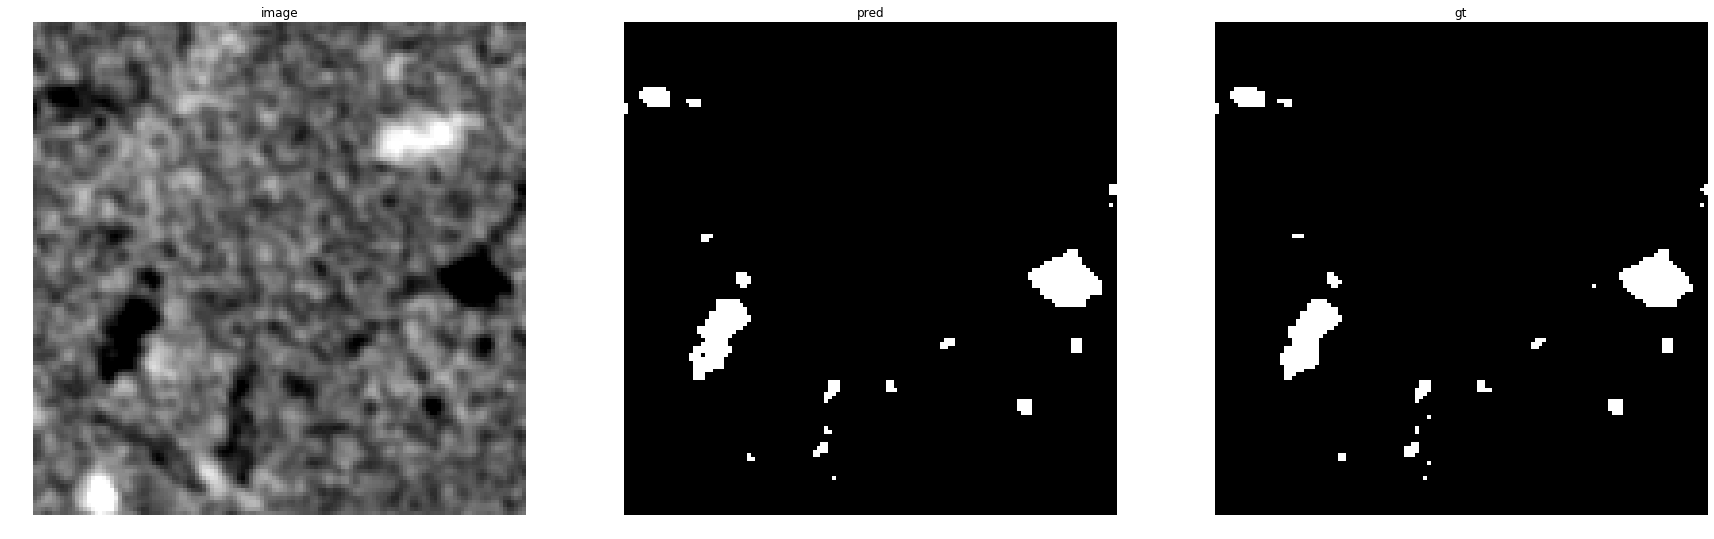

accuracy    : 0.99761962890625
precision   : 0.9602385685884692
recall      : 0.9621513944223108
f1          : 0.9611940298507464
pr_auc      : 0.9950167102667983
iou         : 0.9252873563218391


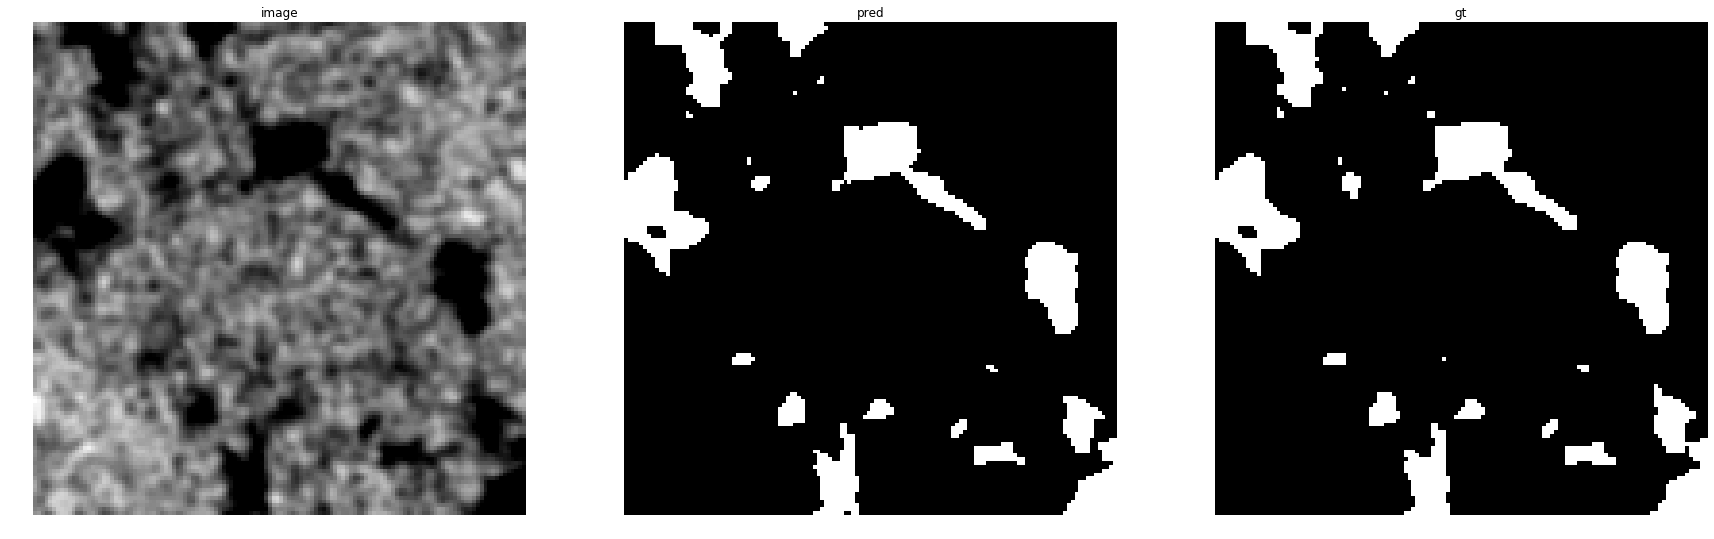

accuracy    : 0.9930419921875
precision   : 0.9973600844772967
recall      : 0.9454454454454454
f1          : 0.9707091469681398
pr_auc      : 0.9986587039655542
iou         : 0.9430853719420869


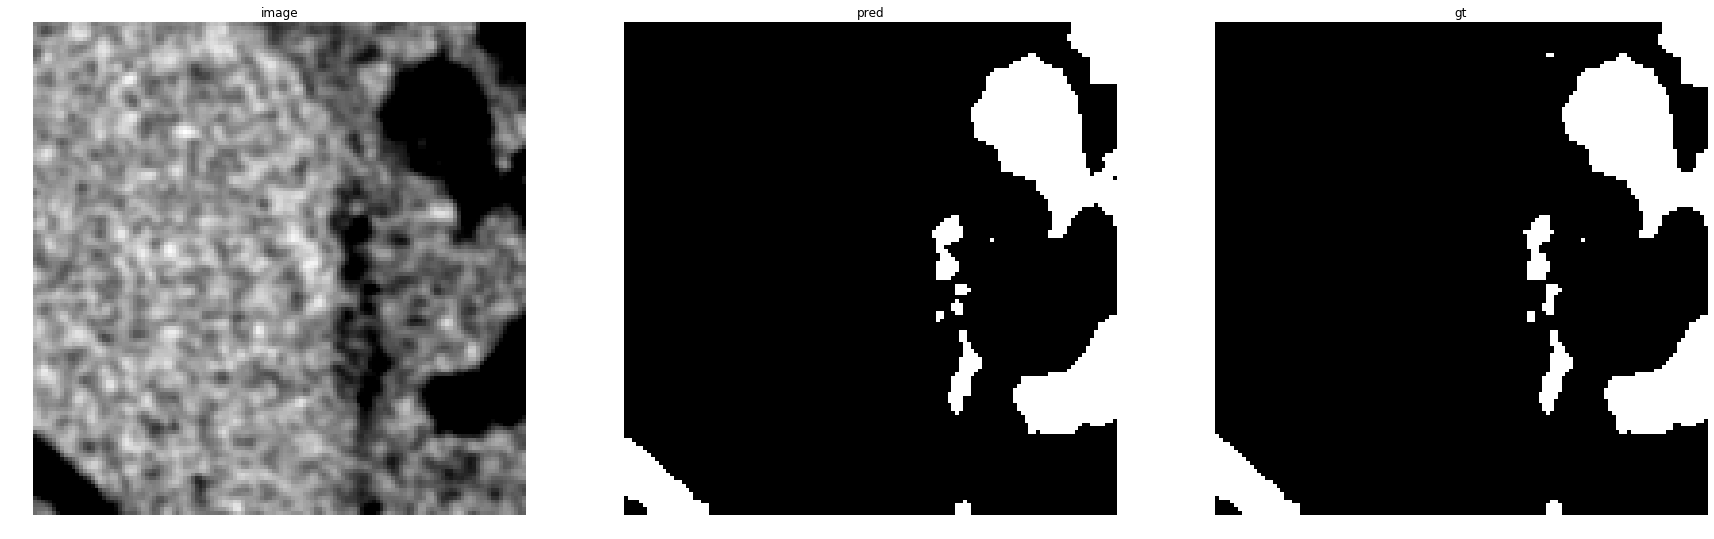

accuracy    : 0.996826171875
precision   : 0.9930727362691737
recall      : 0.9814180929095354
f1          : 0.9872110181997049
pr_auc      : 0.9994907643569044
iou         : 0.9747450218552696


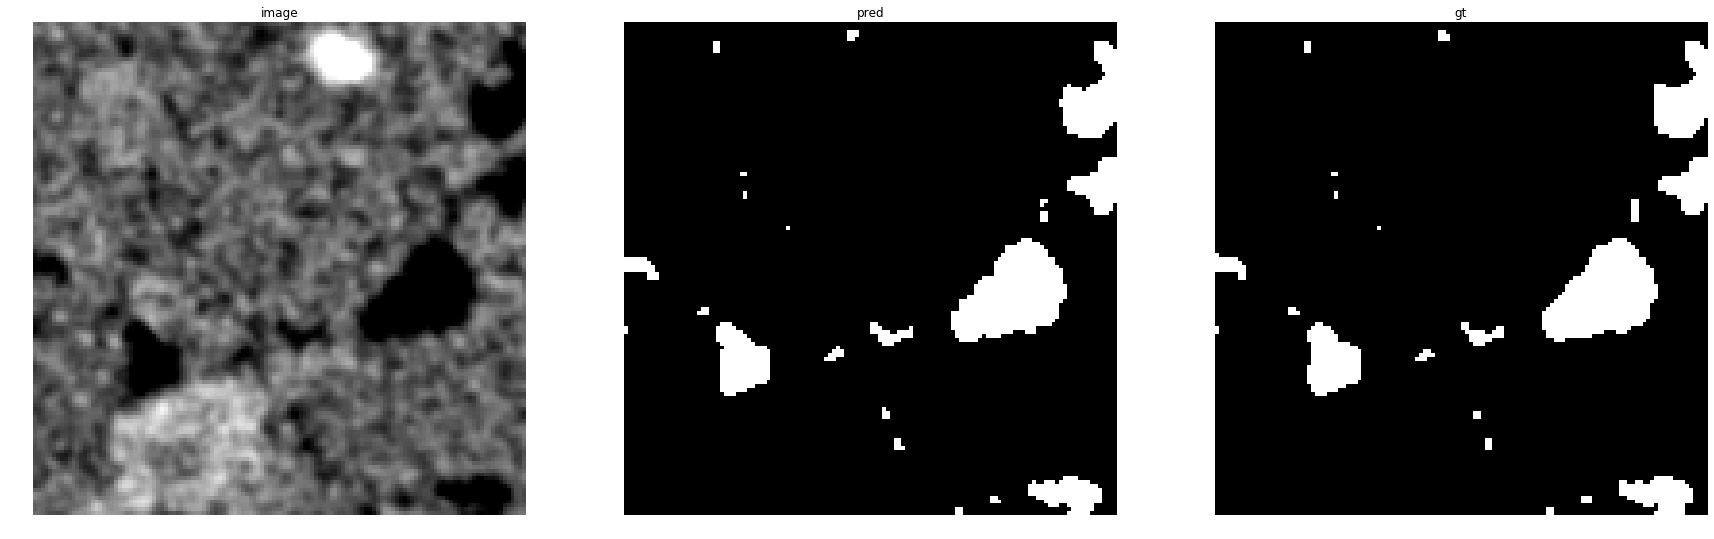

accuracy    : 0.99639892578125
precision   : 0.9823619631901841
recall      : 0.9726651480637813
f1          : 0.9774895078214422
pr_auc      : 0.9984620026475978
iou         : 0.9559701492537314


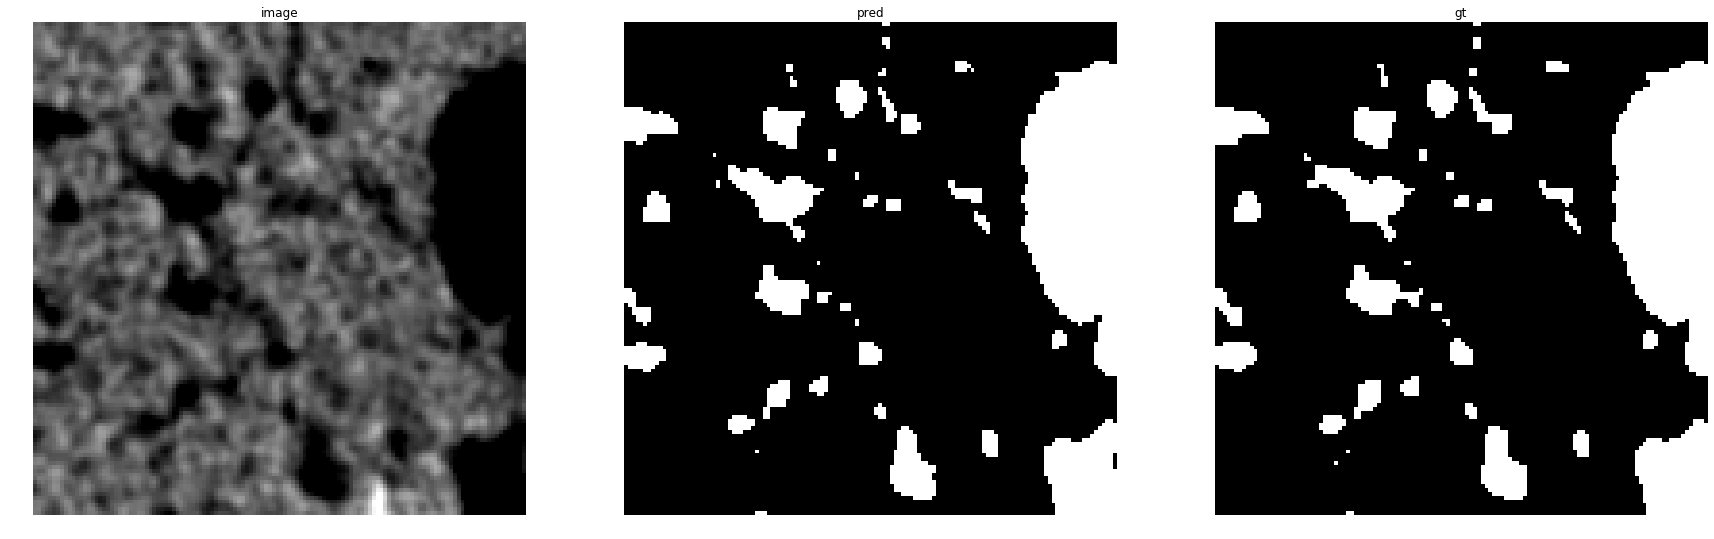

accuracy    : 0.99102783203125
precision   : 0.9950867998689813
recall      : 0.9583596214511041
f1          : 0.9763779527559054
pr_auc      : 0.9985241158750832
iou         : 0.9538461538461539


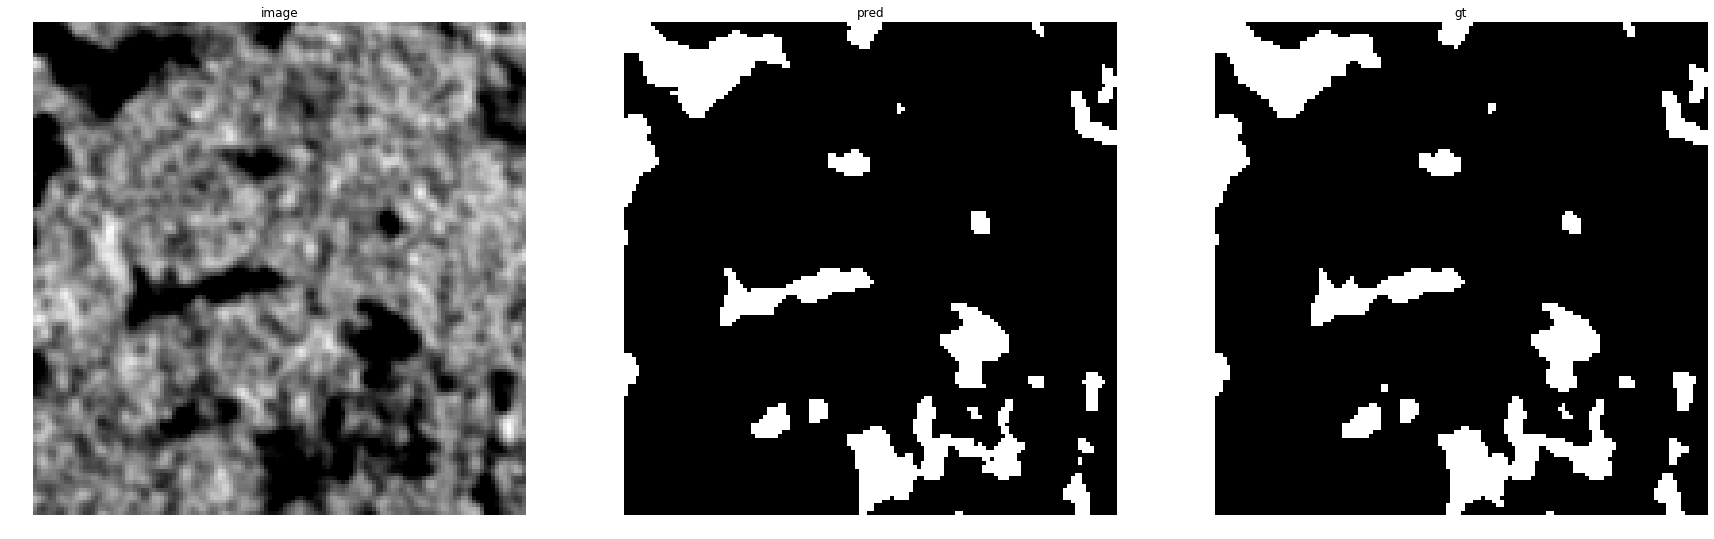

accuracy    : 0.98992919921875
precision   : 0.9911007025761124
recall      : 0.9354553492484527
f1          : 0.9624744143734364
pr_auc      : 0.996909742892132
iou         : 0.9276633055677335


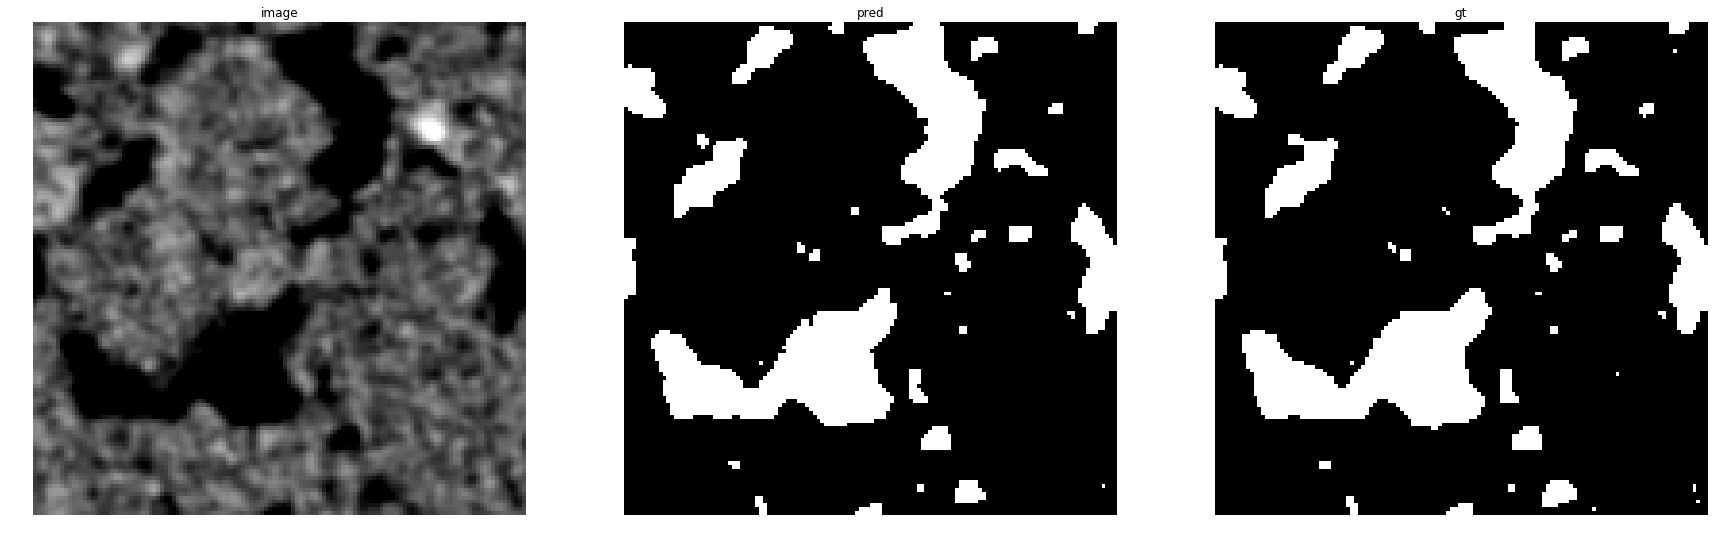

accuracy    : 0.991943359375
precision   : 0.9944858903665261
recall      : 0.9638478465891229
f1          : 0.9789272030651341
pr_auc      : 0.9989233242221219
iou         : 0.9587242026266416


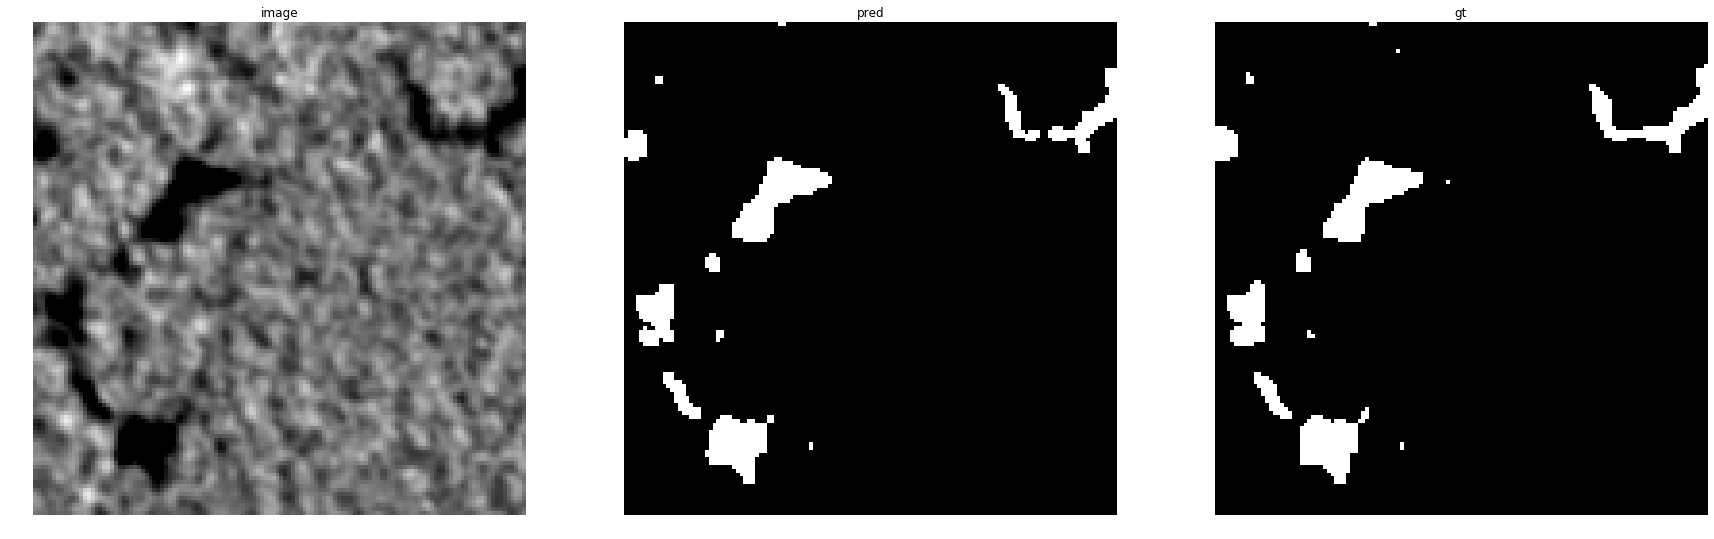

accuracy    : 0.9954833984375
precision   : 0.9870435806831567
recall      : 0.93007769145394
f1          : 0.9577142857142857
pr_auc      : 0.9958758466086988
iou         : 0.918859649122807


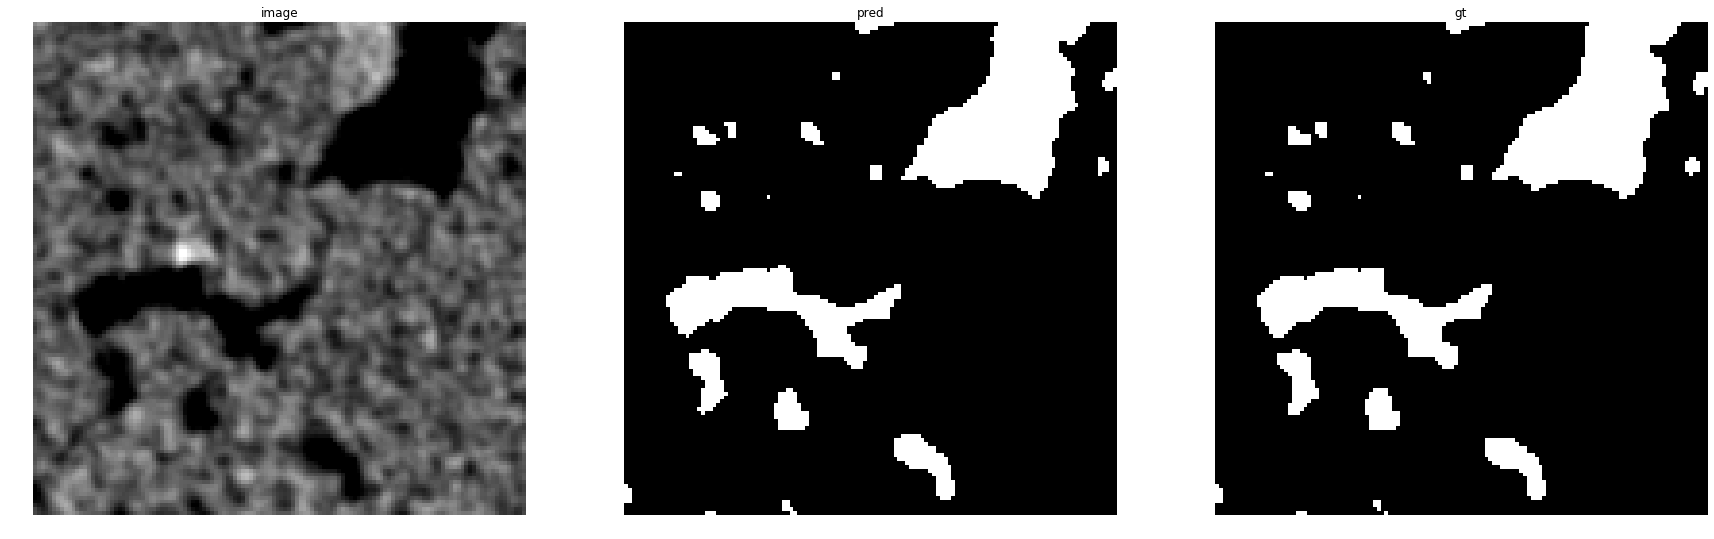

accuracy    : 0.9942626953125
precision   : 0.9890734265734266
recall      : 0.9704116638078902
f1          : 0.9796536796536797
pr_auc      : 0.9991262030827129
iou         : 0.9601187950784896


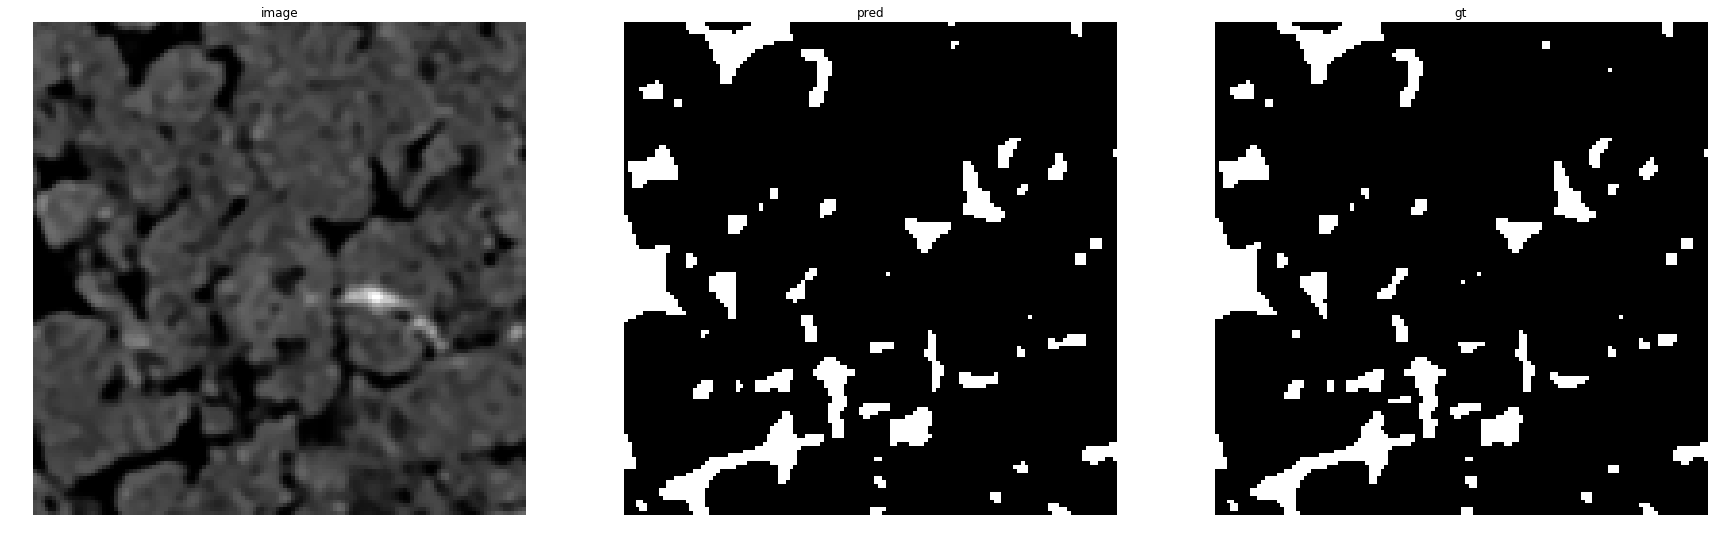

accuracy    : 0.9930419921875
precision   : 0.9524617996604414
recall      : 0.9824868651488616
f1          : 0.9672413793103447
pr_auc      : 0.9968578669207836
iou         : 0.9365609348914858


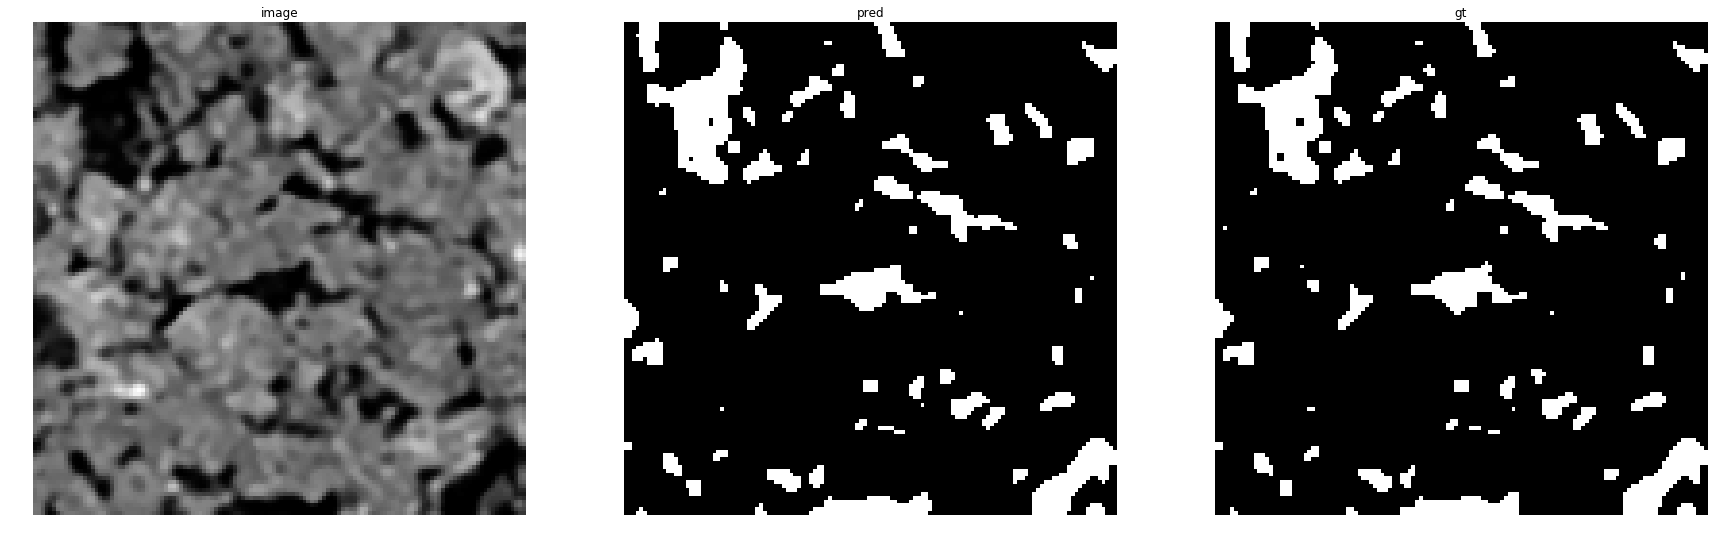

accuracy    : 0.9921875
precision   : 0.9531327084361125
recall      : 0.983206106870229
f1          : 0.9679358717434869
pr_auc      : 0.9965408262444864
iou         : 0.9378640776699029


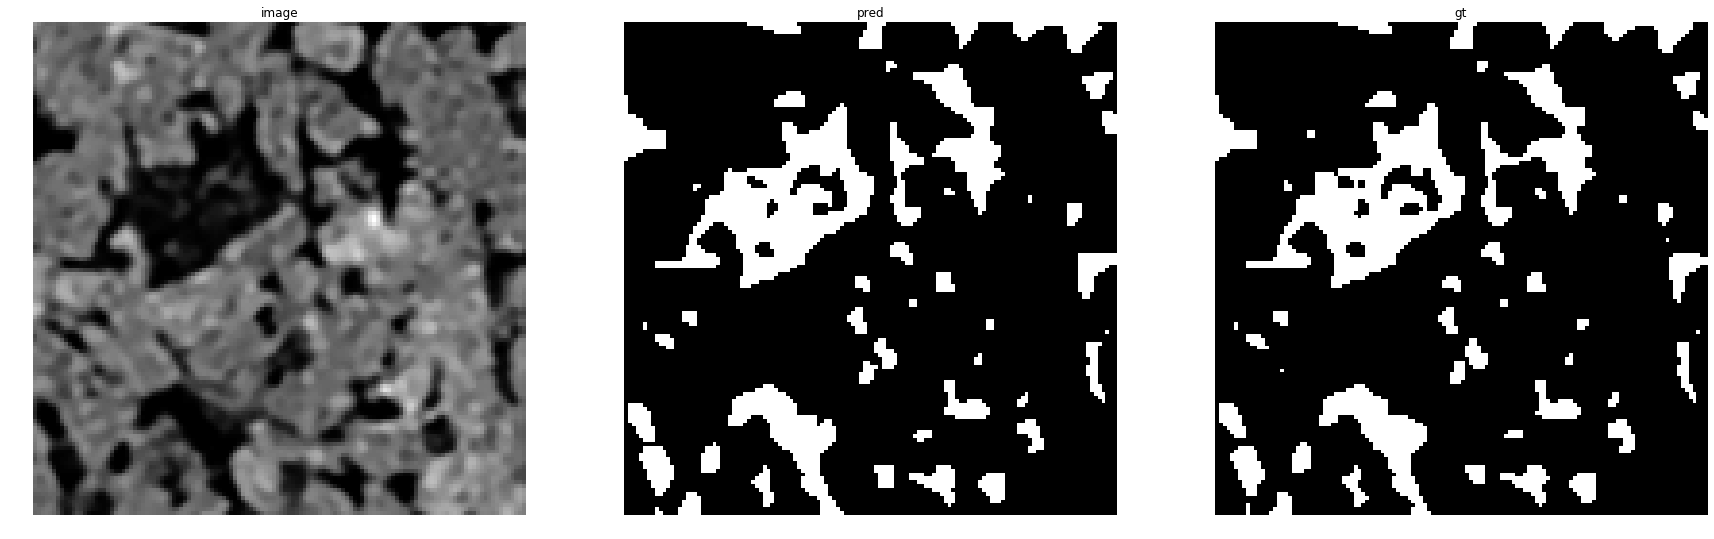

accuracy    : 0.98895263671875
precision   : 0.9592806243637597
recall      : 0.9788781163434903
f1          : 0.9689802913453299
pr_auc      : 0.9972175117667025
iou         : 0.9398271276595744


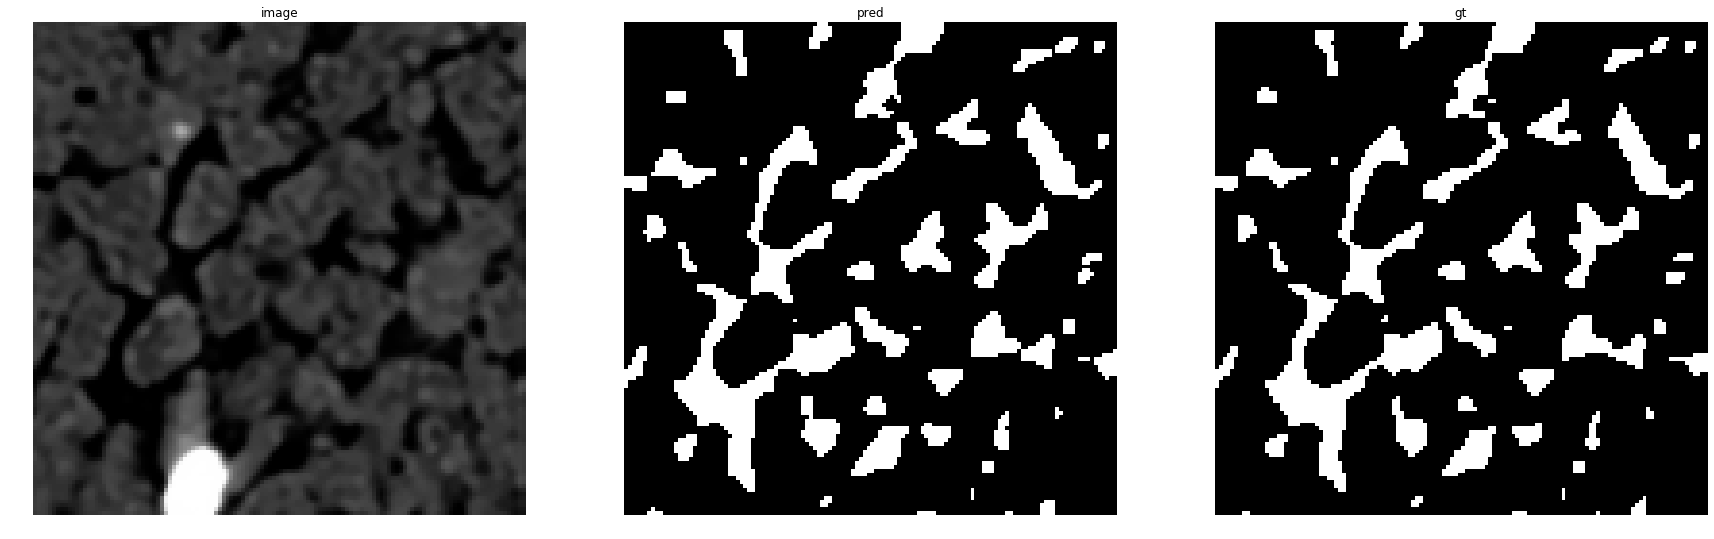

accuracy    : 0.9864501953125
precision   : 0.9345859429366736
recall      : 0.9875
f1          : 0.9603146228101538
pr_auc      : 0.9970022722276041
iou         : 0.9236588720770289


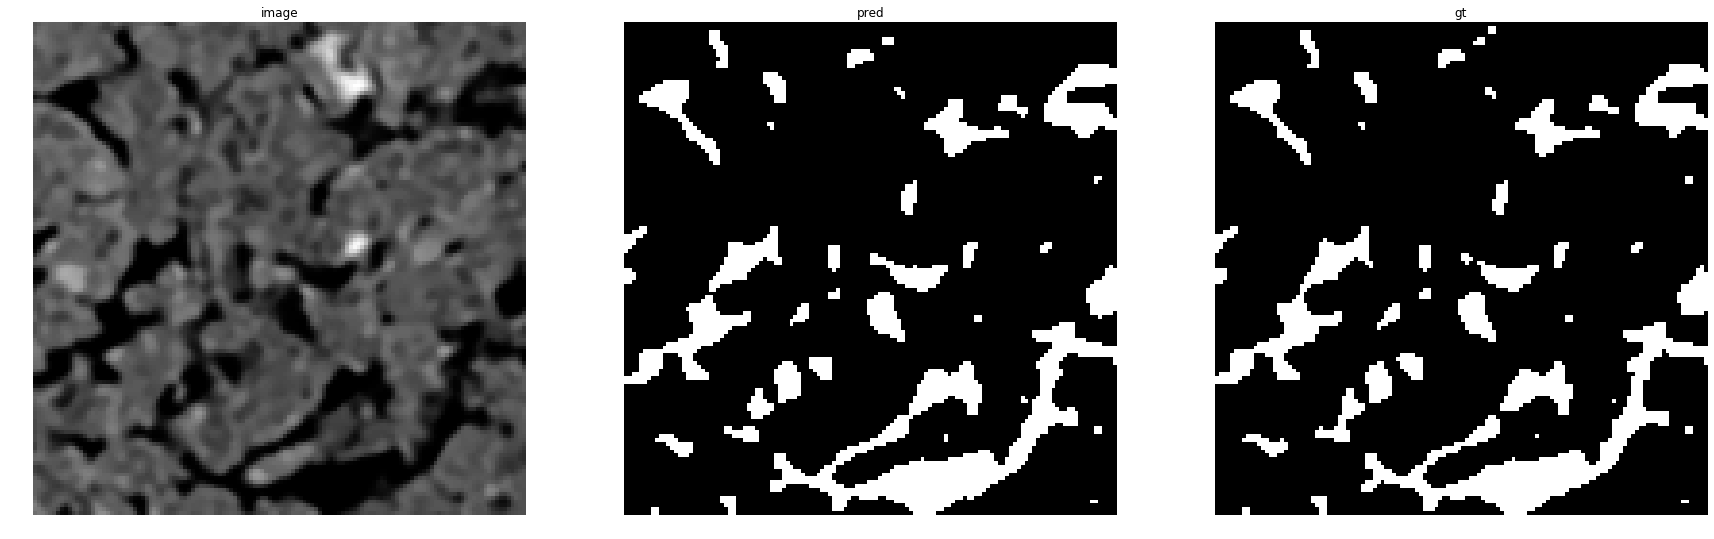

accuracy    : 0.989990234375
precision   : 0.9529914529914529
recall      : 0.9827724358974359
f1          : 0.9676528599605523
pr_auc      : 0.9970063632071773
iou         : 0.9373328238440963


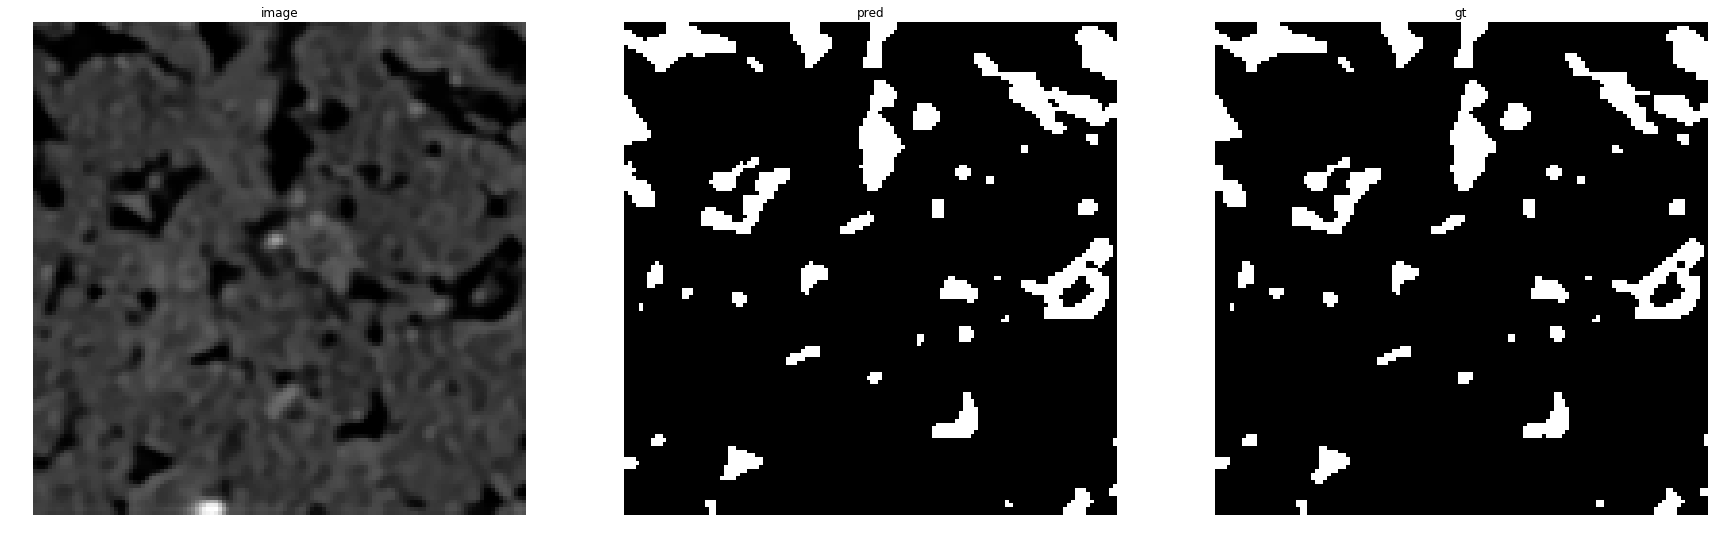

accuracy    : 0.99127197265625
precision   : 0.9396642182581322
recall      : 0.9846069268829027
f1          : 0.9616107382550336
pr_auc      : 0.9964209540651818
iou         : 0.9260599793174767


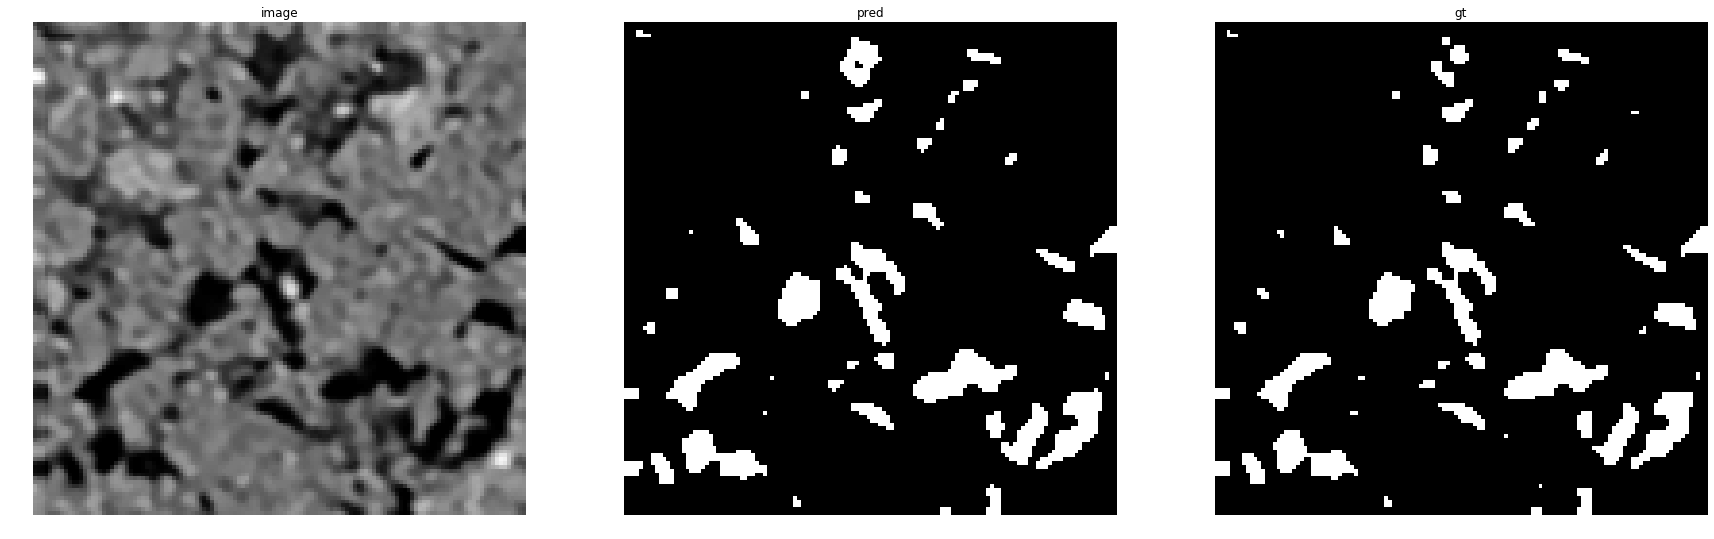

accuracy    : 0.990234375
precision   : 0.9169308814204186
recall      : 0.9803389830508474
f1          : 0.9475753604193972
pr_auc      : 0.9944760469598893
iou         : 0.900373599003736


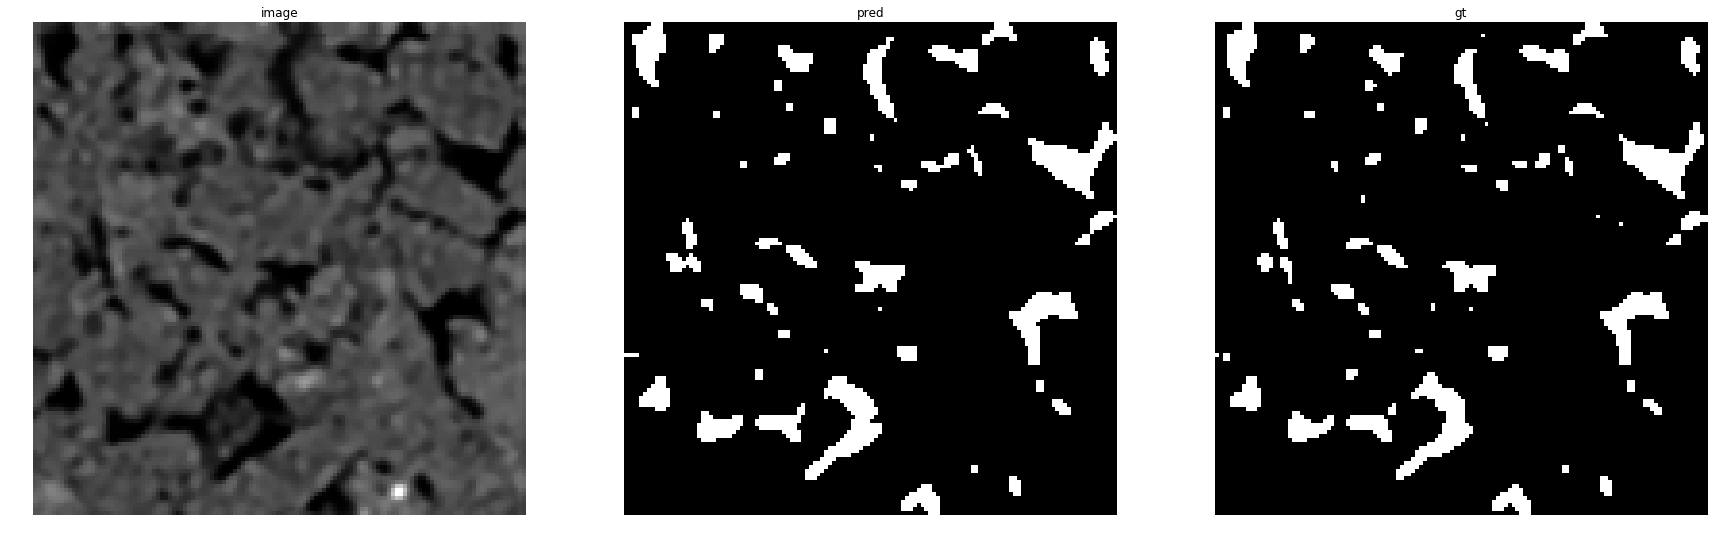

accuracy    : 0.99029541015625
precision   : 0.9259986902423052
recall      : 0.9684931506849315
f1          : 0.9467693337797121
pr_auc      : 0.9928698156623477
iou         : 0.8989192625556262


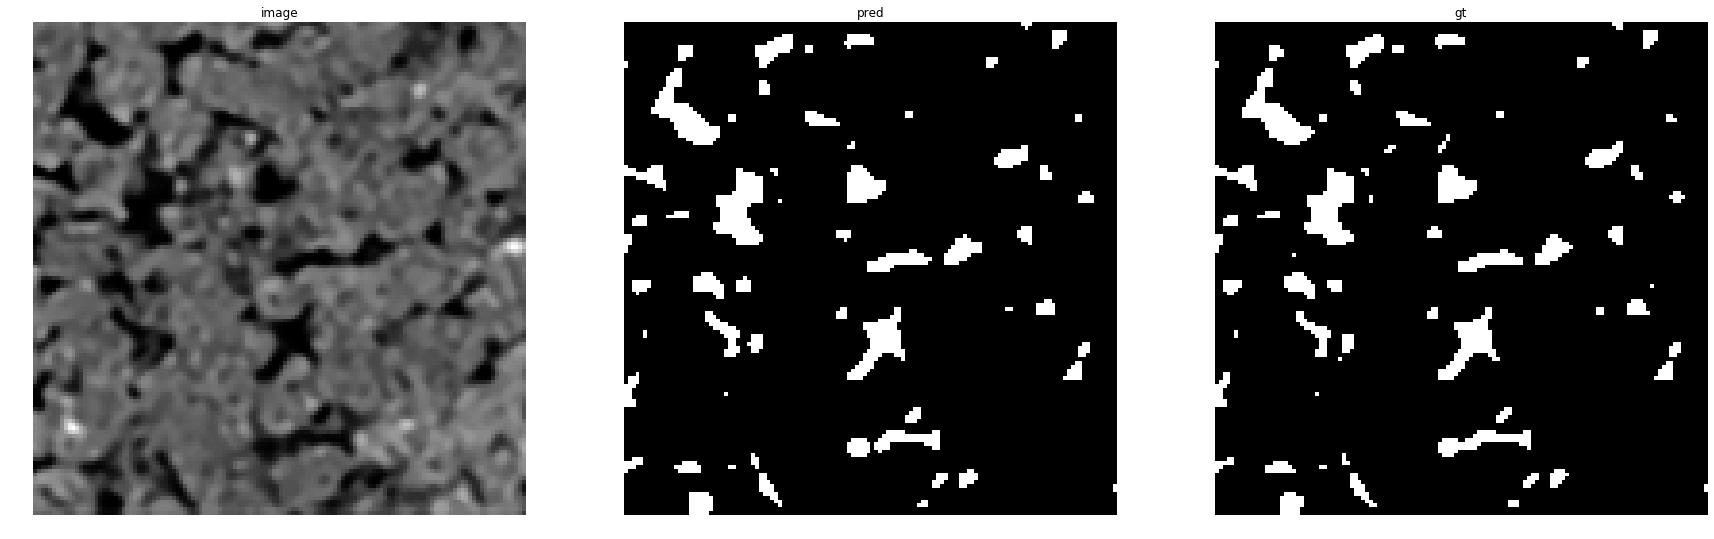

accuracy    : 0.99395751953125
precision   : 0.9596110695587136
recall      : 0.9661144578313253
f1          : 0.9628517823639775
pr_auc      : 0.9949684435398972
iou         : 0.9283646888567294


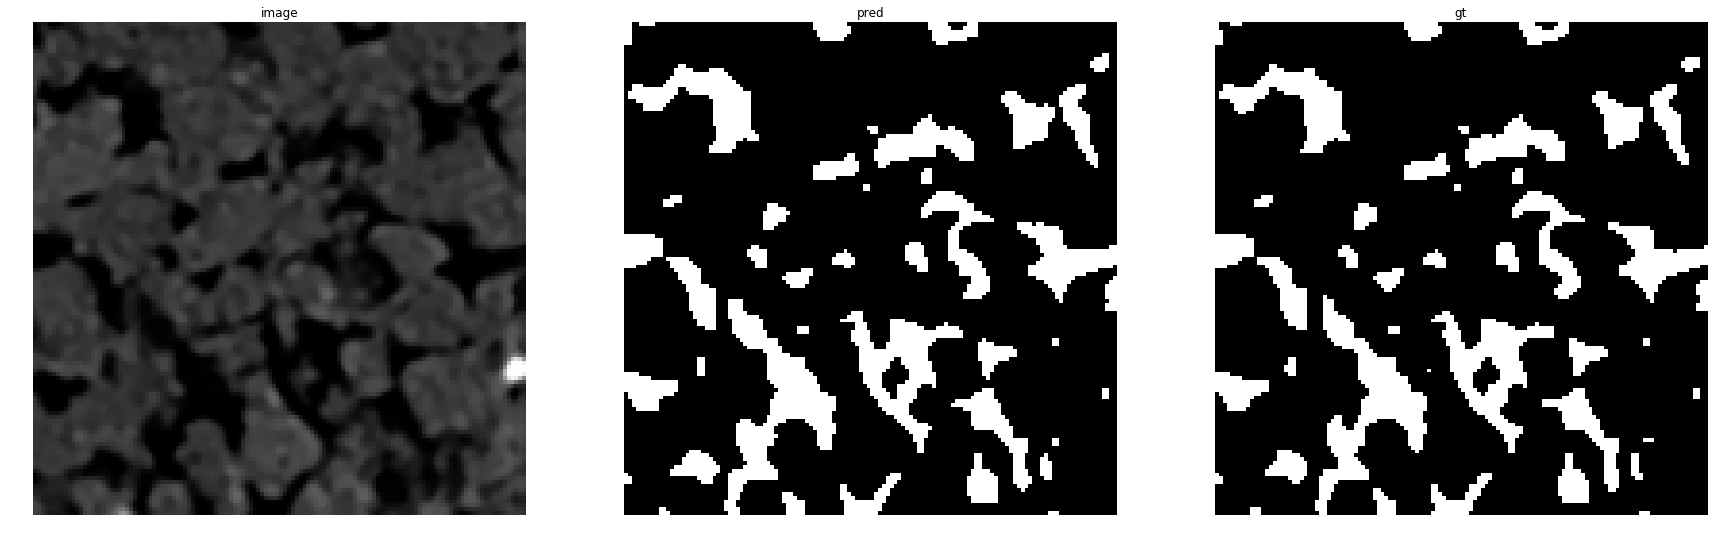

accuracy    : 0.98931884765625
precision   : 0.959095134800124
recall      : 0.9862970044614404
f1          : 0.9725058915946583
pr_auc      : 0.9978107859572514
iou         : 0.9464831804281345


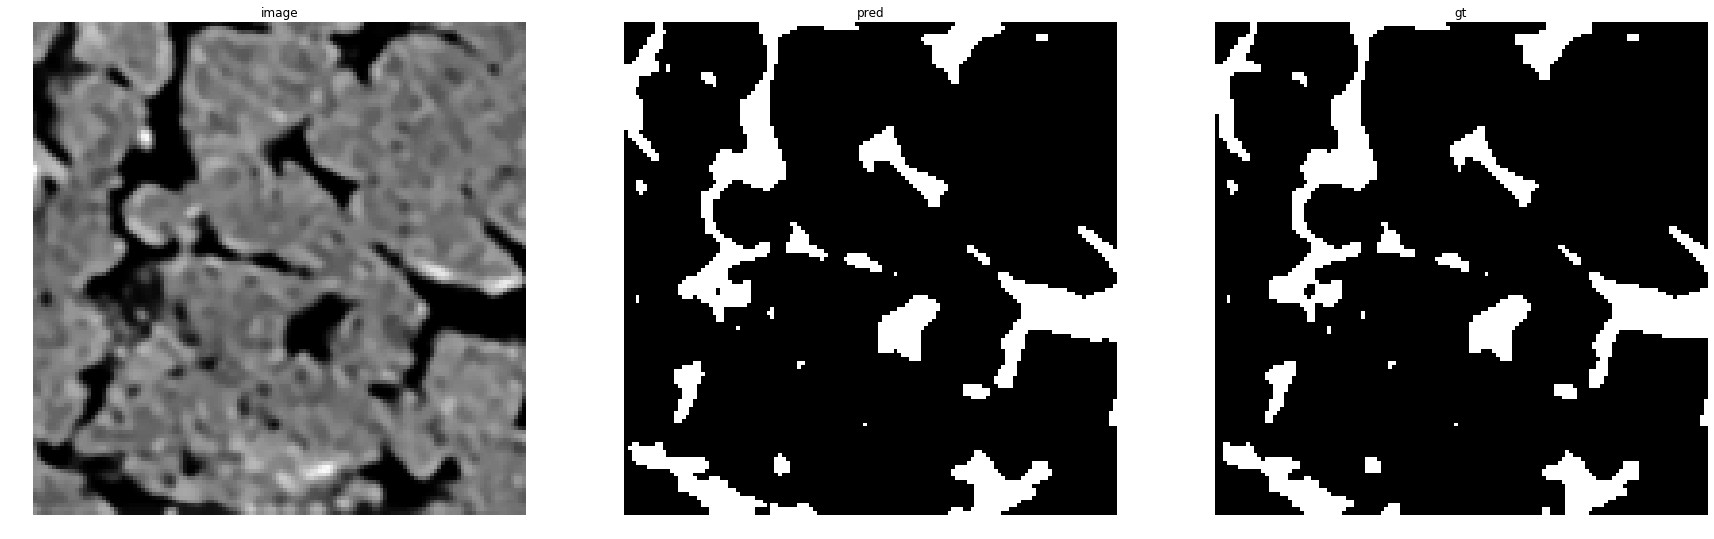

accuracy    : 0.9886474609375
precision   : 0.9410569105691057
recall      : 0.982597623089983
f1          : 0.9613787375415281
pr_auc      : 0.995893458029271
iou         : 0.9256297481007597


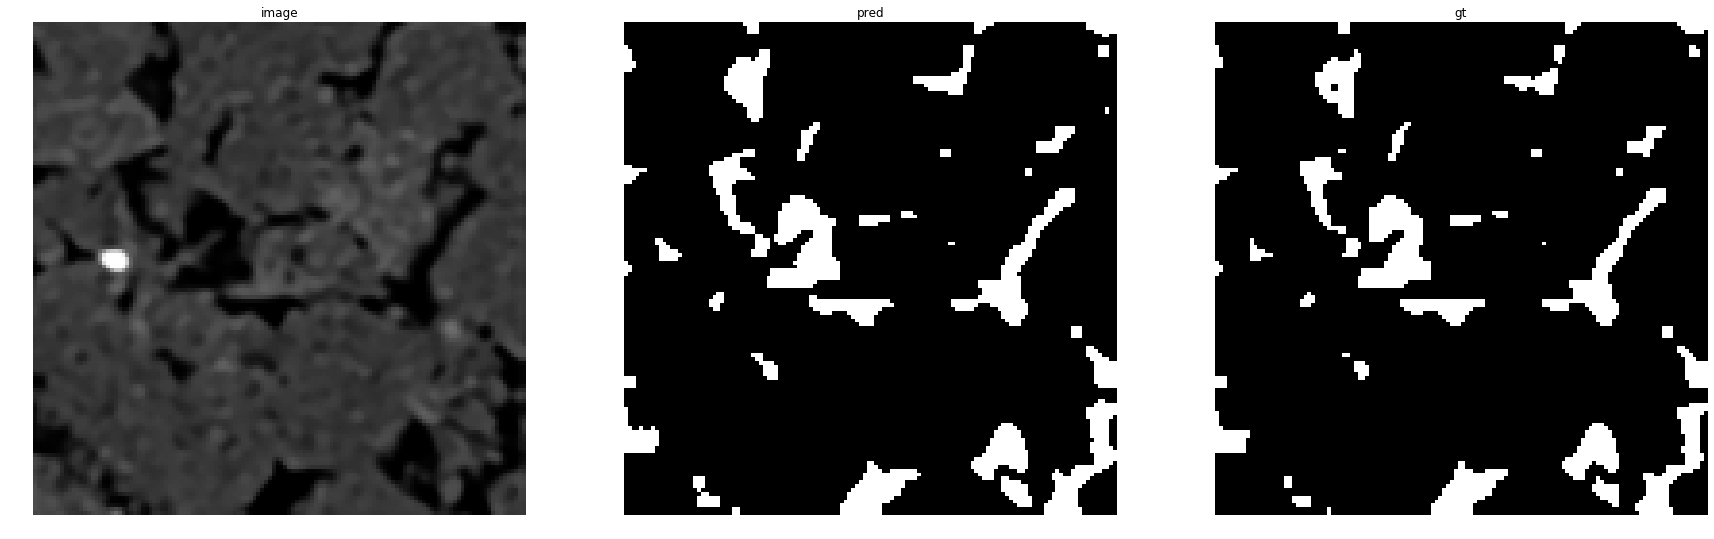

accuracy    : 0.98846435546875
precision   : 0.9068550497121926
recall      : 0.9936926605504587
f1          : 0.9482900136798905
pr_auc      : 0.9963199673239714
iou         : 0.9016649323621228


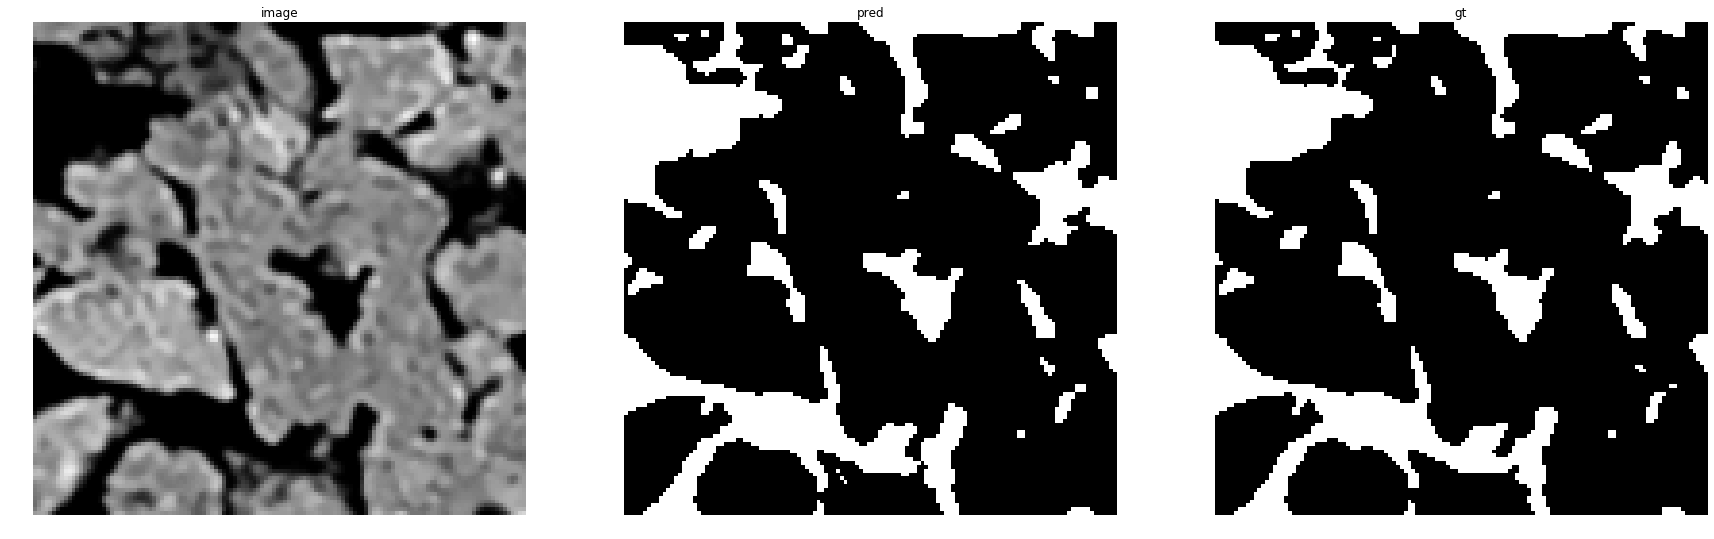

accuracy    : 0.98675537109375
precision   : 0.9514255543822597
recall      : 0.9909265878471267
f1          : 0.9707744107744107
pr_auc      : 0.9981979889813783
iou         : 0.9432085841402774


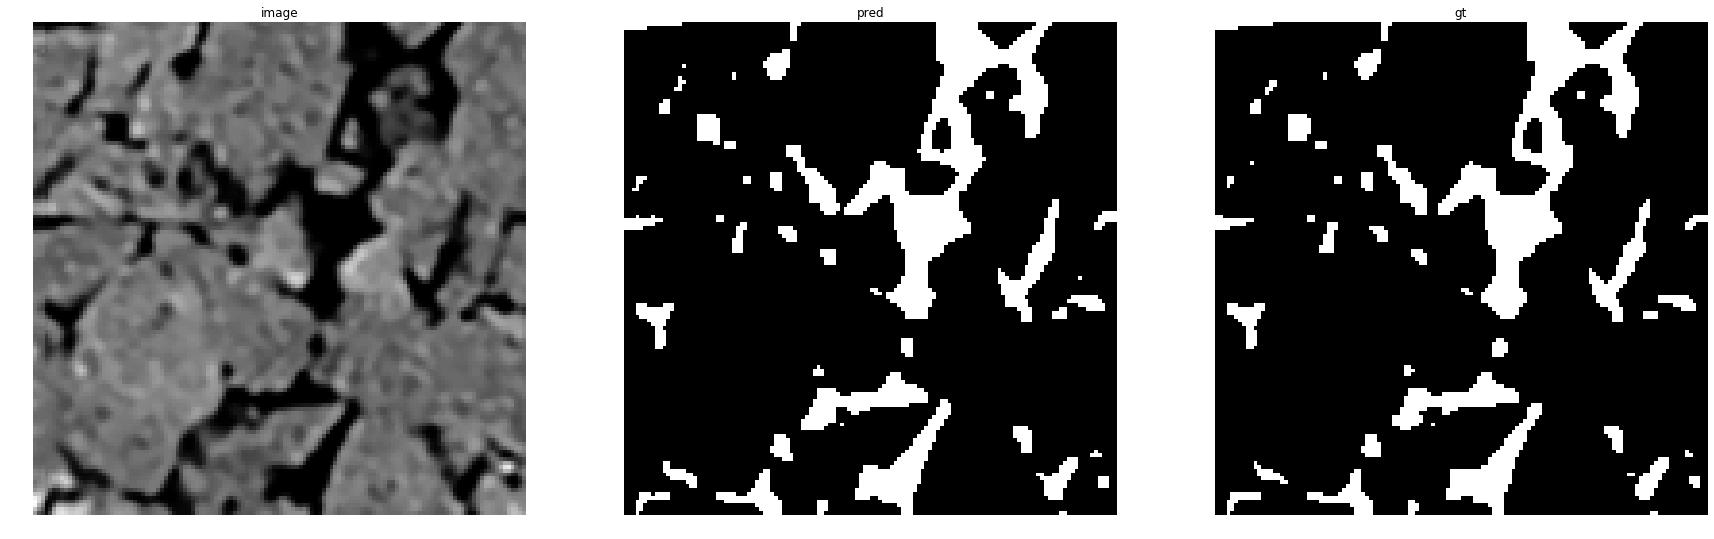

accuracy    : 0.9903564453125
precision   : 0.9457613499397348
recall      : 0.9903239377366428
f1          : 0.9675297986025483
pr_auc      : 0.9977514874567067
iou         : 0.9371019108280255


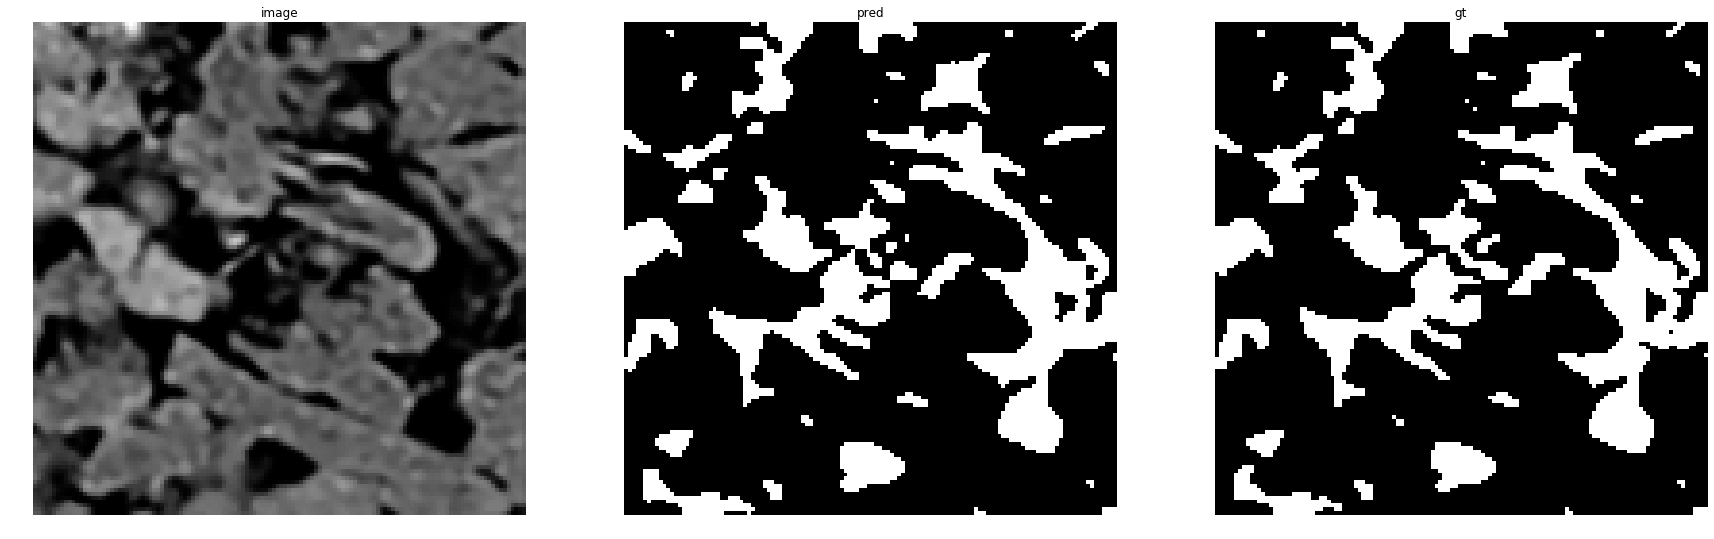

accuracy    : 0.98529052734375
precision   : 0.9662179994721563
recall      : 0.9700582935877053
f1          : 0.9681343382255719
pr_auc      : 0.9967364120862231
iou         : 0.9382368016401845


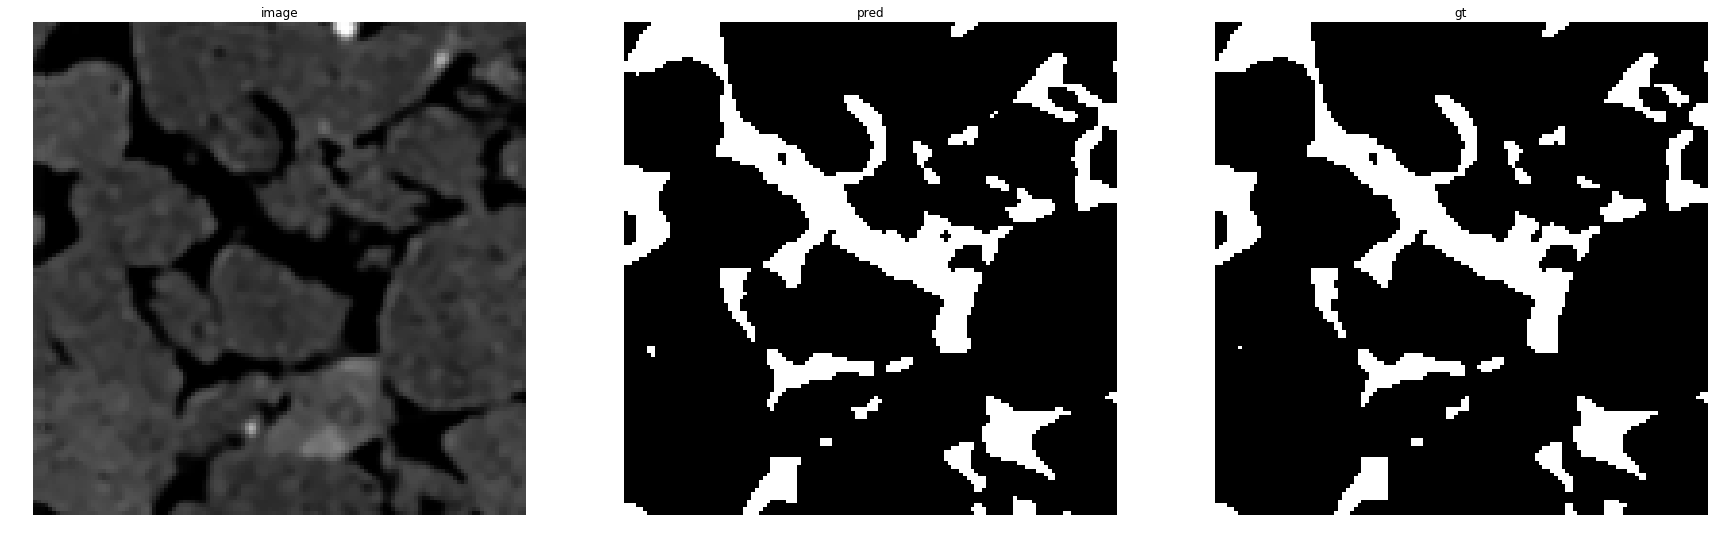

accuracy    : 0.9888916015625
precision   : 0.9423203691496375
recall      : 0.9975575715282624
f1          : 0.9691525423728814
pr_auc      : 0.9990046804601591
iou         : 0.9401512660309109


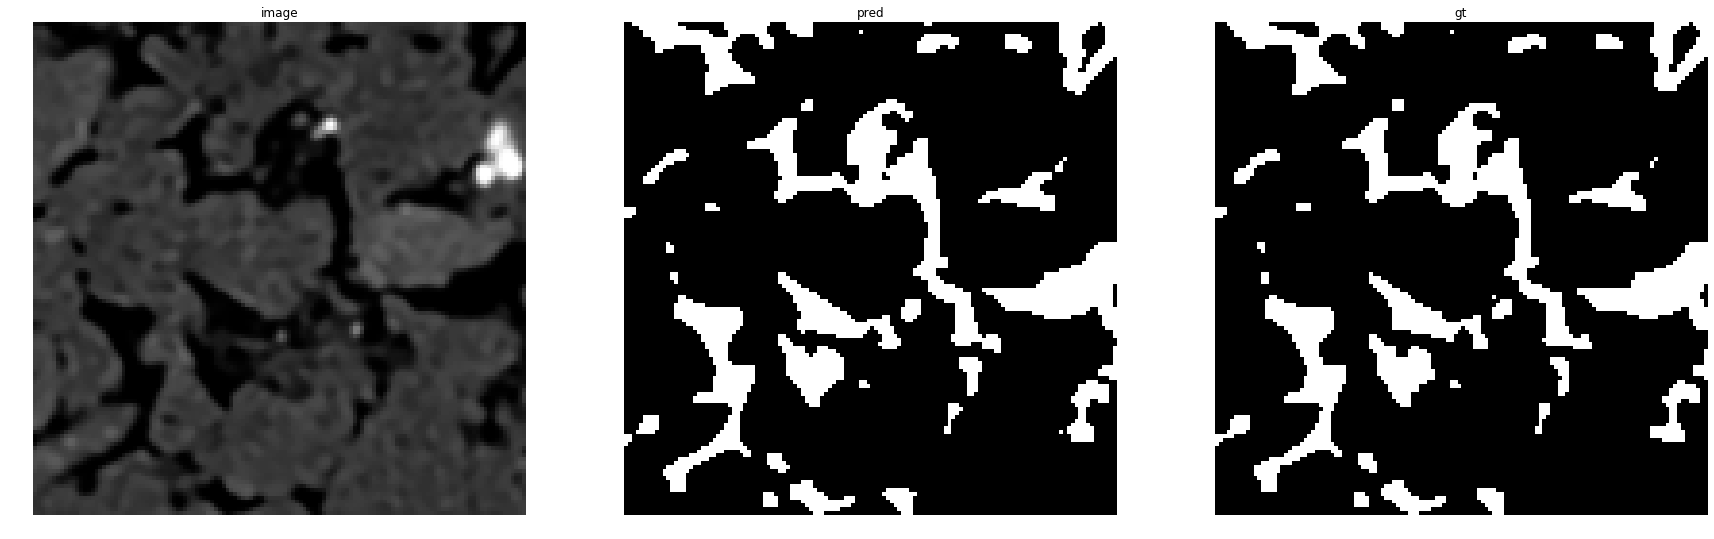

accuracy    : 0.9871826171875
precision   : 0.9482872200263505
recall      : 0.9819236016371078
f1          : 0.9648123324396782
pr_auc      : 0.9970716732081871
iou         : 0.9320168339268372


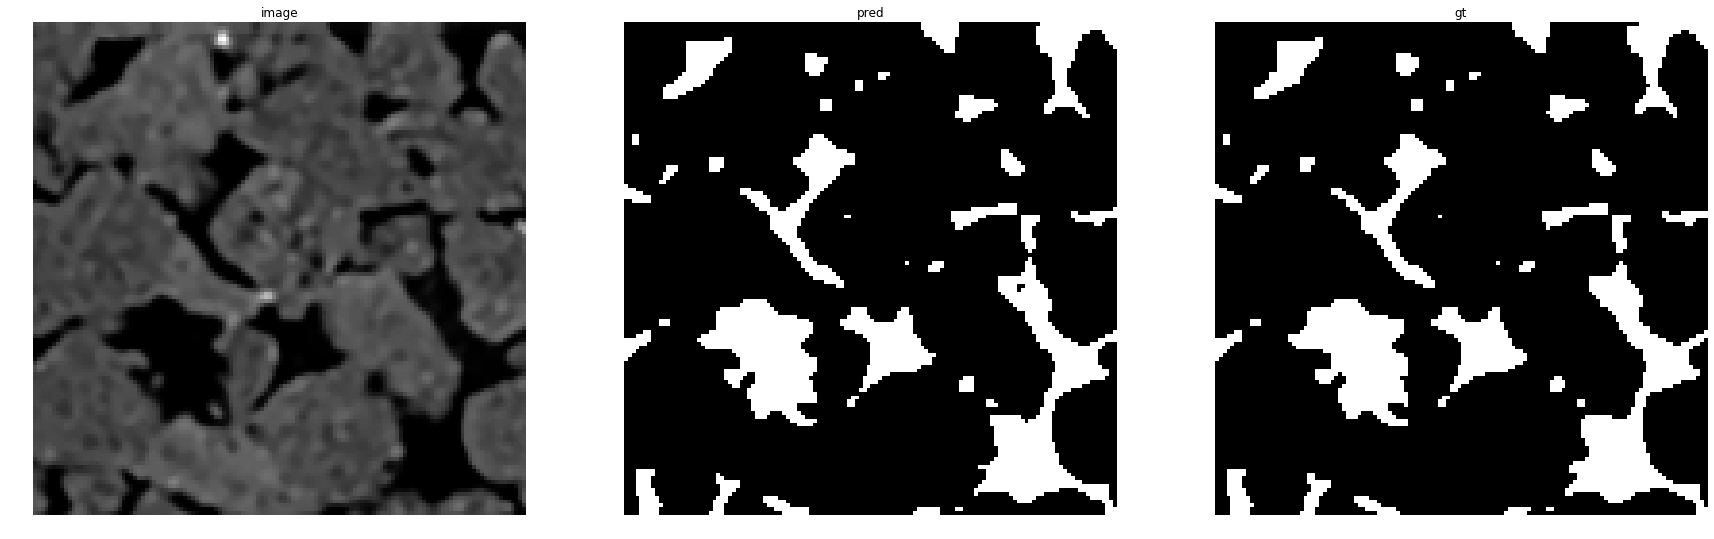

accuracy    : 0.9935302734375
precision   : 0.9820042342978123
recall      : 0.9806201550387597
f1          : 0.9813117066290551
pr_auc      : 0.9988706489026301
iou         : 0.9633091034960194


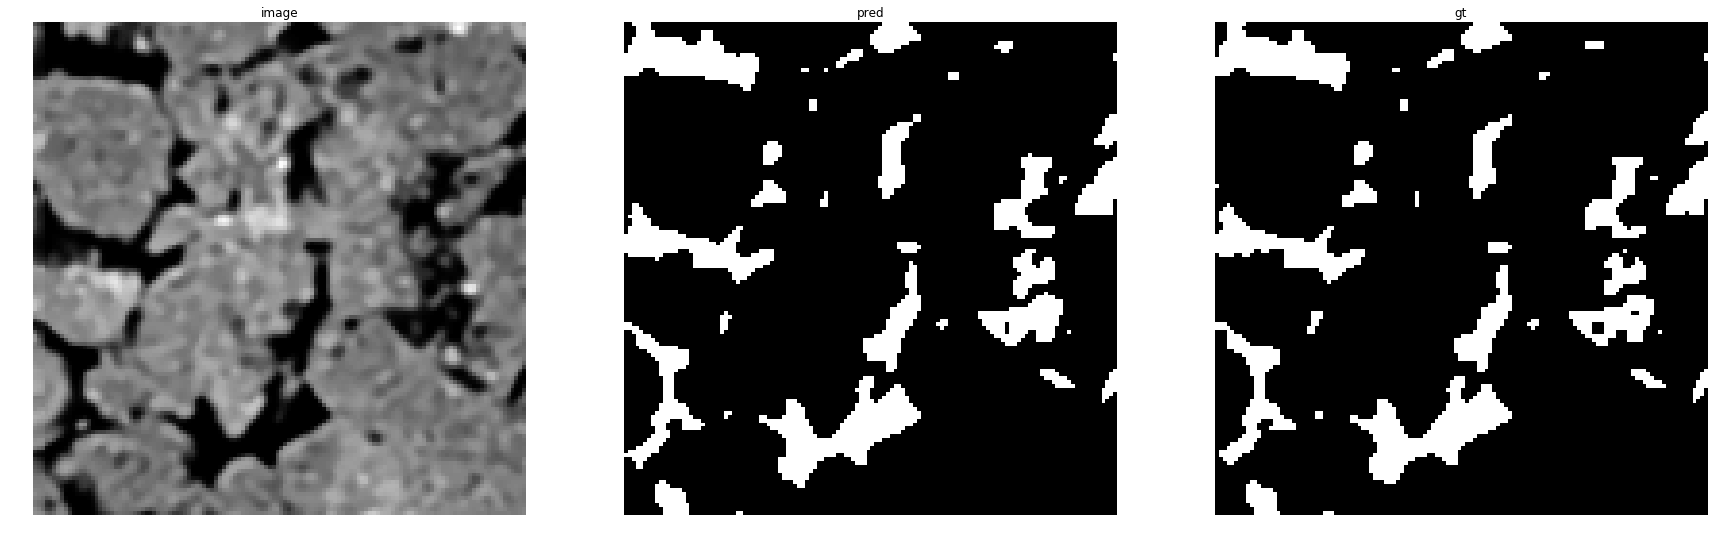

accuracy    : 0.99163818359375
precision   : 0.9614134849715679
recall      : 0.9825653798256538
f1          : 0.9718743584479573
pr_auc      : 0.9977666826313951
iou         : 0.9452875399361023


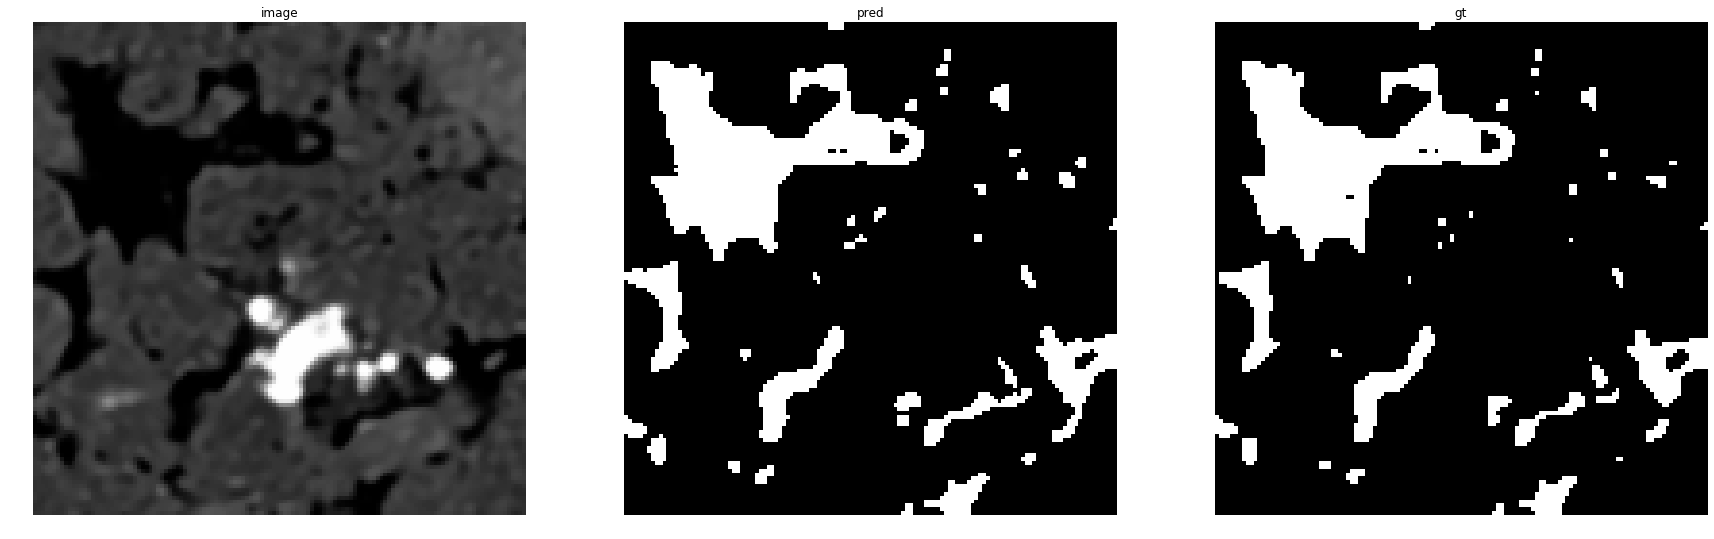

accuracy    : 0.98681640625
precision   : 0.9253567508232712
recall      : 0.9952774498229043
f1          : 0.9590443686006827
pr_auc      : 0.9982769023632222
iou         : 0.921311475409836


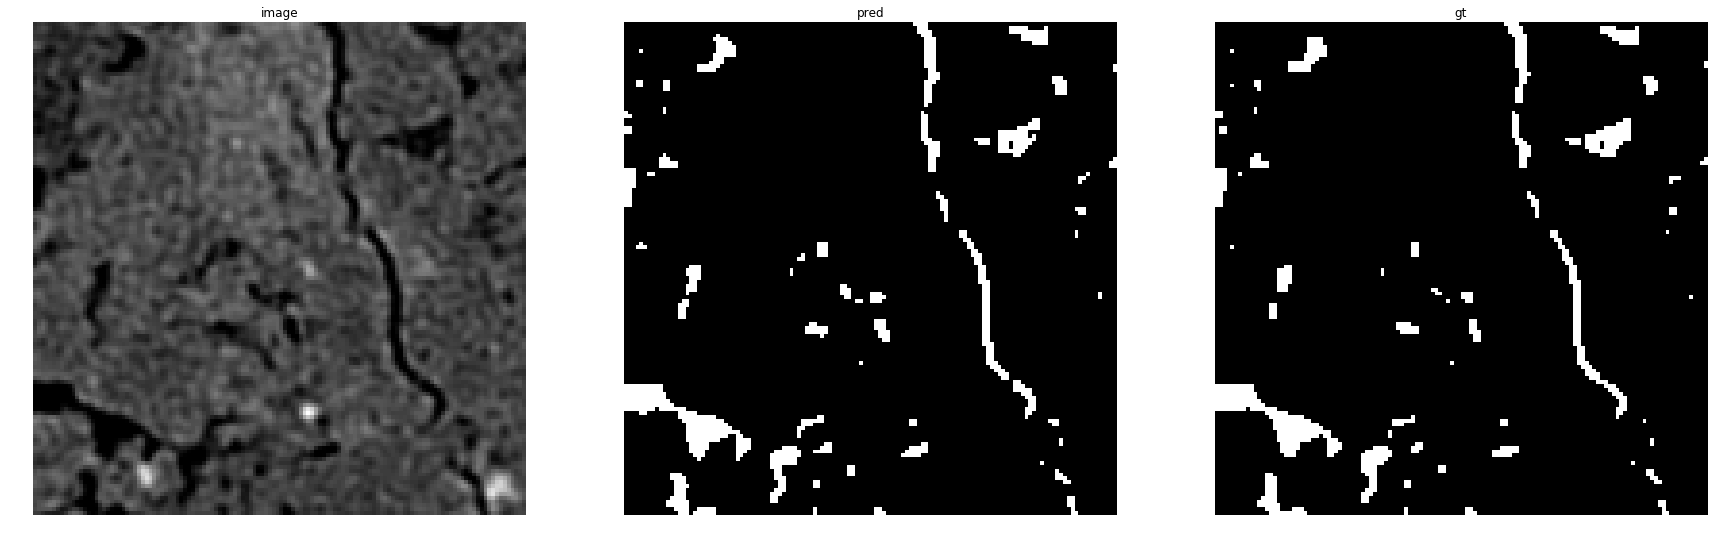

accuracy    : 0.99078369140625
precision   : 0.8987730061349694
recall      : 0.9441460794844253
f1          : 0.9209009952854897
pr_auc      : 0.9847930746435669
iou         : 0.8533980582524272


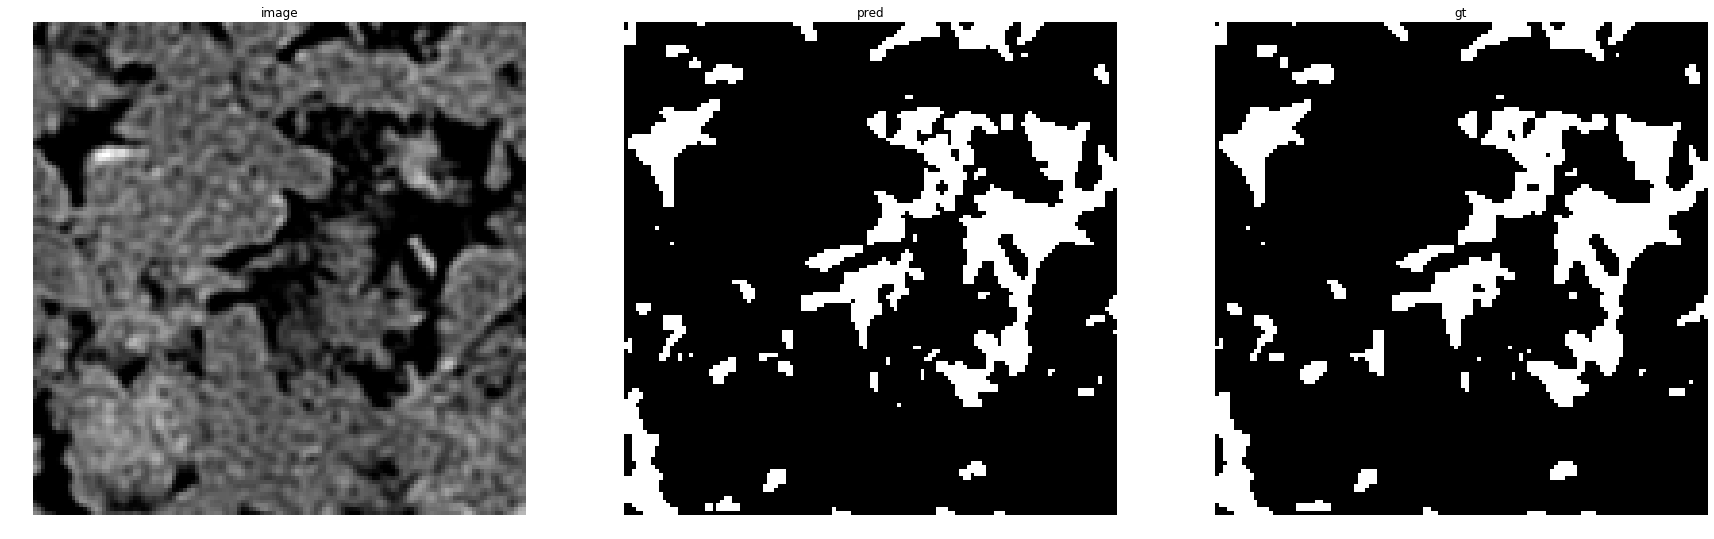

accuracy    : 0.982421875
precision   : 0.9671007539410555
recall      : 0.9362972793629728
f1          : 0.9514497639919083
pr_auc      : 0.9931476286319582
iou         : 0.907395498392283


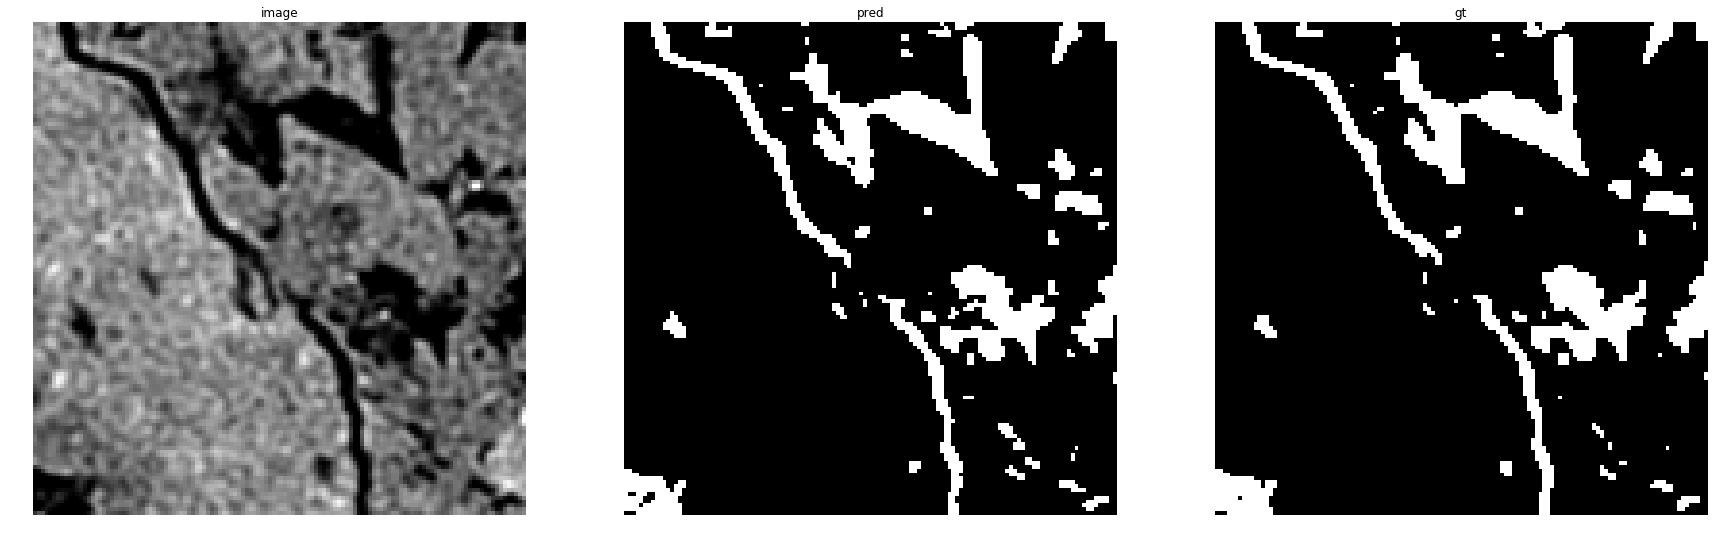

accuracy    : 0.9847412109375
precision   : 0.9487895716945997
recall      : 0.9357208448117539
f1          : 0.9422098936662043
pr_auc      : 0.9907606805357633
iou         : 0.8907342657342657


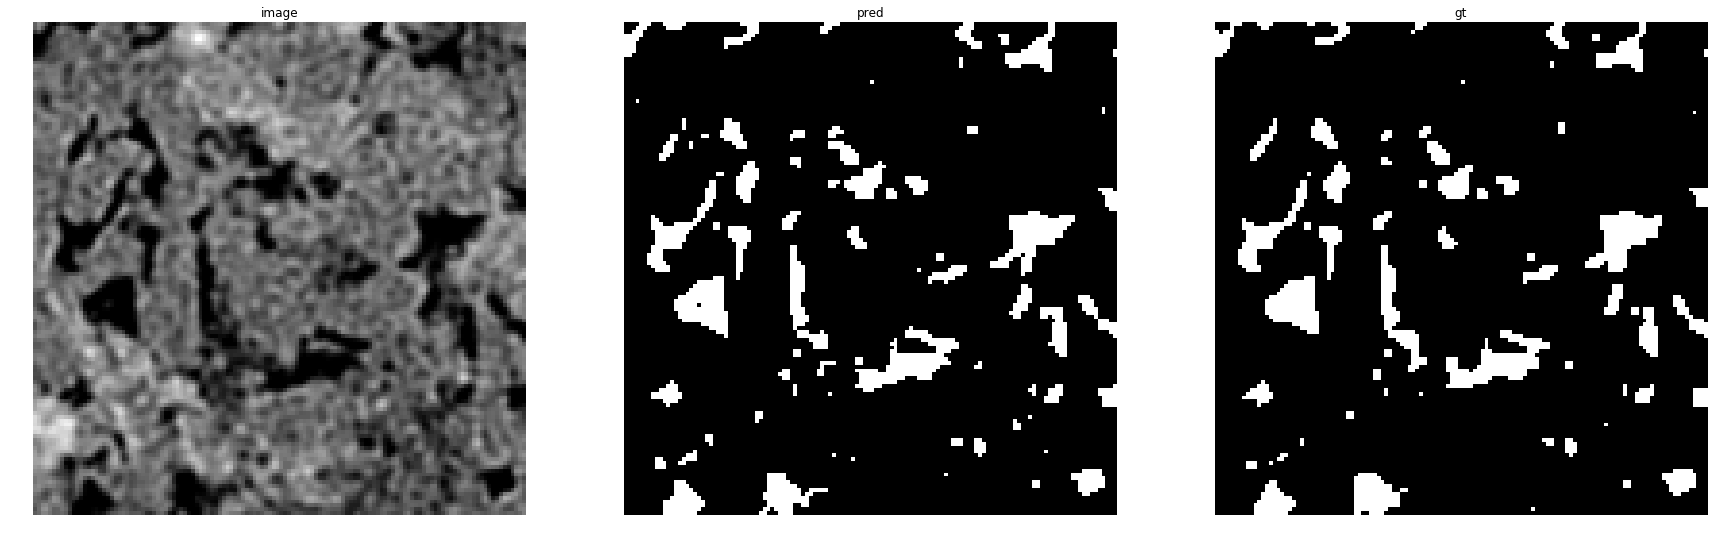

accuracy    : 0.9837646484375
precision   : 0.9166190748143918
recall      : 0.9304347826086956
f1          : 0.9234752589182968
pr_auc      : 0.9847932577807672
iou         : 0.857830037413148


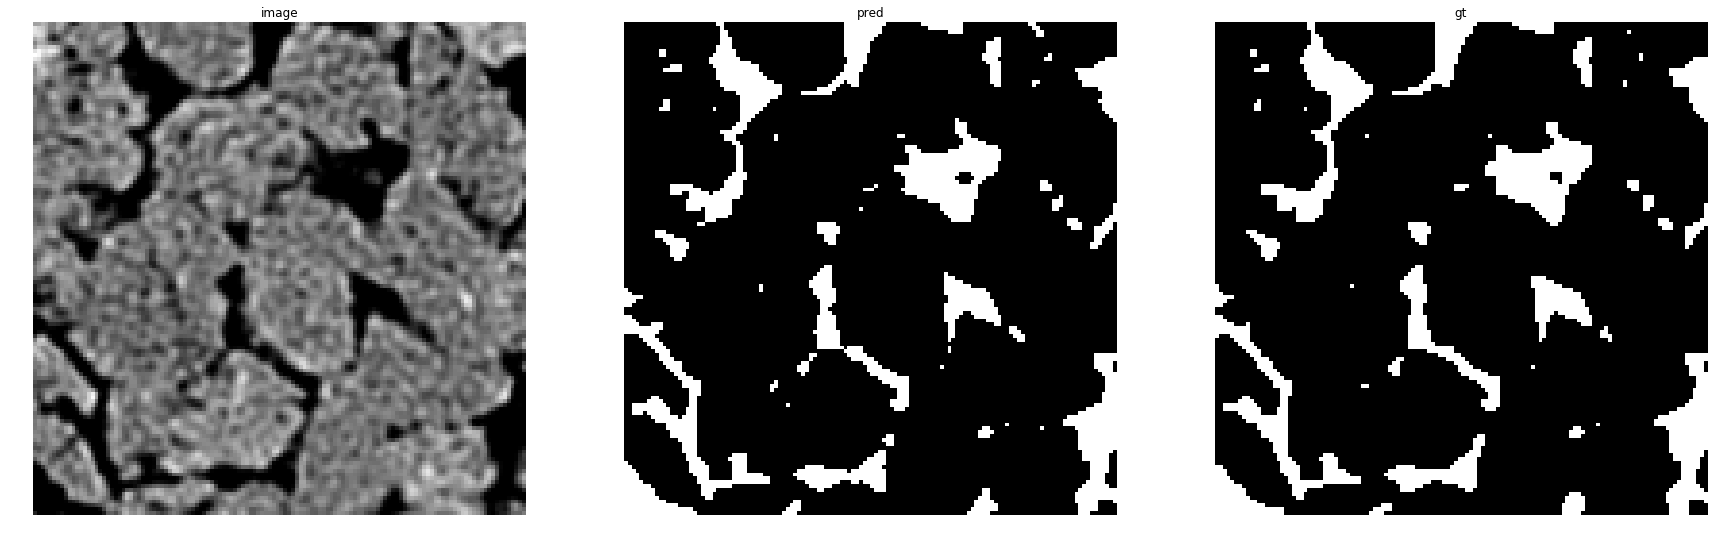

accuracy    : 0.987548828125
precision   : 0.9645799011532126
recall      : 0.9520325203252032
f1          : 0.9582651391162029
pr_auc      : 0.9948818955343043
iou         : 0.9198743126472899


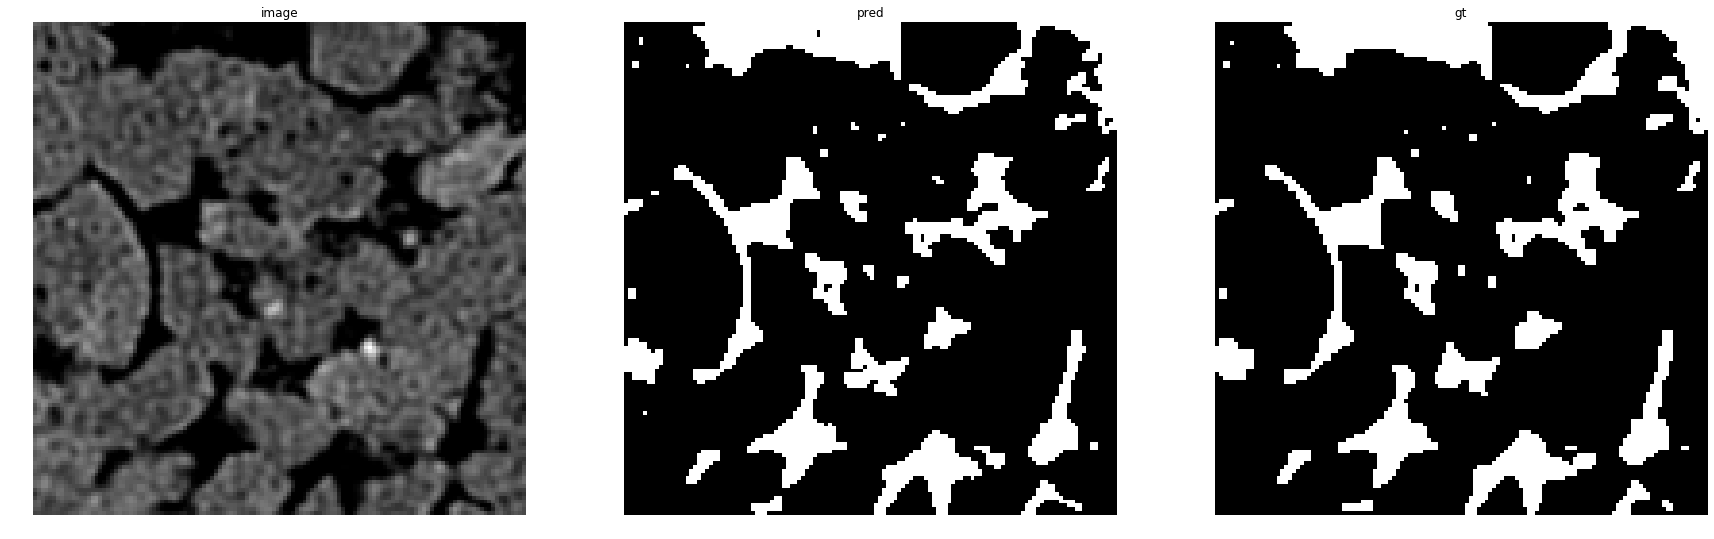

accuracy    : 0.98541259765625
precision   : 0.9733290488431876
recall      : 0.9510204081632653
f1          : 0.9620454184532317
pr_auc      : 0.9957749652590919
iou         : 0.9268665850673194


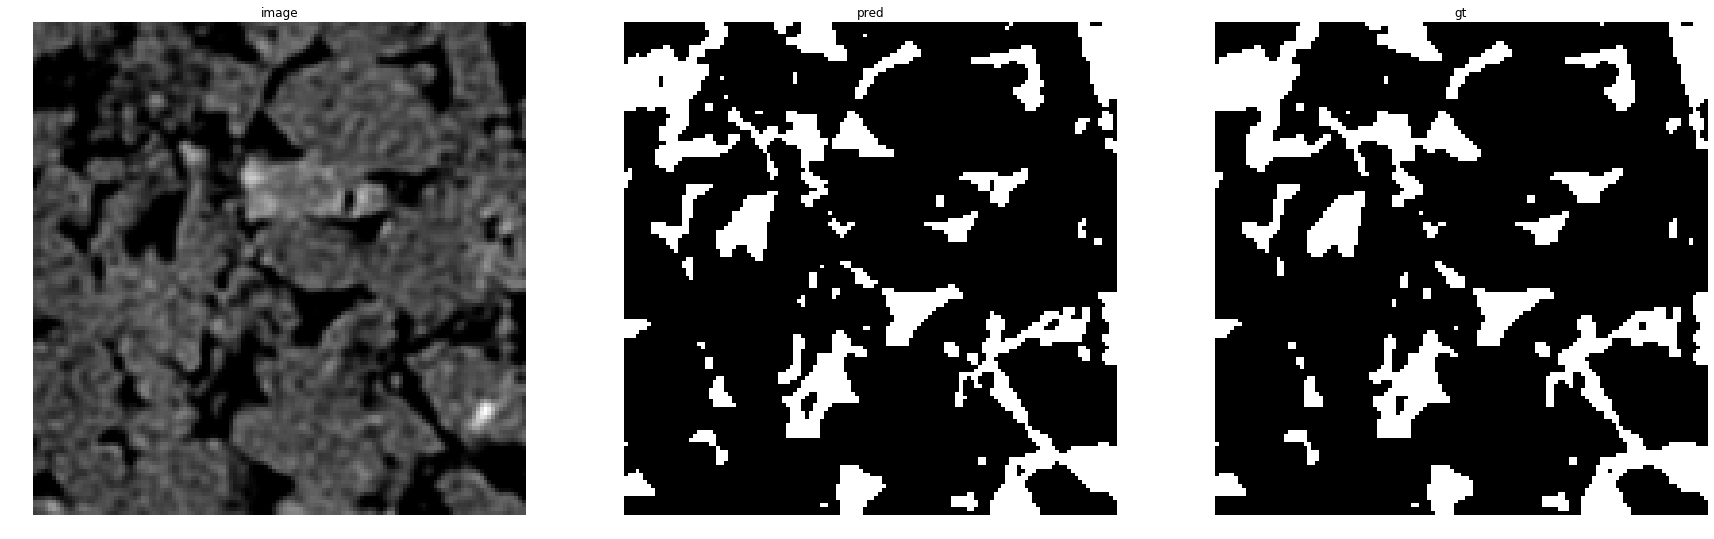

accuracy    : 0.98046875
precision   : 0.9701539428212378
recall      : 0.9320857229097494
f1          : 0.9507389162561577
pr_auc      : 0.9931843405066414
iou         : 0.9061032863849765


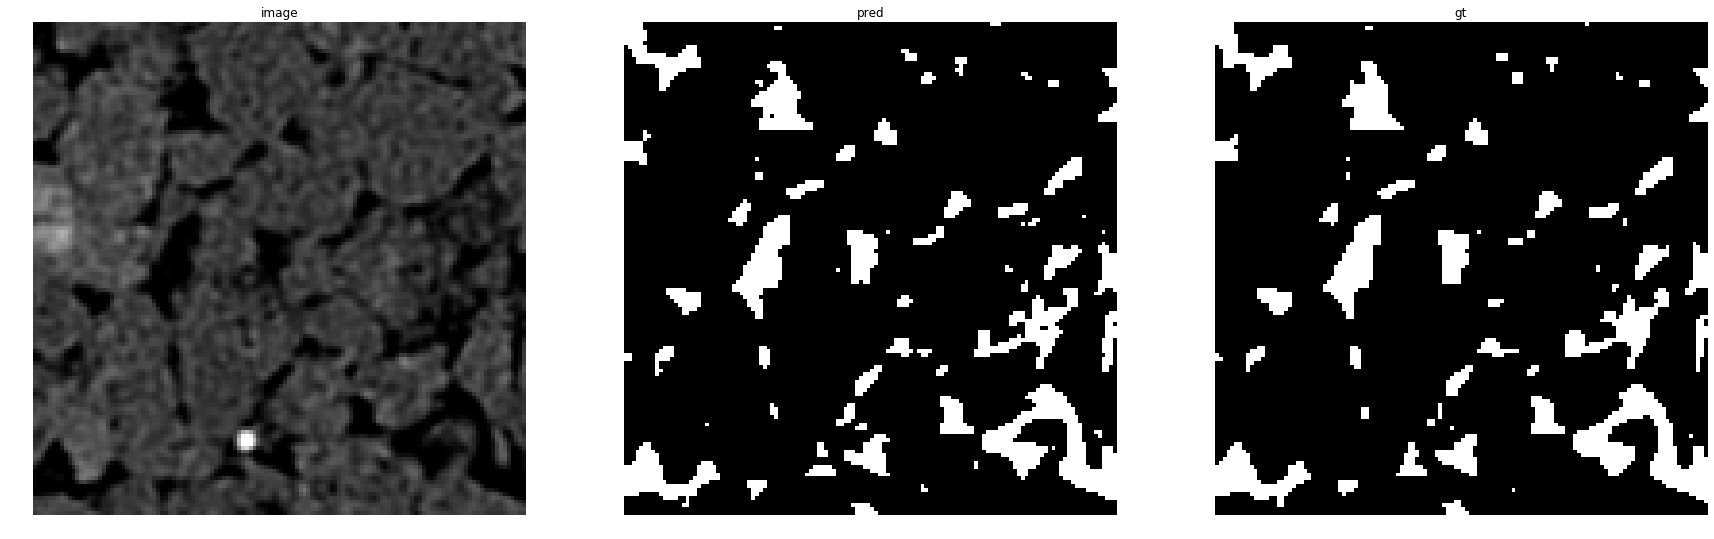

accuracy    : 0.9857177734375
precision   : 0.9392111368909513
recall      : 0.9515749882463563
f1          : 0.94535263895376
pr_auc      : 0.9906940685290189
iou         : 0.8963684676705048


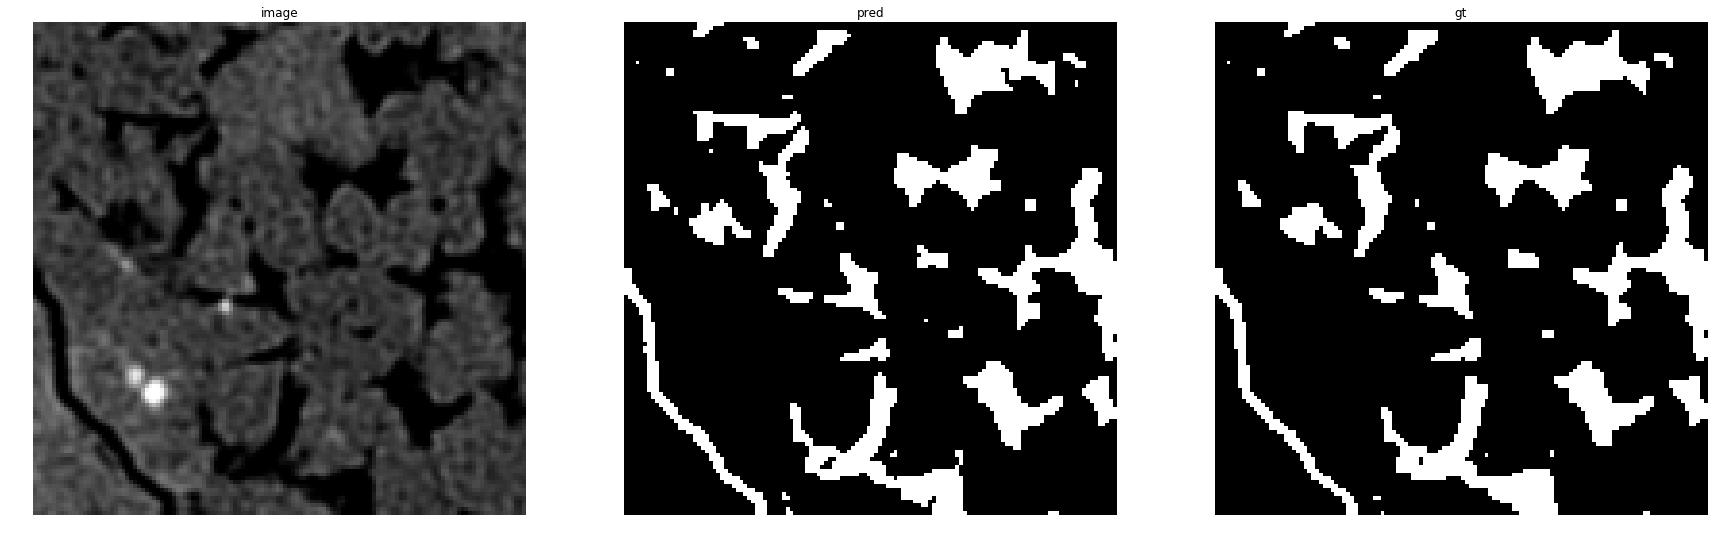

accuracy    : 0.98626708984375
precision   : 0.9682483053870853
recall      : 0.952280701754386
f1          : 0.9601981248894392
pr_auc      : 0.9950906782242057
iou         : 0.9234433480775774


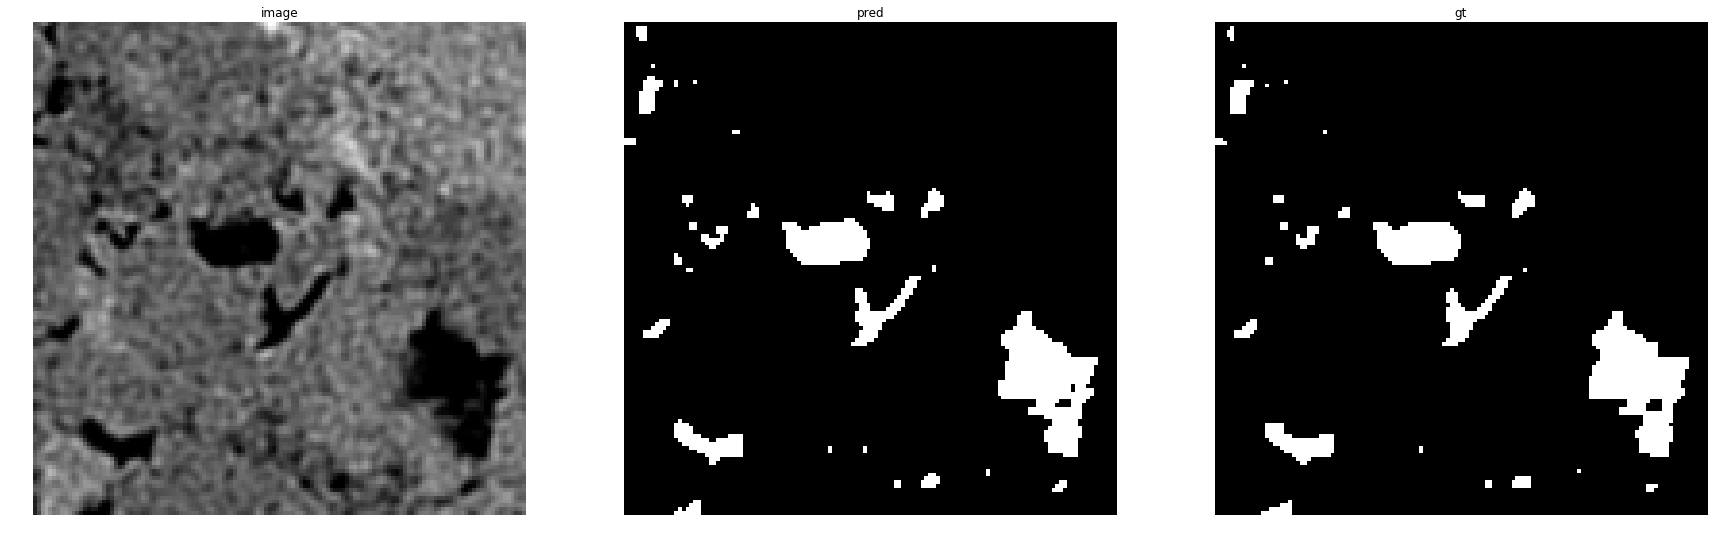

accuracy    : 0.9945068359375
precision   : 0.9558823529411765
recall      : 0.9659090909090909
f1          : 0.9608695652173913
pr_auc      : 0.9957701409505042
iou         : 0.9246861924686193


In [27]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [28]:
stack_name = 'carbRNF'

In [29]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:03, 226.16it/s]
100%|██████████| 700/700 [00:07<00:00, 98.35it/s] 


In [30]:
predicted_stack = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 223951.21it/s]
25200it [02:04, 203.17it/s]
100%|██████████| 25200/25200 [00:07<00:00, 3198.54it/s]


In [31]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack.preds, 
                                    mode='stack')))

accuracy    : 0.983005
precision   : 0.924819
recall      : 0.926038
f1          : 0.925428
pr_auc      : 0.983613
iou         : 0.861207
